# Text Analytics: News Articles Analysis

In [122]:
import os, io, re, warnings
import numpy as np
import nltk
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 	Q1
**Read documents into a dataframe and save as CSV "H1_raw_data.csv"**

In [123]:
datapath = './data/' # Datapath of the documents

In [124]:
# creating a dataframe with article id, title and content columns
df_raw = pd.DataFrame([],columns=['Article_ID','Title', 'Content'])

for root, directories, files in os.walk(datapath):
    for filename in files:
        if(filename != '.DS_Store'):
            _articleid = os.path.splitext(filename)[0]
            filepath = os.path.join(root, filename)
            f = open(filepath,"r", encoding="utf-8") 
            _title = f.readline()
            _content = f.read()
            pieces = {'Article_ID': _articleid, 'Title': _title, 'Content':_content}
            df_raw = df_raw.append(pieces,ignore_index=True)
        
df_raw.set_index('Article_ID', inplace=True)
df_raw.head(5)

,Title,Content
Article_ID,,
29,Hi-tech posters guide commuters\n,\nInteractive posters are helping Londoners ge...
15,GTA sequel is criminally good\n,\nThe Grand Theft Auto series of games have se...
14,Gates opens biggest gadget fair\n,\nBill Gates has opened the Consumer Electroni...
28,Europe backs digital TV lifestyle\n,\nHow people receive their digital entertainme...
16,Firefox browser takes on Microsoft\n,\nMicrosoft's Internet Explorer has a serious ...


In [125]:
df_raw.index = df_raw.index.map(int) # map the index from an object to int so it can be sorted by Article_ID
df_raw.sort_index(inplace=True)
df_raw.head(5)

,Title,Content
Article_ID,,
0,Virus poses as Christmas e-mail\n,\nSecurity firms are warning about a Windows v...
1,Sony PSP console hits US in March\n,\nUS gamers will be able to buy Sony's PlaySta...
2,Security warning over 'FBI virus'\n,\nThe US Federal Bureau of Investigation is wa...
3,Apple attacked over sources row\n,\nCivil liberties group the Electronic Frontie...
4,'No re-draft' for EU patent law\n,\nA proposed European law on software patents ...


In [126]:
## Save data into CSV RAW file
df_raw.to_csv('raw_data.csv',sep=',',index=None)
del df_raw

In [127]:
## Check the saved data by re-load again
df_raw = pd.read_csv('H1_raw_data.csv',sep=',')
df_raw.head(5)

,Title,Content
0,Virus poses as Christmas e-mail\n,\nSecurity firms are warning about a Windows v...
1,Sony PSP console hits US in March\n,\nUS gamers will be able to buy Sony's PlaySta...
2,Security warning over 'FBI virus'\n,\nThe US Federal Bureau of Investigation is wa...
3,Apple attacked over sources row\n,\nCivil liberties group the Electronic Frontie...
4,'No re-draft' for EU patent law\n,\nA proposed European law on software patents ...


# Q2
**Extract the Tokens from raw text, separately for each document.**

**Please apply tokenization; decapitalization; remove punctuations, numbers, special character.**

**To the dataframe add the column "tokens"  which contains those tokens.**

In [128]:
def convert_tokens(rawtext, verbose):
    # First: Tokenization
    from nltk.tokenize import RegexpTokenizer
    pattern = r'\w+'
    tokenizer = RegexpTokenizer(pattern)
    token_words = tokenizer.tokenize(rawtext)
    if (verbose):
        print('Tokens:' + str(token_words[0:10]))
    
    # # Second: Decapitalization (if needed)
    decap_token_words = [word.lower() for word in token_words]
    if (verbose):
        print('Decapitalized Tokens:' + str(decap_token_words[0:10]))
    
    # Third: Remove stop words
    from nltk.corpus import stopwords
    stopwords_json = {"af":["'n","aan","af","al","as","baie","by","daar","dag","dat","die","dit","een","ek","en","gaan","gesê","haar","het","hom","hulle","hy","in","is","jou","jy","kan","kom","ma","maar","met","my","na","nie","om","ons","op","saam","sal","se","sien","so","sy","te","toe","uit","van","vir","was","wat","ŉ"],"ha":["a","amma","ba","ban","ce","cikin","da","don","ga","in","ina","ita","ji","ka","ko","kuma","lokacin","ma","mai","na","ne","ni","sai","shi","su","suka","sun","ta","tafi","take","tana","wani","wannan","wata","ya","yake","yana","yi","za"],"so":["aad","albaabkii","atabo","ay","ayaa","ayee","ayuu","dhan","hadana","in","inuu","isku","jiray","jirtay","ka","kale","kasoo","ku","kuu","lakin","markii","oo","si","soo","uga","ugu","uu","waa","waxa","waxuu"],"st":["a","ba","bane","bona","e","ea","eaba","empa","ena","ha","hae","hape","ho","hore","ka","ke","la","le","li","me","mo","moo","ne","o","oa","re","sa","se","tloha","tsa","tse"],"sw":["akasema","alikuwa","alisema","baada","basi","bila","cha","chini","hadi","hapo","hata","hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila","kima","kisha","kubwa","kutoka","kuwa","kwa","kwamba","kwenda","kwenye","la","lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na","naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti","tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine","wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"],"yo":["a","an","bá","bí","bẹ̀rẹ̀","fún","fẹ́","gbogbo","inú","jù","jẹ","jẹ́","kan","kì","kí","kò","láti","lè","lọ","mi","mo","máa","mọ̀","ni","náà","ní","nígbà","nítorí","nǹkan","o","padà","pé","púpọ̀","pẹ̀lú","rẹ̀","sì","sí","sínú","ṣ","ti","tí","wà","wá","wọn","wọ́n","yìí","àti","àwọn","é","í","òun","ó","ń","ńlá","ṣe","ṣé","ṣùgbọ́n","ẹmọ́","ọjọ́","ọ̀pọ̀lọpọ̀"],"zu":["futhi","kahle","kakhulu","kanye","khona","kodwa","kungani","kusho","la","lakhe","lapho","mina","ngesikhathi","nje","phansi","phezulu","u","ukuba","ukuthi","ukuze","uma","wahamba","wakhe","wami","wase","wathi","yakhe","zakhe","zonke"],"da":["af","alle","andet","andre","at","begge","da","de","den","denne","der","deres","det","dette","dig","din","dog","du","ej","eller","en","end","ene","eneste","enhver","et","fem","fire","flere","fleste","for","fordi","forrige","fra","få","før","god","han","hans","har","hendes","her","hun","hvad","hvem","hver","hvilken","hvis","hvor","hvordan","hvorfor","hvornår","i","ikke","ind","ingen","intet","jeg","jeres","kan","kom","kommer","lav","lidt","lille","man","mand","mange","med","meget","men","mens","mere","mig","ned","ni","nogen","noget","ny","nyt","nær","næste","næsten","og","op","otte","over","på","se","seks","ses","som","stor","store","syv","ti","til","to","tre","ud","var"],"de":["Ernst","Ordnung","Schluss","a","ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"],"es":["a","actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estaban","estado","estados","estais","estamos","estan","estar","estará","estas","este","esto","estos","estoy","estuvo","está","están","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fueron","fui","fuimos","g","general","gran","grandes","gueno","h","ha","haber","habia","habla","hablan","habrá","había","habían","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","hasta","hay","haya","he","hecho","hemos","hicieron","hizo","horas","hoy","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","salvo","se","sea","sean","segun","segunda","segundo","según","seis","ser","sera","será","serán","sería","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendrá","tendrán","teneis","tenemos","tener","tenga","tengo","tenido","tenía","tercera","ti","tiempo","tiene","tienen","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"],"et":["aga","ei","et","ja","jah","kas","kui","kõik","ma","me","mida","midagi","mind","minu","mis","mu","mul","mulle","nad","nii","oled","olen","oli","oma","on","pole","sa","seda","see","selle","siin","siis","ta","te","ära"],"fi":["aiemmin","aika","aikaa","aikaan","aikaisemmin","aikaisin","aikajen","aikana","aikoina","aikoo","aikovat","aina","ainakaan","ainakin","ainoa","ainoat","aiomme","aion","aiotte","aist","aivan","ajan","alas","alemmas","alkuisin","alkuun","alla","alle","aloitamme","aloitan","aloitat","aloitatte","aloitattivat","aloitettava","aloitettevaksi","aloitettu","aloitimme","aloitin","aloitit","aloititte","aloittaa","aloittamatta","aloitti","aloittivat","alta","aluksi","alussa","alusta","annettavaksi","annetteva","annettu","ansiosta","antaa","antamatta","antoi","aoua","apu","asia","asiaa","asian","asiasta","asiat","asioiden","asioihin","asioita","asti","avuksi","avulla","avun","avutta","edelle","edelleen","edellä","edeltä","edemmäs","edes","edessä","edestä","ehkä","ei","eikä","eilen","eivät","eli","ellei","elleivät","ellemme","ellen","ellet","ellette","emme","en","enemmän","eniten","ennen","ensi","ensimmäinen","ensimmäiseksi","ensimmäisen","ensimmäisenä","ensimmäiset","ensimmäisiksi","ensimmäisinä","ensimmäisiä","ensimmäistä","ensin","entinen","entisen","entisiä","entisten","entistä","enää","eri","erittäin","erityisesti","eräiden","eräs","eräät","esi","esiin","esillä","esimerkiksi","et","eteen","etenkin","etessa","ette","ettei","että","haikki","halua","haluaa","haluamatta","haluamme","haluan","haluat","haluatte","haluavat","halunnut","halusi","halusimme","halusin","halusit","halusitte","halusivat","halutessa","haluton","he","hei","heidän","heihin","heille","heiltä","heissä","heistä","heitä","helposti","heti","hetkellä","hieman","hitaasti","hoikein","huolimatta","huomenna","hyvien","hyviin","hyviksi","hyville","hyviltä","hyvin","hyvinä","hyvissä","hyvistä","hyviä","hyvä","hyvät","hyvää","hän","häneen","hänelle","hänellä","häneltä","hänen","hänessä","hänestä","hänet","ihan","ilman","ilmeisesti","itse","itsensä","itseään","ja","jo","johon","joiden","joihin","joiksi","joilla","joille","joilta","joissa","joista","joita","joka","jokainen","jokin","joko","joku","jolla","jolle","jolloin","jolta","jompikumpi","jonka","jonkin","jonne","joo","jopa","jos","joskus","jossa","josta","jota","jotain","joten","jotenkin","jotenkuten","jotka","jotta","jouduimme","jouduin","jouduit","jouduitte","joudumme","joudun","joudutte","joukkoon","joukossa","joukosta","joutua","joutui","joutuivat","joutumaan","joutuu","joutuvat","juuri","jälkeen","jälleen","jää","kahdeksan","kahdeksannen","kahdella","kahdelle","kahdelta","kahden","kahdessa","kahdesta","kahta","kahteen","kai","kaiken","kaikille","kaikilta","kaikkea","kaikki","kaikkia","kaikkiaan","kaikkialla","kaikkialle","kaikkialta","kaikkien","kaikkin","kaksi","kannalta","kannattaa","kanssa","kanssaan","kanssamme","kanssani","kanssanne","kanssasi","kauan","kauemmas","kaukana","kautta","kehen","keiden","keihin","keiksi","keille","keillä","keiltä","keinä","keissä","keistä","keitten","keittä","keitä","keneen","keneksi","kenelle","kenellä","keneltä","kenen","kenenä","kenessä","kenestä","kenet","kenettä","kennessästä","kenties","kerran","kerta","kertaa","keskellä","kesken","keskimäärin","ketkä","ketä","kiitos","kohti","koko","kokonaan","kolmas","kolme","kolmen","kolmesti","koska","koskaan","kovin","kuin","kuinka","kuinkan","kuitenkaan","kuitenkin","kuka","kukaan","kukin","kukka","kumpainen","kumpainenkaan","kumpi","kumpikaan","kumpikin","kun","kuten","kuuden","kuusi","kuutta","kylliksi","kyllä","kymmenen","kyse","liian","liki","lisäksi","lisää","lla","luo","luona","lähekkäin","lähelle","lähellä","läheltä","lähemmäs","lähes","lähinnä","lähtien","läpi","mahdollisimman","mahdollista","me","meidän","meille","meillä","melkein","melko","menee","meneet","menemme","menen","menet","menette","menevät","meni","menimme","menin","menit","menivät","mennessä","mennyt","menossa","mihin","mikin","miksi","mikä","mikäli","mikään","milloin","milloinkan","minne","minun","minut","minä","missä","mistä","miten","mitä","mitään","moi","molemmat","mones","monesti","monet","moni","moniaalla","moniaalle","moniaalta","monta","muassa","muiden","muita","muka","mukaan","mukaansa","mukana","mutta","muu","muualla","muualle","muualta","muuanne","muulloin","muun","muut","muuta","muutama","muutaman","muuten","myöhemmin","myös","myöskin","myöskään","myötä","ne","neljä","neljän","neljää","niiden","niin","niistä","niitä","noin","nopeammin","nopeasti","nopeiten","nro","nuo","nyt","näiden","näin","näissä","näissähin","näissälle","näissältä","näissästä","näitä","nämä","ohi","oikea","oikealla","oikein","ole","olemme","olen","olet","olette","oleva","olevan","olevat","oli","olimme","olin","olisi","olisimme","olisin","olisit","olisitte","olisivat","olit","olitte","olivat","olla","olleet","olli","ollut","oma","omaa","omaan","omaksi","omalle","omalta","oman","omassa","omat","omia","omien","omiin","omiksi","omille","omilta","omissa","omista","on","onkin","onko","ovat","paikoittain","paitsi","pakosti","paljon","paremmin","parempi","parhaillaan","parhaiten","perusteella","peräti","pian","pieneen","pieneksi","pienelle","pienellä","pieneltä","pienempi","pienestä","pieni","pienin","puolesta","puolestaan","päälle","runsaasti","saakka","sadam","sama","samaa","samaan","samalla","samallalta","samallassa","samallasta","saman","samat","samoin","sata","sataa","satojen","se","seitsemän","sekä","sen","seuraavat","siellä","sieltä","siihen","siinä","siis","siitä","sijaan","siksi","silloin","sillä","silti","sinne","sinua","sinulle","sinulta","sinun","sinussa","sinusta","sinut","sinä","sisäkkäin","sisällä","siten","sitten","sitä","ssa","sta","suoraan","suuntaan","suuren","suuret","suuri","suuria","suurin","suurten","taa","taas","taemmas","tahansa","tai","takaa","takaisin","takana","takia","tapauksessa","tarpeeksi","tavalla","tavoitteena","te","tietysti","todella","toinen","toisaalla","toisaalle","toisaalta","toiseen","toiseksi","toisella","toiselle","toiselta","toisemme","toisen","toisensa","toisessa","toisesta","toista","toistaiseksi","toki","tosin","tuhannen","tuhat","tule","tulee","tulemme","tulen","tulet","tulette","tulevat","tulimme","tulin","tulisi","tulisimme","tulisin","tulisit","tulisitte","tulisivat","tulit","tulitte","tulivat","tulla","tulleet","tullut","tuntuu","tuo","tuolla","tuolloin","tuolta","tuonne","tuskin","tykö","tähän","tällä","tällöin","tämä","tämän","tänne","tänä","tänään","tässä","tästä","täten","tätä","täysin","täytyvät","täytyy","täällä","täältä","ulkopuolella","usea","useasti","useimmiten","usein","useita","uudeksi","uudelleen","uuden","uudet","uusi","uusia","uusien","uusinta","uuteen","uutta","vaan","vahemmän","vai","vaiheessa","vaikea","vaikean","vaikeat","vaikeilla","vaikeille","vaikeilta","vaikeissa","vaikeista","vaikka","vain","varmasti","varsin","varsinkin","varten","vasen","vasenmalla","vasta","vastaan","vastakkain","vastan","verran","vielä","vierekkäin","vieressä","vieri","viiden","viime","viimeinen","viimeisen","viimeksi","viisi","voi","voidaan","voimme","voin","voisi","voit","voitte","voivat","vuoden","vuoksi","vuosi","vuosien","vuosina","vuotta","vähemmän","vähintään","vähiten","vähän","välillä","yhdeksän","yhden","yhdessä","yhteen","yhteensä","yhteydessä","yhteyteen","yhtä","yhtäälle","yhtäällä","yhtäältä","yhtään","yhä","yksi","yksin","yksittäin","yleensä","ylemmäs","yli","ylös","ympäri","älköön","älä"],"fr":["a","abord","absolument","afin","ah","ai","aie","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aujourd","aujourd'hui","aupres","auquel","aura","auraient","aurait","auront","aussi","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avoir","avons","ayant","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","douze","douzième","dring","du","duquel","durant","dès","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","est","et","etant","etc","etre","eu","euh","eux","eux-mêmes","exactement","excepté","extenso","exterieur","f","fais","faisaient","faisant","fait","façon","feront","fi","flac","floc","font","g","gens","h","ha","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","minimale","moi","moi-meme","moi-même","moindres","moins","mon","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","plein","plouf","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","seraient","serait","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soit","soixante","son","sont","sous","souvent","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","superpose","sur","surtout","t","ta","tac","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voilà","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","été","être","ô"],"hr":["a","ako","ali","bi","bih","bila","bili","bilo","bio","bismo","biste","biti","bumo","da","do","duž","ga","hoće","hoćemo","hoćete","hoćeš","hoću","i","iako","ih","ili","iz","ja","je","jedna","jedne","jedno","jer","jesam","jesi","jesmo","jest","jeste","jesu","jim","joj","još","ju","kada","kako","kao","koja","koje","koji","kojima","koju","kroz","li","me","mene","meni","mi","mimo","moj","moja","moje","mu","na","nad","nakon","nam","nama","nas","naš","naša","naše","našeg","ne","nego","neka","neki","nekog","neku","nema","netko","neće","nećemo","nećete","nećeš","neću","nešto","ni","nije","nikoga","nikoje","nikoju","nisam","nisi","nismo","niste","nisu","njega","njegov","njegova","njegovo","njemu","njezin","njezina","njezino","njih","njihov","njihova","njihovo","njim","njima","njoj","nju","no","o","od","odmah","on","ona","oni","ono","ova","pa","pak","po","pod","pored","prije","s","sa","sam","samo","se","sebe","sebi","si","smo","ste","su","sve","svi","svog","svoj","svoja","svoje","svom","ta","tada","taj","tako","te","tebe","tebi","ti","to","toj","tome","tu","tvoj","tvoja","tvoje","u","uz","vam","vama","vas","vaš","vaša","vaše","već","vi","vrlo","za","zar","će","ćemo","ćete","ćeš","ću","što"],"hu":["a","abba","abban","abból","addig","ahhoz","ahogy","ahol","aki","akik","akkor","akár","alapján","alatt","alatta","alattad","alattam","alattatok","alattuk","alattunk","alá","alád","alájuk","alám","alánk","alátok","alól","alóla","alólad","alólam","alólatok","alóluk","alólunk","amely","amelybol","amelyek","amelyekben","amelyeket","amelyet","amelyik","amelynek","ami","amikor","amit","amolyan","amott","amíg","annak","annál","arra","arról","attól","az","aznap","azok","azokat","azokba","azokban","azokból","azokhoz","azokig","azokkal","azokká","azoknak","azoknál","azokon","azokra","azokról","azoktól","azokért","azon","azonban","azonnal","azt","aztán","azután","azzal","azzá","azért","bal","balra","ban","be","belé","beléd","beléjük","belém","belénk","belétek","belül","belőle","belőled","belőlem","belőletek","belőlük","belőlünk","ben","benne","benned","bennem","bennetek","bennük","bennünk","bár","bárcsak","bármilyen","búcsú","cikk","cikkek","cikkeket","csak","csakhogy","csupán","de","dehogy","e","ebbe","ebben","ebből","eddig","egy","egyebek","egyebet","egyedül","egyelőre","egyes","egyet","egyetlen","egyik","egymás","egyre","egyszerre","egyéb","együtt","egész","egészen","ehhez","ekkor","el","eleinte","ellen","ellenes","elleni","ellenére","elmondta","első","elsők","elsősorban","elsőt","elé","eléd","elég","eléjük","elém","elénk","elétek","elő","előbb","elől","előle","előled","előlem","előletek","előlük","előlünk","először","előtt","előtte","előtted","előttem","előttetek","előttük","előttünk","előző","emilyen","engem","ennek","ennyi","ennél","enyém","erre","erről","esetben","ettől","ez","ezek","ezekbe","ezekben","ezekből","ezeken","ezeket","ezekhez","ezekig","ezekkel","ezekké","ezeknek","ezeknél","ezekre","ezekről","ezektől","ezekért","ezen","ezentúl","ezer","ezret","ezt","ezután","ezzel","ezzé","ezért","fel","fele","felek","felet","felett","felé","fent","fenti","fél","fölé","gyakran","ha","halló","hamar","hanem","harmadik","harmadikat","harminc","hat","hatodik","hatodikat","hatot","hatvan","helyett","hetedik","hetediket","hetet","hetven","hirtelen","hiszen","hiába","hogy","hogyan","hol","holnap","holnapot","honnan","hova","hozzá","hozzád","hozzájuk","hozzám","hozzánk","hozzátok","hurrá","huszadik","hány","hányszor","hármat","három","hát","hátha","hátulsó","hét","húsz","ide","ide-оda","idén","igazán","igen","ill","illetve","ilyen","ilyenkor","immár","inkább","is","ismét","ison","itt","jelenleg","jobban","jobbra","jó","jól","jólesik","jóval","jövőre","kell","kellene","kellett","kelljen","keressünk","keresztül","ketten","kettő","kettőt","kevés","ki","kiben","kiből","kicsit","kicsoda","kihez","kik","kikbe","kikben","kikből","kiken","kiket","kikhez","kikkel","kikké","kiknek","kiknél","kikre","kikről","kiktől","kikért","kilenc","kilencedik","kilencediket","kilencet","kilencven","kin","kinek","kinél","kire","kiről","kit","kitől","kivel","kivé","kié","kiért","korábban","képest","kérem","kérlek","kész","késő","később","későn","két","kétszer","kívül","körül","köszönhetően","köszönöm","közben","közel","közepesen","közepén","közé","között","közül","külön","különben","különböző","különbözőbb","különbözőek","lassan","le","legalább","legyen","lehet","lehetetlen","lehetett","lehetőleg","lehetőség","lenne","lenni","lennék","lennének","lesz","leszek","lesznek","leszünk","lett","lettek","lettem","lettünk","lévő","ma","maga","magad","magam","magatokat","magukat","magunkat","magát","mai","majd","majdnem","manapság","meg","megcsinál","megcsinálnak","megint","megvan","mellett","mellette","melletted","mellettem","mellettetek","mellettük","mellettünk","mellé","melléd","melléjük","mellém","mellénk","mellétek","mellől","mellőle","mellőled","mellőlem","mellőletek","mellőlük","mellőlünk","mely","melyek","melyik","mennyi","mert","mi","miatt","miatta","miattad","miattam","miattatok","miattuk","miattunk","mibe","miben","miből","mihez","mik","mikbe","mikben","mikből","miken","miket","mikhez","mikkel","mikké","miknek","miknél","mikor","mikre","mikről","miktől","mikért","milyen","min","mind","mindegyik","mindegyiket","minden","mindenesetre","mindenki","mindent","mindenütt","mindig","mindketten","minek","minket","mint","mintha","minél","mire","miről","mit","mitől","mivel","mivé","miért","mondta","most","mostanáig","már","más","másik","másikat","másnap","második","másodszor","mások","másokat","mást","még","mégis","míg","mögé","mögéd","mögéjük","mögém","mögénk","mögétek","mögött","mögötte","mögötted","mögöttem","mögöttetek","mögöttük","mögöttünk","mögül","mögüle","mögüled","mögülem","mögületek","mögülük","mögülünk","múltkor","múlva","na","nagy","nagyobb","nagyon","naponta","napot","ne","negyedik","negyediket","negyven","neked","nekem","neki","nekik","nektek","nekünk","nem","nemcsak","nemrég","nincs","nyolc","nyolcadik","nyolcadikat","nyolcat","nyolcvan","nála","nálad","nálam","nálatok","náluk","nálunk","négy","négyet","néha","néhány","nélkül","o","oda","ok","olyan","onnan","ott","pedig","persze","pár","például","rajta","rajtad","rajtam","rajtatok","rajtuk","rajtunk","rendben","rosszul","rá","rád","rájuk","rám","ránk","rátok","régen","régóta","részére","róla","rólad","rólam","rólatok","róluk","rólunk","rögtön","s","saját","se","sem","semmi","semmilyen","semmiség","senki","soha","sok","sokan","sokat","sokkal","sokszor","sokáig","során","stb.","szemben","szerbusz","szerint","szerinte","szerinted","szerintem","szerintetek","szerintük","szerintünk","szervusz","szinte","számára","száz","századik","százat","szépen","szét","szíves","szívesen","szíveskedjék","sőt","talán","tavaly","te","tegnap","tegnapelőtt","tehát","tele","teljes","tessék","ti","tied","titeket","tizedik","tizediket","tizenegy","tizenegyedik","tizenhat","tizenhárom","tizenhét","tizenkettedik","tizenkettő","tizenkilenc","tizenkét","tizennyolc","tizennégy","tizenöt","tizet","tovább","további","továbbá","távol","téged","tényleg","tíz","több","többi","többször","túl","tőle","tőled","tőlem","tőletek","tőlük","tőlünk","ugyanakkor","ugyanez","ugyanis","ugye","urak","uram","urat","utoljára","utolsó","után","utána","vagy","vagyis","vagyok","vagytok","vagyunk","vajon","valahol","valaki","valakit","valamelyik","valami","valamint","való","van","vannak","vele","veled","velem","veletek","velük","velünk","vissza","viszlát","viszont","viszontlátásra","volna","volnának","volnék","volt","voltak","voltam","voltunk","végre","végén","végül","által","általában","ám","át","éljen","én","éppen","érte","érted","értem","értetek","értük","értünk","és","év","évben","éve","évek","éves","évi","évvel","így","óta","ön","önbe","önben","önből","önhöz","önnek","önnel","önnél","önre","önről","önt","öntől","önért","önök","önökbe","önökben","önökből","önöket","önökhöz","önökkel","önöknek","önöknél","önökre","önökről","önöktől","önökért","önökön","önön","össze","öt","ötven","ötödik","ötödiket","ötöt","úgy","úgyis","úgynevezett","új","újabb","újra","úr","ő","ők","őket","őt"],"it":["IE","a","abbastanza","abbia","abbiamo","abbiano","abbiate","accidenti","ad","adesso","affinche","agl","agli","ahime","ahimè","ai","al","alcuna","alcuni","alcuno","all","alla","alle","allo","allora","altri","altrimenti","altro","altrove","altrui","anche","ancora","anni","anno","ansa","anticipo","assai","attesa","attraverso","avanti","avemmo","avendo","avente","aver","avere","averlo","avesse","avessero","avessi","avessimo","aveste","avesti","avete","aveva","avevamo","avevano","avevate","avevi","avevo","avrai","avranno","avrebbe","avrebbero","avrei","avremmo","avremo","avreste","avresti","avrete","avrà","avrò","avuta","avute","avuti","avuto","basta","bene","benissimo","berlusconi","brava","bravo","c","casa","caso","cento","certa","certe","certi","certo","che","chi","chicchessia","chiunque","ci","ciascuna","ciascuno","cima","cio","cioe","cioè","circa","citta","città","ciò","co","codesta","codesti","codesto","cogli","coi","col","colei","coll","coloro","colui","come","cominci","comunque","con","concernente","conciliarsi","conclusione","consiglio","contro","cortesia","cos","cosa","cosi","così","cui","d","da","dagl","dagli","dai","dal","dall","dalla","dalle","dallo","dappertutto","davanti","degl","degli","dei","del","dell","della","delle","dello","dentro","detto","deve","di","dice","dietro","dire","dirimpetto","diventa","diventare","diventato","dopo","dov","dove","dovra","dovrà","dovunque","due","dunque","durante","e","ebbe","ebbero","ebbi","ecc","ecco","ed","effettivamente","egli","ella","entrambi","eppure","era","erano","eravamo","eravate","eri","ero","esempio","esse","essendo","esser","essere","essi","ex","fa","faccia","facciamo","facciano","facciate","faccio","facemmo","facendo","facesse","facessero","facessi","facessimo","faceste","facesti","faceva","facevamo","facevano","facevate","facevi","facevo","fai","fanno","farai","faranno","fare","farebbe","farebbero","farei","faremmo","faremo","fareste","faresti","farete","farà","farò","fatto","favore","fece","fecero","feci","fin","finalmente","finche","fine","fino","forse","forza","fosse","fossero","fossi","fossimo","foste","fosti","fra","frattempo","fu","fui","fummo","fuori","furono","futuro","generale","gia","giacche","giorni","giorno","già","gli","gliela","gliele","glieli","glielo","gliene","governo","grande","grazie","gruppo","ha","haha","hai","hanno","ho","i","ieri","il","improvviso","in","inc","infatti","inoltre","insieme","intanto","intorno","invece","io","l","la","lasciato","lato","lavoro","le","lei","li","lo","lontano","loro","lui","lungo","luogo","là","ma","macche","magari","maggior","mai","male","malgrado","malissimo","mancanza","marche","me","medesimo","mediante","meglio","meno","mentre","mesi","mezzo","mi","mia","mie","miei","mila","miliardi","milioni","minimi","ministro","mio","modo","molti","moltissimo","molto","momento","mondo","mosto","nazionale","ne","negl","negli","nei","nel","nell","nella","nelle","nello","nemmeno","neppure","nessun","nessuna","nessuno","niente","no","noi","non","nondimeno","nonostante","nonsia","nostra","nostre","nostri","nostro","novanta","nove","nulla","nuovo","o","od","oggi","ogni","ognuna","ognuno","oltre","oppure","ora","ore","osi","ossia","ottanta","otto","paese","parecchi","parecchie","parecchio","parte","partendo","peccato","peggio","per","perche","perchè","perché","percio","perciò","perfino","pero","persino","persone","però","piedi","pieno","piglia","piu","piuttosto","più","po","pochissimo","poco","poi","poiche","possa","possedere","posteriore","posto","potrebbe","preferibilmente","presa","press","prima","primo","principalmente","probabilmente","proprio","puo","pure","purtroppo","può","qualche","qualcosa","qualcuna","qualcuno","quale","quali","qualunque","quando","quanta","quante","quanti","quanto","quantunque","quasi","quattro","quel","quella","quelle","quelli","quello","quest","questa","queste","questi","questo","qui","quindi","realmente","recente","recentemente","registrazione","relativo","riecco","salvo","sara","sarai","saranno","sarebbe","sarebbero","sarei","saremmo","saremo","sareste","saresti","sarete","sarà","sarò","scola","scopo","scorso","se","secondo","seguente","seguito","sei","sembra","sembrare","sembrato","sembri","sempre","senza","sette","si","sia","siamo","siano","siate","siete","sig","solito","solo","soltanto","sono","sopra","sotto","spesso","srl","sta","stai","stando","stanno","starai","staranno","starebbe","starebbero","starei","staremmo","staremo","stareste","staresti","starete","starà","starò","stata","state","stati","stato","stava","stavamo","stavano","stavate","stavi","stavo","stemmo","stessa","stesse","stessero","stessi","stessimo","stesso","steste","stesti","stette","stettero","stetti","stia","stiamo","stiano","stiate","sto","su","sua","subito","successivamente","successivo","sue","sugl","sugli","sui","sul","sull","sulla","sulle","sullo","suo","suoi","tale","tali","talvolta","tanto","te","tempo","ti","titolo","torino","tra","tranne","tre","trenta","troppo","trovato","tu","tua","tue","tuo","tuoi","tutta","tuttavia","tutte","tutti","tutto","uguali","ulteriore","ultimo","un","una","uno","uomo","va","vale","vari","varia","varie","vario","verso","vi","via","vicino","visto","vita","voi","volta","volte","vostra","vostre","vostri","vostro","è"],"ko":["!","\"","$","%","&","'","(",")","*","+",",","-",".","...","0","1","2","3","4","5","6","7","8","9",";","<","=",">","?","@","\\","^","_","`","|","~","·","—","——","‘","’","“","”","…","、","。","〈","〉","《","》","가","가까스로","가령","각","각각","각자","각종","갖고말하자면","같다","같이","개의치않고","거니와","거바","거의","것","것과 같이","것들","게다가","게우다","겨우","견지에서","결과에 이르다","결국","결론을 낼 수 있다","겸사겸사","고려하면","고로","곧","공동으로","과","과연","관계가 있다","관계없이","관련이 있다","관하여","관한","관해서는","구","구체적으로","구토하다","그","그들","그때","그래","그래도","그래서","그러나","그러니","그러니까","그러면","그러므로","그러한즉","그런 까닭에","그런데","그런즉","그럼","그럼에도 불구하고","그렇게 함으로써","그렇지","그렇지 않다면","그렇지 않으면","그렇지만","그렇지않으면","그리고","그리하여","그만이다","그에 따르는","그위에","그저","그중에서","그치지 않다","근거로","근거하여","기대여","기점으로","기준으로","기타","까닭으로","까악","까지","까지 미치다","까지도","꽈당","끙끙","끼익","나","나머지는","남들","남짓","너","너희","너희들","네","넷","년","논하지 않다","놀라다","누가 알겠는가","누구","다른","다른 방면으로","다만","다섯","다소","다수","다시 말하자면","다시말하면","다음","다음에","다음으로","단지","답다","당신","당장","대로 하다","대하면","대하여","대해 말하자면","대해서","댕그","더구나","더군다나","더라도","더불어","더욱더","더욱이는","도달하다","도착하다","동시에","동안","된바에야","된이상","두번째로","둘","둥둥","뒤따라","뒤이어","든간에","들","등","등등","딩동","따라","따라서","따위","따지지 않다","딱","때","때가 되어","때문에","또","또한","뚝뚝","라 해도","령","로","로 인하여","로부터","로써","륙","를","마음대로","마저","마저도","마치","막론하고","만 못하다","만약","만약에","만은 아니다","만이 아니다","만일","만큼","말하자면","말할것도 없고","매","매번","메쓰겁다","몇","모","모두","무렵","무릎쓰고","무슨","무엇","무엇때문에","물론","및","바꾸어말하면","바꾸어말하자면","바꾸어서 말하면","바꾸어서 한다면","바꿔 말하면","바로","바와같이","밖에 안된다","반대로","반대로 말하자면","반드시","버금","보는데서","보다더","보드득","본대로","봐","봐라","부류의 사람들","부터","불구하고","불문하고","붕붕","비걱거리다","비교적","비길수 없다","비로소","비록","비슷하다","비추어 보아","비하면","뿐만 아니라","뿐만아니라","뿐이다","삐걱","삐걱거리다","사","삼","상대적으로 말하자면","생각한대로","설령","설마","설사","셋","소생","소인","솨","쉿","습니까","습니다","시각","시간","시작하여","시초에","시키다","실로","심지어","아","아니","아니나다를가","아니라면","아니면","아니었다면","아래윗","아무거나","아무도","아야","아울러","아이","아이고","아이구","아이야","아이쿠","아하","아홉","안 그러면","않기 위하여","않기 위해서","알 수 있다","알았어","앗","앞에서","앞의것","야","약간","양자","어","어기여차","어느","어느 년도","어느것","어느곳","어느때","어느쪽","어느해","어디","어때","어떠한","어떤","어떤것","어떤것들","어떻게","어떻해","어이","어째서","어쨋든","어쩔수 없다","어찌","어찌됏든","어찌됏어","어찌하든지","어찌하여","언제","언젠가","얼마","얼마 안 되는 것","얼마간","얼마나","얼마든지","얼마만큼","얼마큼","엉엉","에","에 가서","에 달려 있다","에 대해","에 있다","에 한하다","에게","에서","여","여기","여덟","여러분","여보시오","여부","여섯","여전히","여차","연관되다","연이서","영","영차","옆사람","예","예를 들면","예를 들자면","예컨대","예하면","오","오로지","오르다","오자마자","오직","오호","오히려","와","와 같은 사람들","와르르","와아","왜","왜냐하면","외에도","요만큼","요만한 것","요만한걸","요컨대","우르르","우리","우리들","우선","우에 종합한것과같이","운운","월","위에서 서술한바와같이","위하여","위해서","윙윙","육","으로","으로 인하여","으로서","으로써","을","응","응당","의","의거하여","의지하여","의해","의해되다","의해서","이","이 되다","이 때문에","이 밖에","이 외에","이 정도의","이것","이곳","이때","이라면","이래","이러이러하다","이러한","이런","이럴정도로","이렇게 많은 것","이렇게되면","이렇게말하자면","이렇구나","이로 인하여","이르기까지","이리하여","이만큼","이번","이봐","이상","이어서","이었다","이와 같다","이와 같은","이와 반대로","이와같다면","이외에도","이용하여","이유만으로","이젠","이지만","이쪽","이천구","이천육","이천칠","이천팔","인 듯하다","인젠","일","일것이다","일곱","일단","일때","일반적으로","일지라도","임에 틀림없다","입각하여","입장에서","잇따라","있다","자","자기","자기집","자마자","자신","잠깐","잠시","저","저것","저것만큼","저기","저쪽","저희","전부","전자","전후","점에서 보아","정도에 이르다","제","제각기","제외하고","조금","조차","조차도","졸졸","좀","좋아","좍좍","주룩주룩","주저하지 않고","줄은 몰랏다","줄은모른다","중에서","중의하나","즈음하여","즉","즉시","지든지","지만","지말고","진짜로","쪽으로","차라리","참","참나","첫번째로","쳇","총적으로","총적으로 말하면","총적으로 보면","칠","콸콸","쾅쾅","쿵","타다","타인","탕탕","토하다","통하여","툭","퉤","틈타","팍","팔","퍽","펄렁","하","하게될것이다","하게하다","하겠는가","하고 있다","하고있었다","하곤하였다","하구나","하기 때문에","하기 위하여","하기는한데","하기만 하면","하기보다는","하기에","하나","하느니","하는 김에","하는 편이 낫다","하는것도","하는것만 못하다","하는것이 낫다","하는바","하더라도","하도다","하도록시키다","하도록하다","하든지","하려고하다","하마터면","하면 할수록","하면된다","하면서","하물며","하여금","하여야","하자마자","하지 않는다면","하지 않도록","하지마","하지마라","하지만","하하","한 까닭에","한 이유는","한 후","한다면","한다면 몰라도","한데","한마디","한적이있다","한켠으로는","한항목","할 따름이다","할 생각이다","할 줄 안다","할 지경이다","할 힘이 있다","할때","할만하다","할망정","할뿐","할수있다","할수있어","할줄알다","할지라도","할지언정","함께","해도된다","해도좋다","해봐요","해서는 안된다","해야한다","해요","했어요","향하다","향하여","향해서","허","허걱","허허","헉","헉헉","헐떡헐떡","형식으로 쓰여","혹시","혹은","혼자","훨씬","휘익","휴","흐흐","흥","힘입어","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"nl":["aan","achte","achter","af","al","alle","alleen","alles","als","ander","anders","beetje","behalve","beide","beiden","ben","beneden","bent","bij","bijna","bijv","blijkbaar","blijken","boven","bv","daar","daardoor","daarin","daarna","daarom","daaruit","dan","dat","de","deden","deed","derde","derhalve","dertig","deze","dhr","die","dit","doe","doen","doet","door","drie","duizend","echter","een","eens","eerst","eerste","eigen","eigenlijk","elk","elke","en","enige","er","erg","ergens","etc","etcetera","even","geen","genoeg","geweest","haar","haarzelf","had","hadden","heb","hebben","hebt","hedden","heeft","heel","hem","hemzelf","hen","het","hetzelfde","hier","hierin","hierna","hierom","hij","hijzelf","hoe","honderd","hun","ieder","iedere","iedereen","iemand","iets","ik","in","inderdaad","intussen","is","ja","je","jij","jijzelf","jou","jouw","jullie","kan","kon","konden","kun","kunnen","kunt","laatst","later","lijken","lijkt","maak","maakt","maakte","maakten","maar","mag","maken","me","meer","meest","meestal","men","met","mevr","mij","mijn","minder","miss","misschien","missen","mits","mocht","mochten","moest","moesten","moet","moeten","mogen","mr","mrs","mw","na","naar","nam","namelijk","nee","neem","negen","nemen","nergens","niemand","niet","niets","niks","noch","nochtans","nog","nooit","nu","nv","of","om","omdat","ondanks","onder","ondertussen","ons","onze","onzeker","ooit","ook","op","over","overal","overige","paar","per","recent","redelijk","samen","sinds","steeds","te","tegen","tegenover","thans","tien","tiende","tijdens","tja","toch","toe","tot","totdat","tussen","twee","tweede","u","uit","uw","vaak","van","vanaf","veel","veertig","verder","verscheidene","verschillende","via","vier","vierde","vijf","vijfde","vijftig","volgend","volgens","voor","voordat","voorts","waar","waarom","waarschijnlijk","wanneer","waren","was","wat","we","wederom","weer","weinig","wel","welk","welke","werd","werden","werder","whatever","wie","wij","wijzelf","wil","wilden","willen","word","worden","wordt","zal","ze","zei","zeker","zelf","zelfde","zes","zeven","zich","zij","zijn","zijzelf","zo","zoals","zodat","zou","zouden","zulk","zullen"],"no":["alle","at","av","bare","begge","ble","blei","bli","blir","blitt","både","båe","da","de","deg","dei","deim","deira","deires","dem","den","denne","der","dere","deres","det","dette","di","din","disse","ditt","du","dykk","dykkar","då","eg","ein","eit","eitt","eller","elles","en","enn","er","et","ett","etter","for","fordi","fra","før","ha","hadde","han","hans","har","hennar","henne","hennes","her","hjå","ho","hoe","honom","hoss","hossen","hun","hva","hvem","hver","hvilke","hvilken","hvis","hvor","hvordan","hvorfor","i","ikke","ikkje","ingen","ingi","inkje","inn","inni","ja","jeg","kan","kom","korleis","korso","kun","kunne","kva","kvar","kvarhelst","kven","kvi","kvifor","man","mange","me","med","medan","meg","meget","mellom","men","mi","min","mine","mitt","mot","mykje","ned","no","noe","noen","noka","noko","nokon","nokor","nokre","nå","når","og","også","om","opp","oss","over","på","samme","seg","selv","si","sia","sidan","siden","sin","sine","sitt","sjøl","skal","skulle","slik","so","som","somme","somt","så","sånn","til","um","upp","ut","uten","var","vart","varte","ved","vere","verte","vi","vil","ville","vore","vors","vort","vår","være","vært","å"],"pl":["aby","ach","aj","albo","ale","ani","aż","bardzo","bez","bo","bowiem","by","byli","bym","być","był","była","było","były","będzie","będą","chce","choć","ci","ciebie","cię","co","coraz","coś","czy","czyli","często","daleko","dla","dlaczego","dlatego","do","dobrze","dokąd","dość","dr","dużo","dwa","dwaj","dwie","dwoje","dzisiaj","dziś","gdy","gdyby","gdyż","gdzie","go","godz","hab","i","ich","ii","iii","ile","im","inne","inny","inż","iv","ix","iż","ja","jak","jakby","jaki","jakie","jako","je","jeden","jedna","jednak","jedno","jednym","jedynie","jego","jej","jemu","jest","jestem","jeszcze","jeśli","jeżeli","już","ją","każdy","kiedy","kierunku","kilku","kto","która","które","którego","której","który","których","którym","którzy","ku","lat","lecz","lub","ma","mają","mam","mamy","mgr","mi","miał","mimo","mnie","mną","mogą","moi","moja","moje","może","można","mu","musi","my","mój","na","nad","nam","nami","nas","nasi","nasz","nasza","nasze","natychmiast","nawet","nic","nich","nie","niego","niej","niemu","nigdy","nim","nimi","nią","niż","no","nowe","np","nr","o","o.o.","obok","od","ok","około","on","ona","one","oni","ono","oraz","owszem","pan","pl","po","pod","ponad","ponieważ","poza","prof","przed","przede","przedtem","przez","przy","raz","razie","roku","również","sam","sama","się","skąd","sobie","sposób","swoje","są","ta","tak","taki","takich","takie","także","tam","te","tego","tej","tel","temu","ten","teraz","też","to","tobie","tobą","trzeba","tu","tutaj","twoi","twoja","twoje","twój","ty","tych","tylko","tym","tys","tzw","tę","u","ul","vi","vii","viii","vol","w","wam","wami","was","wasi","wasz","wasza","wasze","we","wie","więc","wszystko","wtedy","www","wy","właśnie","wśród","xi","xii","xiii","xiv","xv","z","za","zawsze","zaś","ze","zł","żaden","że","żeby"],"pt":["a","acerca","adeus","agora","ainda","algmas","algo","algumas","alguns","ali","além","ambos","ano","anos","antes","ao","aos","apenas","apoio","apontar","após","aquela","aquelas","aquele","aqueles","aqui","aquilo","as","assim","através","atrás","até","aí","baixo","bastante","bem","bom","breve","cada","caminho","catorze","cedo","cento","certamente","certeza","cima","cinco","coisa","com","como","comprido","conhecido","conselho","contra","corrente","custa","cá","da","daquela","daquele","dar","das","de","debaixo","demais","dentro","depois","desde","desligado","dessa","desse","desta","deste","deve","devem","deverá","dez","dezanove","dezasseis","dezassete","dezoito","dia","diante","direita","diz","dizem","dizer","do","dois","dos","doze","duas","dá","dão","dúvida","e","ela","elas","ele","eles","em","embora","enquanto","entre","então","era","essa","essas","esse","esses","esta","estado","estar","estará","estas","estava","este","estes","esteve","estive","estivemos","estiveram","estiveste","estivestes","estou","está","estás","estão","eu","exemplo","falta","fará","favor","faz","fazeis","fazem","fazemos","fazer","fazes","fazia","faço","fez","fim","final","foi","fomos","for","fora","foram","forma","foste","fostes","fui","geral","grande","grandes","grupo","hoje","horas","há","iniciar","inicio","ir","irá","isso","ista","iste","isto","já","lado","ligado","local","logo","longe","lugar","lá","maior","maioria","maiorias","mais","mal","mas","me","meio","menor","menos","meses","mesmo","meu","meus","mil","minha","minhas","momento","muito","muitos","máximo","mês","na","nada","naquela","naquele","nas","nem","nenhuma","nessa","nesse","nesta","neste","no","noite","nome","nos","nossa","nossas","nosso","nossos","nova","nove","novo","novos","num","numa","nunca","não","nível","nós","número","o","obra","obrigada","obrigado","oitava","oitavo","oito","onde","ontem","onze","os","ou","outra","outras","outro","outros","para","parece","parte","partir","pegar","pela","pelas","pelo","pelos","perto","pessoas","pode","podem","poder","poderá","podia","ponto","pontos","por","porque","porquê","posição","possivelmente","posso","possível","pouca","pouco","povo","primeira","primeiro","promeiro","próprio","próximo","puderam","pôde","põe","põem","qual","qualquer","quando","quanto","quarta","quarto","quatro","que","quem","quer","quero","questão","quieto","quinta","quinto","quinze","quê","relação","sabe","saber","se","segunda","segundo","sei","seis","sem","sempre","ser","seria","sete","seu","seus","sexta","sexto","sim","sistema","sob","sobre","sois","somente","somos","sou","sua","suas","são","sétima","sétimo","tal","talvez","também","tanto","tarde","te","tem","temos","tempo","tendes","tenho","tens","tentar","tentaram","tente","tentei","ter","terceira","terceiro","teu","teus","teve","tipo","tive","tivemos","tiveram","tiveste","tivestes","toda","todas","todo","todos","trabalhar","trabalho","treze","três","tu","tua","tuas","tudo","tão","têm","um","uma","umas","uns","usa","usar","vai","vais","valor","veja","vem","vens","ver","verdade","verdadeiro","vez","vezes","viagem","vindo","vinte","você","vocês","vos","vossa","vossas","vosso","vossos","vários","vão","vêm","vós","zero","à","às","área","é","és","último"],"ru":["а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видеть","вместе","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делать","дело","день","деньги","десятый","десять","для","до","довольно","долго","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","идти","из","или","им","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могут","мож","может","можно","можхо","мои","мой","мор","москва","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я"],"sv":["aderton","adertonde","adjö","aldrig","alla","allas","allt","alltid","alltså","andra","andras","annan","annat","artonde","artonn","att","av","bakom","bara","behöva","behövas","behövde","behövt","beslut","beslutat","beslutit","bland","blev","bli","blir","blivit","bort","borta","bra","bäst","bättre","båda","bådas","dag","dagar","dagarna","dagen","de","del","delen","dem","den","denna","deras","dess","dessa","det","detta","dig","din","dina","dit","ditt","dock","du","där","därför","då","efter","eftersom","ej","elfte","eller","elva","en","enkel","enkelt","enkla","enligt","er","era","ert","ett","ettusen","fanns","fem","femte","femtio","femtionde","femton","femtonde","fick","fin","finnas","finns","fjorton","fjortonde","fjärde","fler","flera","flesta","fram","framför","från","fyra","fyrtio","fyrtionde","få","får","fått","följande","för","före","förlåt","förra","första","genast","genom","gick","gjorde","gjort","god","goda","godare","godast","gott","gälla","gäller","gällt","gärna","gå","går","gått","gör","göra","ha","hade","haft","han","hans","har","heller","hellre","helst","helt","henne","hennes","hit","hon","honom","hundra","hundraen","hundraett","hur","här","hög","höger","högre","högst","i","ibland","icke","idag","igen","igår","imorgon","in","inför","inga","ingen","ingenting","inget","innan","inne","inom","inte","inuti","ja","jag","ju","jämfört","kan","kanske","knappast","kom","komma","kommer","kommit","kr","kunde","kunna","kunnat","kvar","legat","ligga","ligger","lika","likställd","likställda","lilla","lite","liten","litet","länge","längre","längst","lätt","lättare","lättast","långsam","långsammare","långsammast","långsamt","långt","man","med","mellan","men","mer","mera","mest","mig","min","mina","mindre","minst","mitt","mittemot","mot","mycket","många","måste","möjlig","möjligen","möjligt","möjligtvis","ned","nederst","nedersta","nedre","nej","ner","ni","nio","nionde","nittio","nittionde","nitton","nittonde","nog","noll","nr","nu","nummer","när","nästa","någon","någonting","något","några","nödvändig","nödvändiga","nödvändigt","nödvändigtvis","och","också","ofta","oftast","olika","olikt","om","oss","på","rakt","redan","rätt","sade","sagt","samma","sedan","senare","senast","sent","sex","sextio","sextionde","sexton","sextonde","sig","sin","sina","sist","sista","siste","sitt","sitta","sju","sjunde","sjuttio","sjuttionde","sjutton","sjuttonde","själv","sjätte","ska","skall","skulle","slutligen","små","smått","snart","som","stor","stora","stort","större","störst","säga","säger","sämre","sämst","så","sådan","sådana","sådant","tack","tidig","tidigare","tidigast","tidigt","till","tills","tillsammans","tio","tionde","tjugo","tjugoen","tjugoett","tjugonde","tjugotre","tjugotvå","tjungo","tolfte","tolv","tre","tredje","trettio","trettionde","tretton","trettonde","två","tvåhundra","under","upp","ur","ursäkt","ut","utan","utanför","ute","vad","var","vara","varför","varifrån","varit","varje","varken","vars","varsågod","vart","vem","vems","verkligen","vi","vid","vidare","viktig","viktigare","viktigast","viktigt","vilka","vilkas","vilken","vilket","vill","vänster","vänstra","värre","vår","våra","vårt","än","ännu","är","även","åt","åtminstone","åtta","åttio","åttionde","åttonde","över","övermorgon","överst","övre"],"tr":["acaba","acep","adeta","altmýþ","altmış","altý","altı","ama","ancak","arada","artýk","aslında","aynen","ayrıca","az","bana","bari","bazen","bazý","bazı","baţka","belki","ben","benden","beni","benim","beri","beþ","beş","beţ","bile","bin","bir","biraz","biri","birkaç","birkez","birçok","birþey","birþeyi","birşey","birşeyi","birţey","biz","bizden","bize","bizi","bizim","bu","buna","bunda","bundan","bunlar","bunları","bunların","bunu","bunun","burada","böyle","böylece","bütün","da","daha","dahi","dahil","daima","dair","dayanarak","de","defa","deđil","değil","diye","diđer","diğer","doksan","dokuz","dolayı","dolayısıyla","dört","edecek","eden","ederek","edilecek","ediliyor","edilmesi","ediyor","elli","en","etmesi","etti","ettiği","ettiğini","eđer","eğer","fakat","gibi","göre","halbuki","halen","hangi","hani","hariç","hatta","hele","hem","henüz","hep","hepsi","her","herhangi","herkes","herkesin","hiç","hiçbir","iken","iki","ila","ile","ilgili","ilk","illa","ise","itibaren","itibariyle","iyi","iyice","için","işte","iţte","kadar","kanýmca","karşın","katrilyon","kendi","kendilerine","kendini","kendisi","kendisine","kendisini","kere","kez","keţke","ki","kim","kimden","kime","kimi","kimse","kýrk","kýsaca","kırk","lakin","madem","međer","milyar","milyon","mu","mü","mý","mı","nasýl","nasıl","ne","neden","nedenle","nerde","nere","nerede","nereye","nitekim","niye","niçin","o","olan","olarak","oldu","olduklarını","olduğu","olduğunu","olmadı","olmadığı","olmak","olması","olmayan","olmaz","olsa","olsun","olup","olur","olursa","oluyor","on","ona","ondan","onlar","onlardan","onlari","onlarýn","onları","onların","onu","onun","otuz","oysa","pek","rağmen","sadece","sanki","sekiz","seksen","sen","senden","seni","senin","siz","sizden","sizi","sizin","sonra","tarafından","trilyon","tüm","var","vardı","ve","veya","veyahut","ya","yahut","yani","yapacak","yapmak","yaptı","yaptıkları","yaptığı","yaptığını","yapılan","yapılması","yapıyor","yedi","yerine","yetmiþ","yetmiş","yetmiţ","yine","yirmi","yoksa","yüz","zaten","çok","çünkü","öyle","üzere","üç","þey","þeyden","þeyi","þeyler","þu","þuna","þunda","þundan","þunu","şey","şeyden","şeyi","şeyler","şu","şuna","şunda","şundan","şunları","şunu","şöyle","ţayet","ţimdi","ţu","ţöyle"],"zh":["、","。","〈","〉","《","》","一","一切","一则","一方面","一旦","一来","一样","一般","七","万一","三","上下","不仅","不但","不光","不单","不只","不如","不怕","不惟","不成","不拘","不比","不然","不特","不独","不管","不论","不过","不问","与","与其","与否","与此同时","且","两者","个","临","为","为了","为什么","为何","为着","乃","乃至","么","之","之一","之所以","之类","乌乎","乎","乘","九","也","也好","也罢","了","二","于","于是","于是乎","云云","五","人家","什么","什么样","从","从而","他","他人","他们","以","以便","以免","以及","以至","以至于","以致","们","任","任何","任凭","似的","但","但是","何","何况","何处","何时","作为","你","你们","使得","例如","依","依照","俺","俺们","倘","倘使","倘或","倘然","倘若","借","假使","假如","假若","像","八","六","兮","关于","其","其一","其中","其二","其他","其余","其它","其次","具体地说","具体说来","再者","再说","冒","冲","况且","几","几时","凭","凭借","则","别","别的","别说","到","前后","前者","加之","即","即令","即使","即便","即或","即若","又","及","及其","及至","反之","反过来","反过来说","另","另一方面","另外","只是","只有","只要","只限","叫","叮咚","可","可以","可是","可见","各","各个","各位","各种","各自","同","同时","向","向着","吓","吗","否则","吧","吧哒","吱","呀","呃","呕","呗","呜","呜呼","呢","呵","呸","呼哧","咋","和","咚","咦","咱","咱们","咳","哇","哈","哈哈","哉","哎","哎呀","哎哟","哗","哟","哦","哩","哪","哪个","哪些","哪儿","哪天","哪年","哪怕","哪样","哪边","哪里","哼","哼唷","唉","啊","啐","啥","啦","啪达","喂","喏","喔唷","嗡嗡","嗬","嗯","嗳","嘎","嘎登","嘘","嘛","嘻","嘿","四","因","因为","因此","因而","固然","在","在下","地","多","多少","她","她们","如","如上所述","如何","如其","如果","如此","如若","宁","宁可","宁愿","宁肯","它","它们","对","对于","将","尔后","尚且","就","就是","就是说","尽","尽管","岂但","己","并","并且","开外","开始","归","当","当着","彼","彼此","往","待","得","怎","怎么","怎么办","怎么样","怎样","总之","总的来看","总的来说","总的说来","总而言之","恰恰相反","您","慢说","我","我们","或","或是","或者","所","所以","打","把","抑或","拿","按","按照","换句话说","换言之","据","接着","故","故此","旁人","无宁","无论","既","既是","既然","时候","是","是的","替","有","有些","有关","有的","望","朝","朝着","本","本着","来","来着","极了","果然","果真","某","某个","某些","根据","正如","此","此外","此间","毋宁","每","每当","比","比如","比方","沿","沿着","漫说","焉","然则","然后","然而","照","照着","甚么","甚而","甚至","用","由","由于","由此可见","的","的话","相对而言","省得","着","着呢","矣","离","第","等","等等","管","紧接着","纵","纵令","纵使","纵然","经","经过","结果","给","继而","综上所述","罢了","者","而","而且","而况","而外","而已","而是","而言","能","腾","自","自个儿","自从","自各儿","自家","自己","自身","至","至于","若","若是","若非","莫若","虽","虽则","虽然","虽说","被","要","要不","要不是","要不然","要么","要是","让","论","设使","设若","该","诸位","谁","谁知","赶","起","起见","趁","趁着","越是","跟","较","较之","边","过","还是","还有","这","这个","这么","这么些","这么样","这么点儿","这些","这会儿","这儿","这就是说","这时","这样","这边","这里","进而","连","连同","通过","遵照","那","那个","那么","那么些","那么样","那些","那会儿","那儿","那时","那样","那边","那里","鄙人","鉴于","阿","除","除了","除此之外","除非","随","随着","零","非但","非徒","靠","顺","顺着","首先","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"],"eo":["adiaŭ","ajn","al","ankoraŭ","antaŭ","aŭ","bonan","bonvole","bonvolu","bv","ci","cia","cian","cin","d-ro","da","de","dek","deka","do","doktor'","doktoro","du","dua","dum","eble","ekz","ekzemple","en","estas","estis","estos","estu","estus","eĉ","f-no","feliĉan","for","fraŭlino","ha","havas","havis","havos","havu","havus","he","ho","hu","ili","ilia","ilian","ilin","inter","io","ion","iu","iujn","iun","ja","jam","je","jes","k","kaj","ke","kio","kion","kiu","kiujn","kiun","kvankam","kvar","kvara","kvazaŭ","kvin","kvina","la","li","lia","lian","lin","malantaŭ","male","malgraŭ","mem","mi","mia","mian","min","minus","naŭ","naŭa","ne","nek","nenio","nenion","neniu","neniun","nepre","ni","nia","nian","nin","nu","nun","nur","ok","oka","oni","onia","onian","onin","plej","pli","plu","plus","por","post","preter","s-no","s-ro","se","sed","sep","sepa","ses","sesa","si","sia","sian","sin","sinjor'","sinjorino","sinjoro","sub","super","supren","sur","tamen","tio","tion","tiu","tiujn","tiun","tra","tri","tria","tuj","tute","unu","unua","ve","verŝajne","vi","via","vian","vin","ĉi","ĉio","ĉion","ĉiu","ĉiujn","ĉiun","ĉu","ĝi","ĝia","ĝian","ĝin","ĝis","ĵus","ŝi","ŝia","ŝin"],"he":["אבל","או","אולי","אותה","אותו","אותי","אותך","אותם","אותן","אותנו","אז","אחר","אחרות","אחרי","אחריכן","אחרים","אחרת","אי","איזה","איך","אין","איפה","איתה","איתו","איתי","איתך","איתכם","איתכן","איתם","איתן","איתנו","אך","אל","אלה","אלו","אם","אנחנו","אני","אס","אף","אצל","אשר","את","אתה","אתכם","אתכן","אתם","אתן","באיזומידה","באמצע","באמצעות","בגלל","בין","בלי","במידה","במקוםשבו","ברם","בשביל","בשעהש","בתוך","גם","דרך","הוא","היא","היה","היכן","היתה","היתי","הם","הן","הנה","הסיבהשבגללה","הרי","ואילו","ואת","זאת","זה","זות","יהיה","יוכל","יוכלו","יותרמדי","יכול","יכולה","יכולות","יכולים","יכל","יכלה","יכלו","יש","כאן","כאשר","כולם","כולן","כזה","כי","כיצד","כך","ככה","כל","כלל","כמו","כן","כפי","כש","לא","לאו","לאיזותכלית","לאן","לבין","לה","להיות","להם","להן","לו","לי","לכם","לכן","למה","למטה","למעלה","למקוםשבו","למרות","לנו","לעבר","לעיכן","לפיכך","לפני","מאד","מאחורי","מאיזוסיבה","מאין","מאיפה","מבלי","מבעד","מדוע","מה","מהיכן","מול","מחוץ","מי","מכאן","מכיוון","מלבד","מן","מנין","מסוגל","מעט","מעטים","מעל","מצד","מקוםבו","מתחת","מתי","נגד","נגר","נו","עד","עז","על","עלי","עליה","עליהם","עליהן","עליו","עליך","עליכם","עלינו","עם","עצמה","עצמהם","עצמהן","עצמו","עצמי","עצמם","עצמן","עצמנו","פה","רק","שוב","של","שלה","שלהם","שלהן","שלו","שלי","שלך","שלכה","שלכם","שלכן","שלנו","שם","תהיה","תחת"],"la":["a","ab","ac","ad","at","atque","aut","autem","cum","de","dum","e","erant","erat","est","et","etiam","ex","haec","hic","hoc","in","ita","me","nec","neque","non","per","qua","quae","quam","qui","quibus","quidem","quo","quod","re","rebus","rem","res","sed","si","sic","sunt","tamen","tandem","te","ut","vel"],"sk":["a","aby","aj","ako","aký","ale","alebo","ani","avšak","ba","bez","buï","cez","do","ho","hoci","i","ich","im","ja","jeho","jej","jemu","ju","k","kam","kde","kedže","keï","kto","ktorý","ku","lebo","ma","mi","mne","mnou","mu","my","mòa","môj","na","nad","nami","neho","nej","nemu","nich","nielen","nim","no","nám","nás","náš","ním","o","od","on","ona","oni","ono","ony","po","pod","pre","pred","pri","s","sa","seba","sem","so","svoj","taký","tam","teba","tebe","tebou","tej","ten","ti","tie","to","toho","tomu","tou","tvoj","ty","tá","tým","v","vami","veï","vo","vy","vám","vás","váš","však","z","za","zo","a","èi","èo","èí","òom","òou","òu","že"],"sl":["a","ali","april","avgust","b","bi","bil","bila","bile","bili","bilo","biti","blizu","bo","bodo","bojo","bolj","bom","bomo","boste","bova","boš","brez","c","cel","cela","celi","celo","d","da","daleč","dan","danes","datum","december","deset","deseta","deseti","deseto","devet","deveta","deveti","deveto","do","dober","dobra","dobri","dobro","dokler","dol","dolg","dolga","dolgi","dovolj","drug","druga","drugi","drugo","dva","dve","e","eden","en","ena","ene","eni","enkrat","eno","etc.","f","februar","g","g.","ga","ga.","gor","gospa","gospod","h","halo","i","idr.","ii","iii","in","iv","ix","iz","j","januar","jaz","je","ji","jih","jim","jo","julij","junij","jutri","k","kadarkoli","kaj","kajti","kako","kakor","kamor","kamorkoli","kar","karkoli","katerikoli","kdaj","kdo","kdorkoli","ker","ki","kje","kjer","kjerkoli","ko","koder","koderkoli","koga","komu","kot","kratek","kratka","kratke","kratki","l","lahka","lahke","lahki","lahko","le","lep","lepa","lepe","lepi","lepo","leto","m","maj","majhen","majhna","majhni","malce","malo","manj","marec","me","med","medtem","mene","mesec","mi","midva","midve","mnogo","moj","moja","moje","mora","morajo","moram","moramo","morate","moraš","morem","mu","n","na","nad","naj","najina","najino","najmanj","naju","največ","nam","narobe","nas","nato","nazaj","naš","naša","naše","ne","nedavno","nedelja","nek","neka","nekaj","nekatere","nekateri","nekatero","nekdo","neke","nekega","neki","nekje","neko","nekoga","nekoč","ni","nikamor","nikdar","nikjer","nikoli","nič","nje","njega","njegov","njegova","njegovo","njej","njemu","njen","njena","njeno","nji","njih","njihov","njihova","njihovo","njiju","njim","njo","njun","njuna","njuno","no","nocoj","november","npr.","o","ob","oba","obe","oboje","od","odprt","odprta","odprti","okoli","oktober","on","onadva","one","oni","onidve","osem","osma","osmi","osmo","oz.","p","pa","pet","peta","petek","peti","peto","po","pod","pogosto","poleg","poln","polna","polni","polno","ponavadi","ponedeljek","ponovno","potem","povsod","pozdravljen","pozdravljeni","prav","prava","prave","pravi","pravo","prazen","prazna","prazno","prbl.","precej","pred","prej","preko","pri","pribl.","približno","primer","pripravljen","pripravljena","pripravljeni","proti","prva","prvi","prvo","r","ravno","redko","res","reč","s","saj","sam","sama","same","sami","samo","se","sebe","sebi","sedaj","sedem","sedma","sedmi","sedmo","sem","september","seveda","si","sicer","skoraj","skozi","slab","smo","so","sobota","spet","sreda","srednja","srednji","sta","ste","stran","stvar","sva","t","ta","tak","taka","take","taki","tako","takoj","tam","te","tebe","tebi","tega","težak","težka","težki","težko","ti","tista","tiste","tisti","tisto","tj.","tja","to","toda","torek","tretja","tretje","tretji","tri","tu","tudi","tukaj","tvoj","tvoja","tvoje","u","v","vaju","vam","vas","vaš","vaša","vaše","ve","vedno","velik","velika","veliki","veliko","vendar","ves","več","vi","vidva","vii","viii","visok","visoka","visoke","visoki","vsa","vsaj","vsak","vsaka","vsakdo","vsake","vsaki","vsakomur","vse","vsega","vsi","vso","včasih","včeraj","x","z","za","zadaj","zadnji","zakaj","zaprta","zaprti","zaprto","zdaj","zelo","zunaj","č","če","često","četrta","četrtek","četrti","četrto","čez","čigav","š","šest","šesta","šesti","šesto","štiri","ž","že"],"br":["a","ainda","alem","ambas","ambos","antes","ao","aonde","aos","apos","aquele","aqueles","as","assim","com","como","contra","contudo","cuja","cujas","cujo","cujos","da","das","de","dela","dele","deles","demais","depois","desde","desta","deste","dispoe","dispoem","diversa","diversas","diversos","do","dos","durante","e","ela","elas","ele","eles","em","entao","entre","essa","essas","esse","esses","esta","estas","este","estes","ha","isso","isto","logo","mais","mas","mediante","menos","mesma","mesmas","mesmo","mesmos","na","nao","nas","nem","nesse","neste","nos","o","os","ou","outra","outras","outro","outros","pelas","pelo","pelos","perante","pois","por","porque","portanto","propios","proprio","quais","qual","qualquer","quando","quanto","que","quem","quer","se","seja","sem","sendo","seu","seus","sob","sobre","sua","suas","tal","tambem","teu","teus","toda","todas","todo","todos","tua","tuas","tudo","um","uma","umas","uns"],"ca":["a","abans","ací","ah","així","això","al","aleshores","algun","alguna","algunes","alguns","alhora","allà","allí","allò","als","altra","altre","altres","amb","ambdues","ambdós","apa","aquell","aquella","aquelles","aquells","aquest","aquesta","aquestes","aquests","aquí","baix","cada","cadascuna","cadascunes","cadascuns","cadascú","com","contra","d'un","d'una","d'unes","d'uns","dalt","de","del","dels","des","després","dins","dintre","donat","doncs","durant","e","eh","el","els","em","en","encara","ens","entre","eren","es","esta","estaven","esteu","està","estàvem","estàveu","et","etc","ets","fins","fora","gairebé","ha","han","has","havia","he","hem","heu","hi","ho","i","igual","iguals","ja","l'hi","la","les","li","li'n","llavors","m'he","ma","mal","malgrat","mateix","mateixa","mateixes","mateixos","me","mentre","meu","meus","meva","meves","molt","molta","moltes","molts","mon","mons","més","n'he","n'hi","ne","ni","no","nogensmenys","només","nosaltres","nostra","nostre","nostres","o","oh","oi","on","pas","pel","pels","per","perquè","però","poc","poca","pocs","poques","potser","propi","qual","quals","quan","quant","que","quelcom","qui","quin","quina","quines","quins","què","s'ha","s'han","sa","semblant","semblants","ses","seu","seus","seva","seves","si","sobre","sobretot","solament","sols","son","sons","sota","sou","sóc","són","t'ha","t'han","t'he","ta","tal","també","tampoc","tan","tant","tanta","tantes","teu","teus","teva","teves","ton","tons","tot","tota","totes","tots","un","una","unes","uns","us","va","vaig","vam","van","vas","veu","vosaltres","vostra","vostre","vostres","érem","éreu","és"],"cs":["a","aby","ahoj","aj","ale","anebo","ani","ano","asi","aspoň","atd","atp","ačkoli","až","bez","beze","blízko","bohužel","brzo","bude","budem","budeme","budete","budeš","budou","budu","by","byl","byla","byli","bylo","byly","bys","být","během","chce","chceme","chcete","chceš","chci","chtít","chtějí","chut'","chuti","co","což","cz","daleko","další","den","deset","devatenáct","devět","dnes","do","dobrý","docela","dva","dvacet","dvanáct","dvě","dál","dále","děkovat","děkujeme","děkuji","ho","hodně","i","jak","jakmile","jako","jakož","jde","je","jeden","jedenáct","jedna","jedno","jednou","jedou","jeho","jehož","jej","jejich","její","jelikož","jemu","jen","jenom","jestli","jestliže","ještě","jež","ji","jich","jimi","jinak","jiné","již","jsem","jseš","jsi","jsme","jsou","jste","já","jí","jím","jíž","k","kam","kde","kdo","kdy","když","ke","kolik","kromě","kterou","která","které","který","kteří","kvůli","mají","mezi","mi","mne","mnou","mně","moc","mohl","mohou","moje","moji","možná","musí","my","má","málo","mám","máme","máte","máš","mé","mí","mít","mě","můj","může","na","nad","nade","napište","naproti","načež","naše","naši","ne","nebo","nebyl","nebyla","nebyli","nebyly","nedělají","nedělá","nedělám","neděláme","neděláte","neděláš","neg","nejsi","nejsou","nemají","nemáme","nemáte","neměl","není","nestačí","nevadí","než","nic","nich","nimi","nové","nový","nula","nám","námi","nás","náš","ním","ně","něco","nějak","někde","někdo","němu","němuž","o","od","ode","on","ona","oni","ono","ony","osm","osmnáct","pak","patnáct","po","pod","podle","pokud","potom","pouze","pozdě","pořád","pravé","pro","prostě","prosím","proti","proto","protože","proč","první","pta","pět","před","přes","přese","při","přičemž","re","rovně","s","se","sedm","sedmnáct","si","skoro","smí","smějí","snad","spolu","sta","sto","strana","sté","své","svých","svým","svými","ta","tady","tak","takhle","taky","také","takže","tam","tamhle","tamhleto","tamto","tato","tebe","tebou","ted'","tedy","ten","tento","teto","ti","tipy","tisíc","tisíce","to","tobě","tohle","toho","tohoto","tom","tomto","tomu","tomuto","toto","trošku","tu","tuto","tvoje","tvá","tvé","tvůj","ty","tyto","téma","tím","tímto","tě","těm","těmu","třeba","tři","třináct","u","určitě","už","v","vaše","vaši","ve","vedle","večer","vlastně","vy","vám","vámi","vás","váš","více","však","všechno","všichni","vůbec","vždy","z","za","zatímco","zač","zda","zde","ze","zprávy","zpět","čau","či","článku","články","čtrnáct","čtyři","šest","šestnáct","že"],"el":["αλλα","αν","αντι","απο","αυτα","αυτεσ","αυτη","αυτο","αυτοι","αυτοσ","αυτουσ","αυτων","για","δε","δεν","εαν","ειμαι","ειμαστε","ειναι","εισαι","ειστε","εκεινα","εκεινεσ","εκεινη","εκεινο","εκεινοι","εκεινοσ","εκεινουσ","εκεινων","ενω","επι","η","θα","ισωσ","κ","και","κατα","κι","μα","με","μετα","μη","μην","να","ο","οι","ομωσ","οπωσ","οσο","οτι","παρα","ποια","ποιεσ","ποιο","ποιοι","ποιοσ","ποιουσ","ποιων","που","προσ","πωσ","σε","στη","στην","στο","στον","τα","την","τησ","το","τον","τοτε","του","των","ωσ"],"eu":["al","anitz","arabera","asko","baina","bat","batean","batek","bati","batzuei","batzuek","batzuetan","batzuk","bera","beraiek","berau","berauek","bere","berori","beroriek","beste","bezala","da","dago","dira","ditu","du","dute","edo","egin","ere","eta","eurak","ez","gainera","gu","gutxi","guzti","haiei","haiek","haietan","hainbeste","hala","han","handik","hango","hara","hari","hark","hartan","hau","hauei","hauek","hauetan","hemen","hemendik","hemengo","hi","hona","honek","honela","honetan","honi","hor","hori","horiei","horiek","horietan","horko","horra","horrek","horrela","horretan","horri","hortik","hura","izan","ni","noiz","nola","non","nondik","nongo","nor","nora","ze","zein","zen","zenbait","zenbat","zer","zergatik","ziren","zituen","zu","zuek","zuen","zuten"],"ga":["a","ach","ag","agus","an","aon","ar","arna","as","b'","ba","beirt","bhúr","caoga","ceathair","ceathrar","chomh","chtó","chuig","chun","cois","céad","cúig","cúigear","d'","daichead","dar","de","deich","deichniúr","den","dhá","do","don","dtí","dá","dár","dó","faoi","faoin","faoina","faoinár","fara","fiche","gach","gan","go","gur","haon","hocht","i","iad","idir","in","ina","ins","inár","is","le","leis","lena","lenár","m'","mar","mo","mé","na","nach","naoi","naonúr","ná","ní","níor","nó","nócha","ocht","ochtar","os","roimh","sa","seacht","seachtar","seachtó","seasca","seisear","siad","sibh","sinn","sna","sé","sí","tar","thar","thú","triúr","trí","trína","trínár","tríocha","tú","um","ár","é","éis","í","ó","ón","óna","ónár"],"gl":["a","alí","ao","aos","aquel","aquela","aquelas","aqueles","aquilo","aquí","as","así","aínda","ben","cando","che","co","coa","coas","comigo","con","connosco","contigo","convosco","cos","cun","cunha","cunhas","cuns","da","dalgunha","dalgunhas","dalgún","dalgúns","das","de","del","dela","delas","deles","desde","deste","do","dos","dun","dunha","dunhas","duns","e","el","ela","elas","eles","en","era","eran","esa","esas","ese","eses","esta","estaba","estar","este","estes","estiven","estou","está","están","eu","facer","foi","foron","fun","había","hai","iso","isto","la","las","lle","lles","lo","los","mais","me","meu","meus","min","miña","miñas","moi","na","nas","neste","nin","no","non","nos","nosa","nosas","noso","nosos","nun","nunha","nunhas","nuns","nós","o","os","ou","para","pero","pode","pois","pola","polas","polo","polos","por","que","se","senón","ser","seu","seus","sexa","sido","sobre","súa","súas","tamén","tan","te","ten","ter","teu","teus","teñen","teño","ti","tido","tiven","tiña","túa","túas","un","unha","unhas","uns","vos","vosa","vosas","voso","vosos","vós","á","é","ó","ós"],"hy":["այդ","այլ","այն","այս","դու","դուք","եմ","են","ենք","ես","եք","է","էի","էին","էինք","էիր","էիք","էր","ըստ","թ","ի","ին","իսկ","իր","կամ","համար","հետ","հետո","մենք","մեջ","մի","ն","նա","նաև","նրա","նրանք","որ","որը","որոնք","որպես","ու","ում","պիտի","վրա","և"],"id":["ada","adalah","adanya","adapun","agak","agaknya","agar","akan","akankah","akhirnya","aku","akulah","amat","amatlah","anda","andalah","antar","antara","antaranya","apa","apaan","apabila","apakah","apalagi","apatah","atau","ataukah","ataupun","bagai","bagaikan","bagaimana","bagaimanakah","bagaimanapun","bagi","bahkan","bahwa","bahwasanya","banyak","beberapa","begini","beginian","beginikah","beginilah","begitu","begitukah","begitulah","begitupun","belum","belumlah","berapa","berapakah","berapalah","berapapun","bermacam","bersama","betulkah","biasa","biasanya","bila","bilakah","bisa","bisakah","boleh","bolehkah","bolehlah","buat","bukan","bukankah","bukanlah","bukannya","cuma","dahulu","dalam","dan","dapat","dari","daripada","dekat","demi","demikian","demikianlah","dengan","depan","di","dia","dialah","diantara","diantaranya","dikarenakan","dini","diri","dirinya","disini","disinilah","dong","dulu","enggak","enggaknya","entah","entahlah","hal","hampir","hanya","hanyalah","harus","haruslah","harusnya","hendak","hendaklah","hendaknya","hingga","ia","ialah","ibarat","ingin","inginkah","inginkan","ini","inikah","inilah","itu","itukah","itulah","jangan","jangankan","janganlah","jika","jikalau","juga","justru","kala","kalau","kalaulah","kalaupun","kalian","kami","kamilah","kamu","kamulah","kan","kapan","kapankah","kapanpun","karena","karenanya","ke","kecil","kemudian","kenapa","kepada","kepadanya","ketika","khususnya","kini","kinilah","kiranya","kita","kitalah","kok","lagi","lagian","lah","lain","lainnya","lalu","lama","lamanya","lebih","macam","maka","makanya","makin","malah","malahan","mampu","mampukah","mana","manakala","manalagi","masih","masihkah","masing","mau","maupun","melainkan","melalui","memang","mengapa","mereka","merekalah","merupakan","meski","meskipun","mungkin","mungkinkah","nah","namun","nanti","nantinya","nyaris","oleh","olehnya","pada","padahal","padanya","paling","pantas","para","pasti","pastilah","per","percuma","pernah","pula","pun","rupanya","saat","saatnya","saja","sajalah","saling","sama","sambil","sampai","sana","sangat","sangatlah","saya","sayalah","se","sebab","sebabnya","sebagai","sebagaimana","sebagainya","sebaliknya","sebanyak","sebegini","sebegitu","sebelum","sebelumnya","sebenarnya","seberapa","sebetulnya","sebisanya","sebuah","sedang","sedangkan","sedemikian","sedikit","sedikitnya","segala","segalanya","segera","seharusnya","sehingga","sejak","sejenak","sekali","sekalian","sekaligus","sekalipun","sekarang","seketika","sekiranya","sekitar","sekitarnya","sela","selagi","selain","selaku","selalu","selama","selamanya","seluruh","seluruhnya","semacam","semakin","semasih","semaunya","sementara","sempat","semua","semuanya","semula","sendiri","sendirinya","seolah","seorang","sepanjang","sepantasnya","sepantasnyalah","seperti","sepertinya","sering","seringnya","serta","serupa","sesaat","sesama","sesegera","sesekali","seseorang","sesuatu","sesuatunya","sesudah","sesudahnya","setelah","seterusnya","setiap","setidaknya","sewaktu","siapa","siapakah","siapapun","sini","sinilah","suatu","sudah","sudahkah","sudahlah","supaya","tadi","tadinya","tak","tanpa","tapi","telah","tentang","tentu","tentulah","tentunya","terdiri","terhadap","terhadapnya","terlalu","terlebih","tersebut","tersebutlah","tertentu","tetapi","tiap","tidak","tidakkah","tidaklah","toh","waduh","wah","wahai","walau","walaupun","wong","yaitu","yakni","yang"],"ja":["あっ","あり","ある","い","いう","いる","う","うち","お","および","おり","か","かつて","から","が","き","ここ","こと","この","これ","これら","さ","さらに","し","しかし","する","ず","せ","せる","そして","その","その他","その後","それ","それぞれ","た","ただし","たち","ため","たり","だ","だっ","つ","て","で","でき","できる","です","では","でも","と","という","といった","とき","ところ","として","とともに","とも","と共に","な","ない","なお","なかっ","ながら","なく","なっ","など","なら","なり","なる","に","において","における","について","にて","によって","により","による","に対して","に対する","に関する","の","ので","のみ","は","ば","へ","ほか","ほとんど","ほど","ます","また","または","まで","も","もの","ものの","や","よう","より","ら","られ","られる","れ","れる","を","ん","及び","特に"],"lv":["aiz","ap","apakš","apakšpus","ar","arī","augšpus","bet","bez","bija","biji","biju","bijām","bijāt","būs","būsi","būsiet","būsim","būt","būšu","caur","diemžēl","diezin","droši","dēļ","esam","esat","esi","esmu","gan","gar","iekam","iekams","iekām","iekāms","iekš","iekšpus","ik","ir","it","itin","iz","ja","jau","jeb","jebšu","jel","jo","jā","ka","kamēr","kaut","kolīdz","kopš","kā","kļuva","kļuvi","kļuvu","kļuvām","kļuvāt","kļūs","kļūsi","kļūsiet","kļūsim","kļūst","kļūstam","kļūstat","kļūsti","kļūstu","kļūt","kļūšu","labad","lai","lejpus","līdz","līdzko","ne","nebūt","nedz","nekā","nevis","nezin","no","nu","nē","otrpus","pa","par","pat","pie","pirms","pret","priekš","pār","pēc","starp","tad","tak","tapi","taps","tapsi","tapsiet","tapsim","tapt","tapāt","tapšu","taču","te","tiec","tiek","tiekam","tiekat","tieku","tik","tika","tikai","tiki","tikko","tiklab","tiklīdz","tiks","tiksiet","tiksim","tikt","tiku","tikvien","tikām","tikāt","tikšu","tomēr","topat","turpretim","turpretī","tā","tādēļ","tālab","tāpēc","un","uz","vai","var","varat","varēja","varēji","varēju","varējām","varējāt","varēs","varēsi","varēsiet","varēsim","varēt","varēšu","vien","virs","virspus","vis","viņpus","zem","ārpus","šaipus"],"th":["กล่าว","กว่า","กัน","กับ","การ","ก็","ก่อน","ขณะ","ขอ","ของ","ขึ้น","คง","ครั้ง","ความ","คือ","จะ","จัด","จาก","จึง","ช่วง","ซึ่ง","ดัง","ด้วย","ด้าน","ตั้ง","ตั้งแต่","ตาม","ต่อ","ต่าง","ต่างๆ","ต้อง","ถึง","ถูก","ถ้า","ทั้ง","ทั้งนี้","ทาง","ที่","ที่สุด","ทุก","ทํา","ทําให้","นอกจาก","นัก","นั้น","นี้","น่า","นํา","บาง","ผล","ผ่าน","พบ","พร้อม","มา","มาก","มี","ยัง","รวม","ระหว่าง","รับ","ราย","ร่วม","ลง","วัน","ว่า","สุด","ส่ง","ส่วน","สําหรับ","หนึ่ง","หรือ","หลัง","หลังจาก","หลาย","หาก","อยาก","อยู่","อย่าง","ออก","อะไร","อาจ","อีก","เขา","เข้า","เคย","เฉพาะ","เช่น","เดียว","เดียวกัน","เนื่องจาก","เปิด","เปิดเผย","เป็น","เป็นการ","เพราะ","เพื่อ","เมื่อ","เรา","เริ่ม","เลย","เห็น","เอง","แต่","แบบ","แรก","และ","แล้ว","แห่ง","โดย","ใน","ให้","ได้","ไป","ไม่","ไว้"],"ar":["،","أ","ا","اثر","اجل","احد","اخرى","اذا","اربعة","اطار","اعادة","اعلنت","اف","اكثر","اكد","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","باسم","بان","برس","بسبب","بشكل","بعد","بعض","بن","به","بها","بين","تم","ثلاثة","ثم","جميع","حاليا","حتى","حوالى","حول","حيث","حين","خلال","دون","ذلك","زيارة","سنة","سنوات","شخصا","صباح","صفر","ضد","ضمن","عام","عاما","عدة","عدد","عدم","عشر","عشرة","على","عليه","عليها","عن","عند","عندما","غدا","غير","ـ","ف","فان","فى","في","فيه","فيها","قال","قبل","قد","قوة","كان","كانت","كل","كلم","كما","لا","لدى","لقاء","لكن","للامم","لم","لن","له","لها","لوكالة","ما","مايو","مساء","مع","مقابل","مليار","مليون","من","منذ","منها","نحو","نفسه","نهاية","هذا","هذه","هناك","هو","هي","و","و6","واحد","واضاف","واضافت","واكد","وان","واوضح","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","وهو","وهي","يكون","يمكن","يوم"],"bg":["а","автентичен","аз","ако","ала","бе","без","беше","би","бивш","бивша","бившо","бил","била","били","било","благодаря","близо","бъдат","бъде","бяха","в","вас","ваш","ваша","вероятно","вече","взема","ви","вие","винаги","внимава","време","все","всеки","всички","всичко","всяка","във","въпреки","върху","г","ги","главен","главна","главно","глас","го","година","години","годишен","д","да","дали","два","двама","двамата","две","двете","ден","днес","дни","до","добра","добре","добро","добър","докато","докога","дори","досега","доста","друг","друга","други","е","евтин","едва","един","една","еднаква","еднакви","еднакъв","едно","екип","ето","живот","за","забавям","зад","заедно","заради","засега","заспал","затова","защо","защото","и","из","или","им","има","имат","иска","й","каза","как","каква","какво","както","какъв","като","кога","когато","което","които","кой","който","колко","която","къде","където","към","лесен","лесно","ли","лош","м","май","малко","ме","между","мек","мен","месец","ми","много","мнозина","мога","могат","може","мокър","моля","момента","му","н","на","над","назад","най","направи","напред","например","нас","не","него","нещо","нея","ни","ние","никой","нито","нищо","но","нов","нова","нови","новина","някои","някой","няколко","няма","обаче","около","освен","особено","от","отгоре","отново","още","пак","по","повече","повечето","под","поне","поради","после","почти","прави","пред","преди","през","при","пък","първата","първи","първо","пъти","равен","равна","с","са","сам","само","се","сега","си","син","скоро","след","следващ","сме","смях","според","сред","срещу","сте","съм","със","също","т","т.н.","тази","така","такива","такъв","там","твой","те","тези","ти","то","това","тогава","този","той","толкова","точно","три","трябва","тук","тъй","тя","тях","у","утре","харесва","хиляди","ч","часа","че","често","чрез","ще","щом","юмрук","я","як"],"bn":["অনেক","অন্য","অবশ্য","আগে","আছে","আজ","আবার","আমরা","আমাদের","আর","ই","উত্তর","উপর","উপরে","এ","এই","এক্","এখন","এত","এব","এমন","এমনি","এর","এস","এসে","ও","ওই","কমনে","করা","করে","কাছে","কাজ","কাজে","কারণ","কি","কিছু","কে","কেউ","কেখা","কেন","কোটি","কোনো","কয়েক","খুব","গিয়ে","গেল","চার","চালু","চেষ্টা","ছিল","জানা","জ্নজন","টি","তখন","তবে","তা","তাই","তো","থাকা","থেকে","দিন","দু","দুই","দেওয়া","ধামার","নতুন","না","নাগাদ","নিয়ে","নেওয়া","নয়","পর","পরে","পাচ","পি","পেয়্র্","প্রতি","প্রথম","প্রযন্ত","প্রাথমিক","প্রায়","বক্তব্য","বন","বলা","বলে","বলেন","বহু","বা","বি","বিভিন্ন","বেশ","বেশি","মতো","মধ্যে","মনে","যখন","যদি","যা","যাওয়া","যে","র","রকম","লক্ষ","শুধু","শুরু","সঙ্গে","সব","সহ","সাধারণ","সামনে","সি","সে","সেই","হতে","হাজার","হয়"],"fa":["آباد","آره","آری","آمد","آمده","آن","آنان","آنجا","آنكه","آنها","آنچه","آورد","آورده","آيد","آیا","اثرِ","از","است","استفاده","اش","اكنون","البته","البتّه","ام","اما","امروز","امسال","اند","انکه","او","اول","اي","ايشان","ايم","اين","اينكه","اگر","با","بار","بارة","باره","باشد","باشند","باشيم","بالا","بالایِ","بايد","بدون","بر","برابرِ","براساس","براي","برایِ","برخوردار","برخي","برداري","بروز","بسيار","بسياري","بعد","بعری","بعضي","بلكه","بله","بلکه","بلی","بنابراين","بندي","به","بهترين","بود","بودن","بودند","بوده","بي","بيست","بيش","بيشتر","بيشتري","بين","بی","بیرونِ","تا","تازه","تاكنون","تان","تحت","تر","ترين","تمام","تمامي","تنها","تواند","توانند","توسط","تولِ","تویِ","جا","جاي","جايي","جدا","جديد","جريان","جز","جلوگيري","جلویِ","حتي","حدودِ","حق","خارجِ","خدمات","خواست","خواهد","خواهند","خواهيم","خود","خويش","خیاه","داد","دادن","دادند","داده","دارد","دارند","داريم","داشت","داشتن","داشتند","داشته","دانست","دانند","در","درباره","دنبالِ","ده","دهد","دهند","دو","دوم","ديده","ديروز","ديگر","ديگران","ديگري","دیگر","را","راه","رفت","رفته","روب","روزهاي","روي","رویِ","ريزي","زياد","زير","زيرا","زیرِ","سابق","ساخته","سازي","سراسر","سریِ","سعي","سمتِ","سوم","سوي","سویِ","سپس","شان","شايد","شد","شدن","شدند","شده","شش","شما","شناسي","شود","شوند","صورت","ضدِّ","ضمن","طبقِ","طريق","طور","طي","عقبِ","علّتِ","عنوانِ","غير","فقط","فكر","فوق","قابل","قبل","قصدِ","كرد","كردم","كردن","كردند","كرده","كسي","كل","كمتر","كند","كنم","كنند","كنيد","كنيم","كه","لطفاً","ما","مان","مانند","مانندِ","مثل","مثلِ","مختلف","مدّتی","مردم","مرسی","مقابل","من","مورد","مي","ميليارد","ميليون","مگر","ناشي","نام","نبايد","نبود","نخست","نخستين","نخواهد","ندارد","ندارند","نداشته","نزديك","نزدِ","نزدیکِ","نشان","نشده","نظير","نكرده","نمايد","نمي","نه","نوعي","نيز","نيست","ها","هاي","هايي","هر","هرگز","هزار","هست","هستند","هستيم","هفت","هم","همان","همه","همواره","همين","همچنان","همچنين","همچون","همین","هنوز","هنگام","هنگامِ","هنگامی","هيچ","هیچ","و","وسطِ","وقتي","وقتیکه","ولی","وي","وگو","يا","يابد","يك","يكديگر","يكي","ّه","پاعینِ","پس","پنج","پيش","پیش","پیشِ","چرا","چطور","چند","چندین","چنين","چه","چهار","چون","چيزي","چگونه","چیز","چیزی","چیست","کجا","کجاست","کدام","کس","کسی","کنارِ","که","کَی","کی","گذاري","گذاشته","گردد","گرفت","گرفته","گروهي","گفت","گفته","گويد","گويند","گيرد","گيري","یا","یک"],"hi":["अंदर","अत","अदि","अप","अपना","अपनि","अपनी","अपने","अभि","अभी","आदि","आप","इंहिं","इंहें","इंहों","इतयादि","इत्यादि","इन","इनका","इन्हीं","इन्हें","इन्हों","इस","इसका","इसकि","इसकी","इसके","इसमें","इसि","इसी","इसे","उंहिं","उंहें","उंहों","उन","उनका","उनकि","उनकी","उनके","उनको","उन्हीं","उन्हें","उन्हों","उस","उसके","उसि","उसी","उसे","एक","एवं","एस","एसे","ऐसे","ओर","और","कइ","कई","कर","करता","करते","करना","करने","करें","कहते","कहा","का","काफि","काफ़ी","कि","किंहें","किंहों","कितना","किन्हें","किन्हों","किया","किर","किस","किसि","किसी","किसे","की","कुछ","कुल","के","को","कोइ","कोई","कोन","कोनसा","कौन","कौनसा","गया","घर","जब","जहाँ","जहां","जा","जिंहें","जिंहों","जितना","जिधर","जिन","जिन्हें","जिन्हों","जिस","जिसे","जीधर","जेसा","जेसे","जैसा","जैसे","जो","तक","तब","तरह","तिंहें","तिंहों","तिन","तिन्हें","तिन्हों","तिस","तिसे","तो","था","थि","थी","थे","दबारा","दवारा","दिया","दुसरा","दुसरे","दूसरे","दो","द्वारा","न","नहिं","नहीं","ना","निचे","निहायत","नीचे","ने","पर","पहले","पुरा","पूरा","पे","फिर","बनि","बनी","बहि","बही","बहुत","बाद","बाला","बिलकुल","भि","भितर","भी","भीतर","मगर","मानो","मे","में","यदि","यह","यहाँ","यहां","यहि","यही","या","यिह","ये","रखें","रवासा","रहा","रहे","ऱ्वासा","लिए","लिये","लेकिन","व","वगेरह","वरग","वर्ग","वह","वहाँ","वहां","वहिं","वहीं","वाले","वुह","वे","वग़ैरह","संग","सकता","सकते","सबसे","सभि","सभी","साथ","साबुत","साभ","सारा","से","सो","हि","ही","हुअ","हुआ","हुइ","हुई","हुए","हे","हें","है","हैं","हो","होता","होति","होती","होते","होना","होने"],"mr":["अधिक","अनेक","अशी","असलयाचे","असलेल्या","असा","असून","असे","आज","आणि","आता","आपल्या","आला","आली","आले","आहे","आहेत","एक","एका","कमी","करणयात","करून","का","काम","काय","काही","किवा","की","केला","केली","केले","कोटी","गेल्या","घेऊन","जात","झाला","झाली","झाले","झालेल्या","टा","डॉ","तर","तरी","तसेच","ता","ती","तीन","ते","तो","त्या","त्याचा","त्याची","त्याच्या","त्याना","त्यानी","त्यामुळे","त्री","दिली","दोन","न","नाही","निर्ण्य","पण","पम","परयतन","पाटील","म","मात्र","माहिती","मी","मुबी","म्हणजे","म्हणाले","म्हणून","या","याचा","याची","याच्या","याना","यानी","येणार","येत","येथील","येथे","लाख","व","व्यकत","सर्व","सागित्ले","सुरू","हजार","हा","ही","हे","होणार","होत","होता","होती","होते"],"ro":["acea","aceasta","această","aceea","acei","aceia","acel","acela","acele","acelea","acest","acesta","aceste","acestea","aceşti","aceştia","acolo","acord","acum","ai","aia","aibă","aici","al","ale","alea","altceva","altcineva","am","ar","are","asemenea","asta","astea","astăzi","asupra","au","avea","avem","aveţi","azi","aş","aşadar","aţi","bine","bucur","bună","ca","care","caut","ce","cel","ceva","chiar","cinci","cine","cineva","contra","cu","cum","cumva","curând","curînd","când","cât","câte","câtva","câţi","cînd","cît","cîte","cîtva","cîţi","că","căci","cărei","căror","cărui","către","da","dacă","dar","datorită","dată","dau","de","deci","deja","deoarece","departe","deşi","din","dinaintea","dintr-","dintre","doi","doilea","două","drept","după","dă","ea","ei","el","ele","eram","este","eu","eşti","face","fata","fi","fie","fiecare","fii","fim","fiu","fiţi","frumos","fără","graţie","halbă","iar","ieri","la","le","li","lor","lui","lângă","lîngă","mai","mea","mei","mele","mereu","meu","mi","mie","mine","mult","multă","mulţi","mulţumesc","mâine","mîine","mă","ne","nevoie","nici","nicăieri","nimeni","nimeri","nimic","nişte","noastre","noastră","noi","noroc","nostru","nouă","noştri","nu","opt","ori","oricare","orice","oricine","oricum","oricând","oricât","oricînd","oricît","oriunde","patra","patru","patrulea","pe","pentru","peste","pic","poate","pot","prea","prima","primul","prin","printr-","puţin","puţina","puţină","până","pînă","rog","sa","sale","sau","se","spate","spre","sub","sunt","suntem","sunteţi","sută","sînt","sîntem","sînteţi","să","săi","său","ta","tale","te","timp","tine","toate","toată","tot","totuşi","toţi","trei","treia","treilea","tu","tăi","tău","un","una","unde","undeva","unei","uneia","unele","uneori","unii","unor","unora","unu","unui","unuia","unul","vi","voastre","voastră","voi","vostru","vouă","voştri","vreme","vreo","vreun","vă","zece","zero","zi","zice","îi","îl","îmi","împotriva","în","înainte","înaintea","încotro","încât","încît","între","întrucât","întrucît","îţi","ăla","ălea","ăsta","ăstea","ăştia","şapte","şase","şi","ştiu","ţi","ţie"],"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
    stopwords_json_en = set(stopwords_json['en'])
    stopwords_nltk_en = set(stopwords.words('english'))
    # Combine the stopwords. Its a lot longer so I'm not printing it out...
    stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en)

    rmsw_token_words = ([word for word in decap_token_words if word.lower() not in stoplist_combined])
    if (verbose):
        print('Stopwords removed:' + str(rmsw_token_words[0:20]))
    
    ## Fouth: remove CAP words
    rmcap_token_words =[]
    for word in rmsw_token_words:
        if word.isupper():
            rmcap_token_words.append(word.title())
        else:
            rmcap_token_words.append(word)
    if (verbose):
        print('CAPITALIZED removed:' + str(rmcap_token_words[0:20]))
        
     ## Fifth : Remove salutation
    salutation = ['mr','mrs','mss','dr','phd','prof','rev', 'professor']
    rmsalu_token_words = ([word for word in rmcap_token_words if word.lower() not in salutation])
    if (verbose):
        print('Salutation removed:' + str(rmsalu_token_words[0:20]))
        
    ## define transfer tag function:
    def transfer_tag(treebank_tag):
        if treebank_tag.startswith('j' or 'J'):
            return 'a'
        elif treebank_tag.startswith('v' or 'V'):
            return 'v'
        elif treebank_tag.startswith('n' or 'N'):
            return 'n'
        elif treebank_tag.startswith('r' or 'R'):
            return 'r'
        else:
            # As default pos in lemmatization is Noun
            return 'n'
    
    ## Seventh: Lemmatization
    from nltk import pos_tag
    from nltk.stem import WordNetLemmatizer
    wnl = WordNetLemmatizer()

    lemma_words = []
    for word, tag in nltk.pos_tag(rmsalu_token_words):
        firstletter = tag[0].lower() # -> get the first letter of tag and put them decapitalized form
        wtag = transfer_tag(firstletter) # -> extract the word's tag (noun, verb, adverb, adjective)
        if not wtag:
            lemma_words.extend([word])
        else:
            lemma_words.extend([wnl.lemmatize(word, wtag)]) # -> get lemma for word with tag
    if (verbose):
        print('Lemmas : ' + str(lemma_words[0:10]))
        
    ## Sixth: Remove Numbers
    rmnb_token_words = ([word for word in lemma_words if not word.isdigit()])
    if (verbose):
        print('Number removed: ' + str(rmnb_token_words[0:20]))
        
    
    ## RETURN
    return rmnb_token_words

In [129]:
df_handle = df_raw.copy() ## Copy of dataframe is used for transformation
[n,d] = df_handle.shape
df_handle['Tokens'] = ['']*n

for index, row in df_handle.iterrows():
    df_handle['Tokens'].iloc[index] = convert_tokens(row['Content'],0)
    
df_handle.head(10)

,Title,Content,Tokens
0,Virus poses as Christmas e-mail\n,\nSecurity firms are warning about a Windows v...,"[security, firm, warn, window, virus, disguise..."
1,Sony PSP console hits US in March\n,\nUS gamers will be able to buy Sony's PlaySta...,"[gamers, buy, sony, playstation, portable, mar..."
2,Security warning over 'FBI virus'\n,\nThe US Federal Bureau of Investigation is wa...,"[federal, bureau, investigation, warn, compute..."
3,Apple attacked over sources row\n,\nCivil liberties group the Electronic Frontie...,"[civil, liberty, group, electronic, frontier, ..."
4,'No re-draft' for EU patent law\n,\nA proposed European law on software patents ...,"[propose, european, law, software, patent, dra..."
5,Blind student 'hears in colour'\n,\nA blind student has developed software that ...,"[blind, student, develop, software, turn, colo..."
6,Looks and music to drive mobiles\n,\nMobile phones are still enjoying a boom time...,"[mobile, phone, enjoy, boom, time, sale, resea..."
7,'Friends fear' with lost mobiles\n,\nPeople are becoming so dependent on their mo...,"[people, dependent, mobile, phone, concern, lo..."
8,Net regulation 'still possible'\n,\nThe blurring of boundaries between TV and th...,"[blur, boundary, tv, internet, raise, question..."
9,Latest Opera browser gets vocal\n,"\nNet browser Opera 8.0, due for official rele...","[net, browser, opera, due, official, release, ..."


## Opinion
We can see that the Content column of df_handle has been appropriately tokenized. 

Using the **convert_tokens** function from the lab, numbers were removed using **isdigit()**, capitalizations were removed, salutations were removed, lemmas were made from these adjusted tokens. 

The Tokens columns hold a list of all the words in the articles.

# Q3
**Merge all tokens in the corpus and use wordcloud to have a first visualization. Save that figure into "img_wordcloud.png"**

In [130]:
## Wordcloud function. corpus argument used to save file
def wordcloudplot(tokens, corpus):
    # visualization by wordcloud
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    text2 = ' '.join(tokens)

    wordcloud = WordCloud(width=1600, height=800).generate(text2)
    plt.figure( figsize=(10,5.5), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    if(corpus):
        plt.savefig("img_wordcloud.png")
    plt.show()

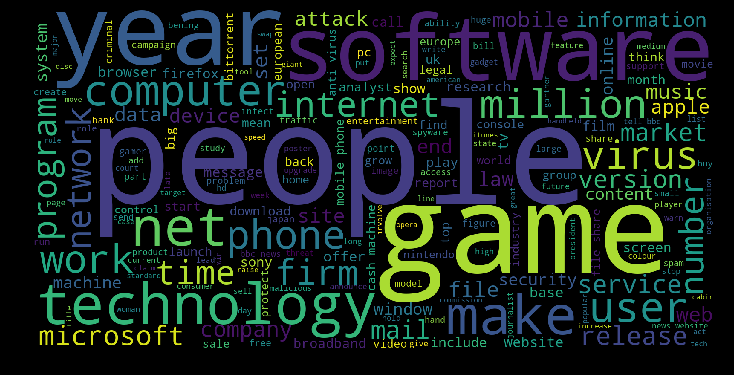

In [131]:
# list_Tokens creates a single list of all the tokens in the corpus
list_Tokens =  list(([item for items in df_handle.Tokens.tolist() for item in items]))
wordcloudplot(list_Tokens, True)

## Opinion
It was interesting to see appearances of words like 'people', 'software', 'game' and 'year' appear so largely in the wordcloud of the corpus. The word 'technology' also appears a lot in the corpus as seen from the wordcloud which would indicate that the corpus is potentially made up of articles of the topic 'tech'

# Q4
**Plot separated wordclouds for first 5 documents. Give the opinion on what you see.**



Document 1


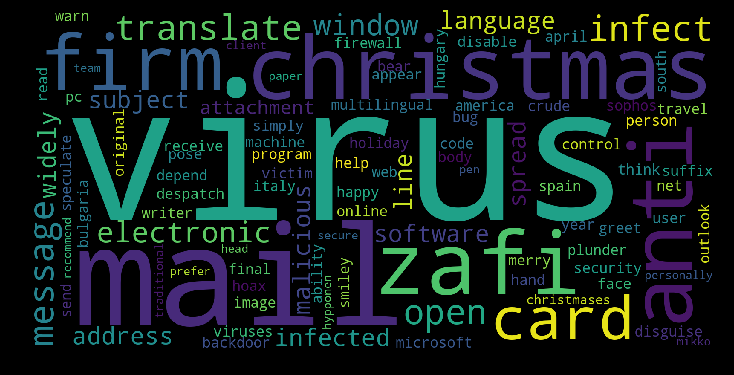



Document 2


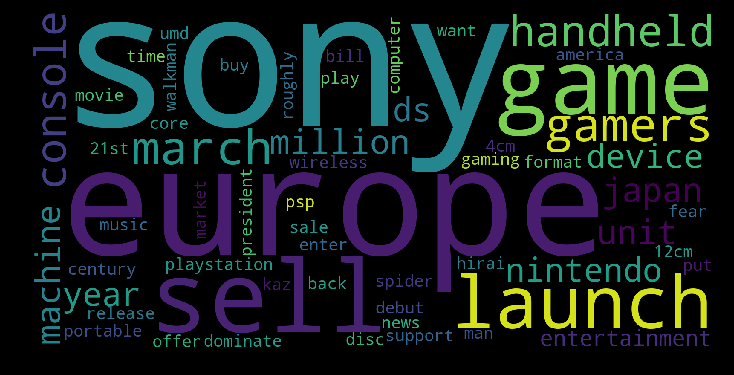



Document 3


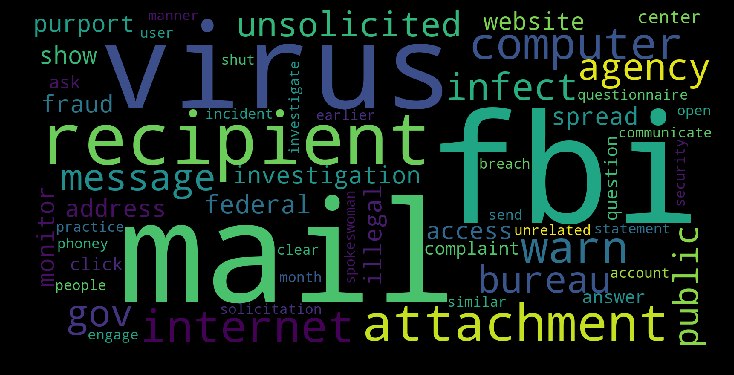



Document 4


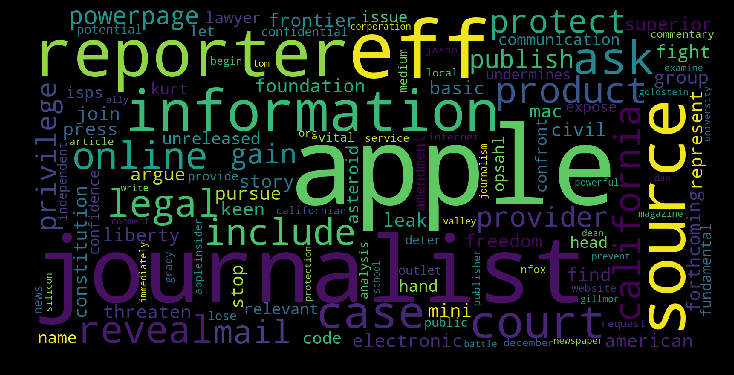



Document 5


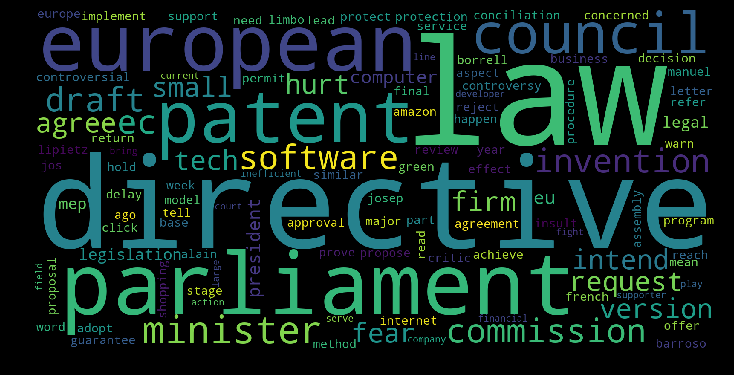

In [132]:
i = 0
for i in range(5):
    tokens = df_handle.iloc[i]['Tokens']
    print("\n\nDocument " + str(i+1))
    wordcloudplot(tokens, True)
    i += 1

## Opinion
It was interesting to see the most common words for the first 5 documents.

**Document 1**: Very much dominated my tech words like 'virus' and 'mail

**Document 2**: Tech related words like 'sony' and 'gamers' and 'device' present. Can decipher what article is about by looking at wordcloud.

**Document 3**: 'virus' again presetn in this wordcloud, along with 'fbi'. Maybe a hacking investigation.

**Document 4**: 'apple' is now seen in the wordcloud and can be deciphered as the multinational company from the wordcloud with other words like 'california' present.

**Document 5**: Final document has dominent words like 'law', 'parliament' and 'europe'. Different from the other previous documents. However, 'software' can also be seen.

In conclusion, these documents all seem to have tech related words. It was interesting to see the different words that were very common in the document dominate their respective wordcloud.

# Q5
**Find and plot the top-10 most common words for whole corpus. Save that figure into "img_top10_common.png"**



Top 10 most common words in corpus:

('people', 103), ('year', 91), ('game', 84), ('software', 71), ('virus', 62), ('phone', 62), ('technology', 62), ('make', 60), ('net', 54), ('firm', 51)




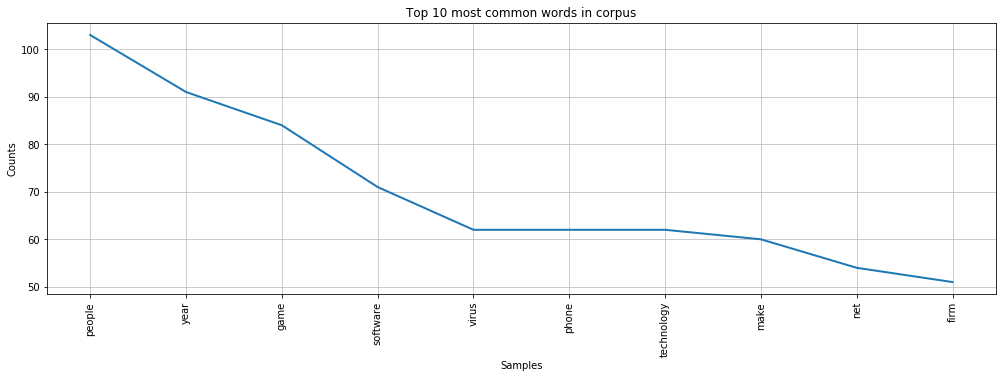

In [133]:
list_Tokens =  list(([item for items in df_handle.Tokens.tolist() for item in items]))
word_frequency = nltk.FreqDist(list_Tokens)
#What are the top-10 most frequent words
print("\n\nTop 10 most common words in corpus:\n\n" + str(word_frequency.most_common(10)).strip('[]') + "\n\n")
fig = plt.figure(figsize=(17,5))
word_frequency.plot(10, title='Top 10 most common words in corpus')
fig.savefig("img_top10_common.png")

## Opinion
It was no suprise to see the most common words as we had previously seen these in the wordclouds. 

However, it was very interesting to see the steep decline in frequency after the first 5 most common words, as shown in the plot above. The **'people'** word is the only one to surpass 100 occurences and is far ahead from the second most common word **'year'**.

It was also very intriguing to see how after **'virus'**, the slope of the line decreases dramatically as a plateau is seen.

# Q6
**Find and plot the top-10 most common words for each document. Give the opinion on what you see.**

Top 10 most common words in Document 1:

('virus', 12), ('mail', 7), ('christmas', 4), ('zafi', 4), ('anti', 4), ('firm', 3), ('card', 3), ('translate', 3), ('infect', 3), ('open', 3)




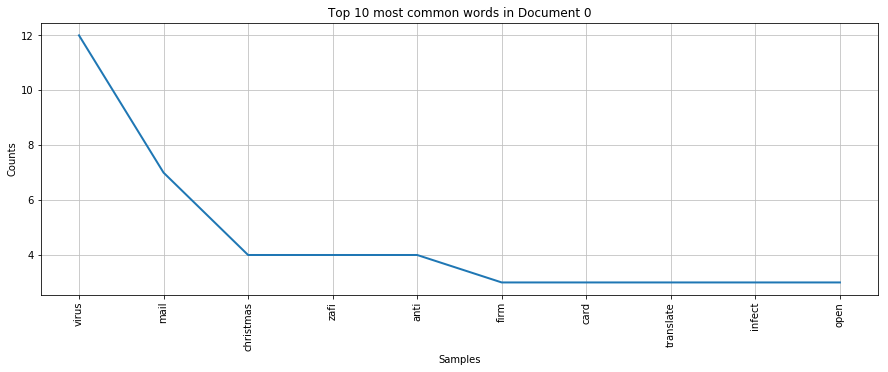

Top 10 most common words in Document 2:

('sony', 5), ('europe', 3), ('sell', 3), ('game', 3), ('launch', 3), ('gamers', 2), ('march', 2), ('handheld', 2), ('console', 2), ('million', 2)




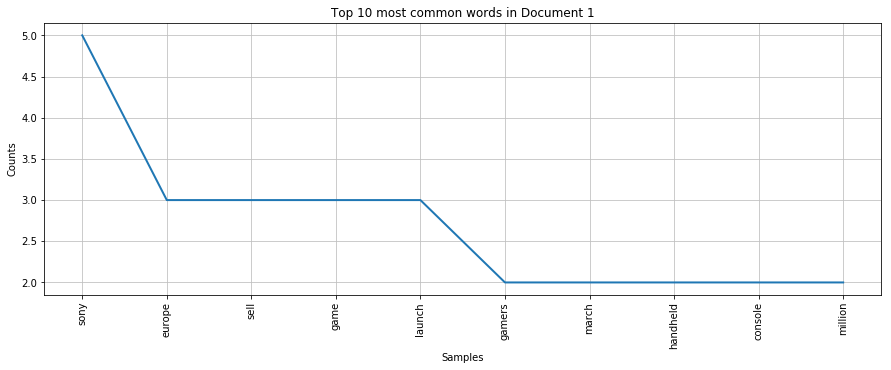

Top 10 most common words in Document 3:

('fbi', 7), ('mail', 6), ('virus', 4), ('recipient', 4), ('attachment', 4), ('warn', 3), ('computer', 3), ('internet', 3), ('bureau', 2), ('gov', 2)




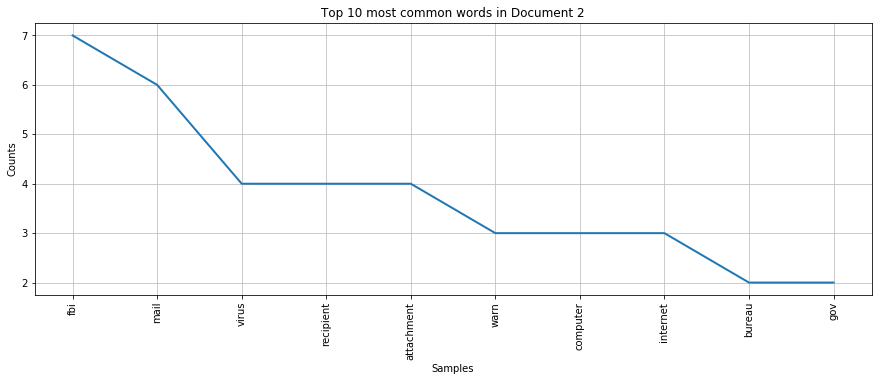

Top 10 most common words in Document 4:

('apple', 10), ('journalist', 7), ('eff', 5), ('reporter', 5), ('source', 5), ('information', 5), ('ask', 3), ('court', 3), ('case', 3), ('legal', 2)




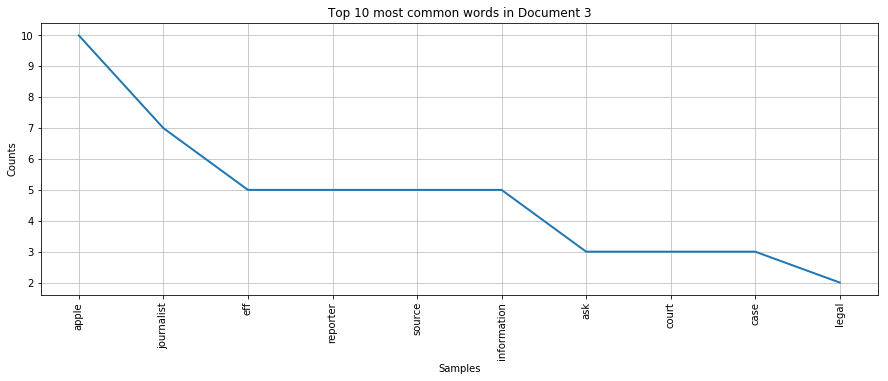

Top 10 most common words in Document 5:

('law', 6), ('directive', 6), ('parliament', 6), ('european', 5), ('patent', 5), ('council', 5), ('minister', 4), ('software', 3), ('draft', 3), ('commission', 3)




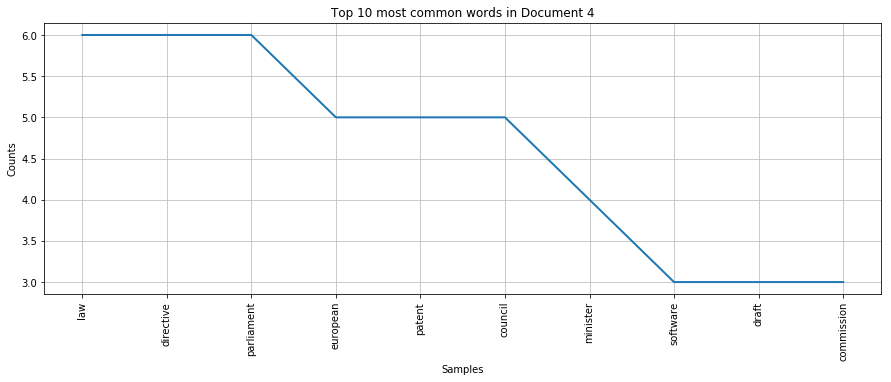

Top 10 most common words in Document 6:

('software', 7), ('wong', 7), ('colour', 7), ('blind', 4), ('image', 4), ('student', 3), ('develop', 3), ('note', 3), ('read', 3), ('map', 3)




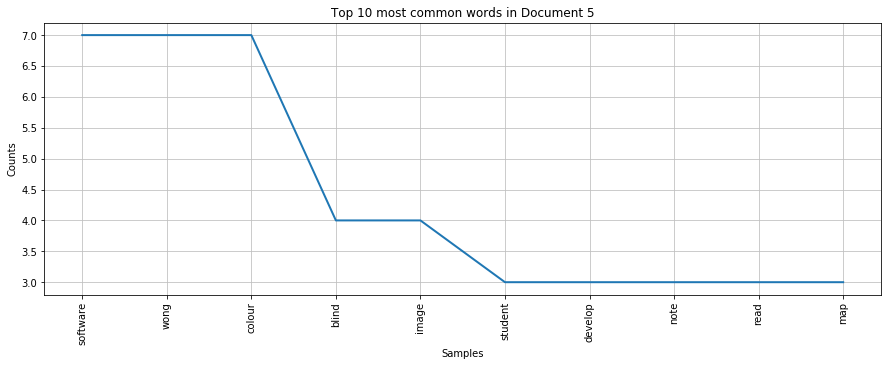

Top 10 most common words in Document 7:

('music', 13), ('mobile', 12), ('phone', 12), ('people', 8), ('sale', 6), ('market', 6), ('gartner', 5), ('year', 5), ('million', 4), ('design', 4)




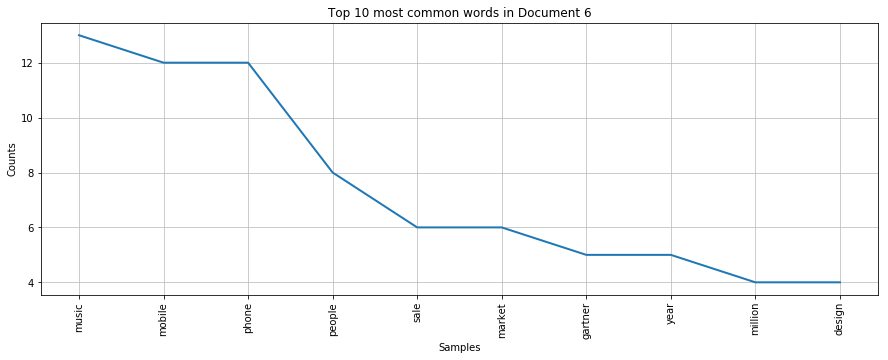

Top 10 most common words in Document 8:

('phone', 18), ('mobile', 15), ('back', 9), ('lose', 6), ('year', 6), ('people', 5), ('book', 5), ('service', 5), ('owner', 4), ('address', 4)




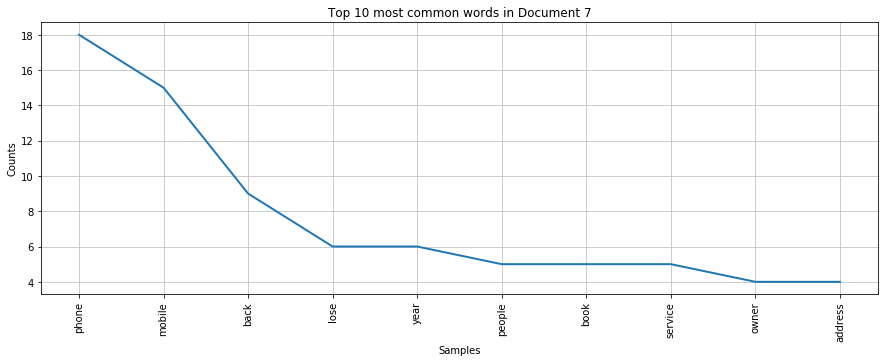

Top 10 most common words in Document 9:

('content', 14), ('internet', 10), ('tv', 9), ('regulation', 9), ('net', 8), ('service', 4), ('provider', 4), ('consumer', 4), ('ofcom', 3), ('set', 3)




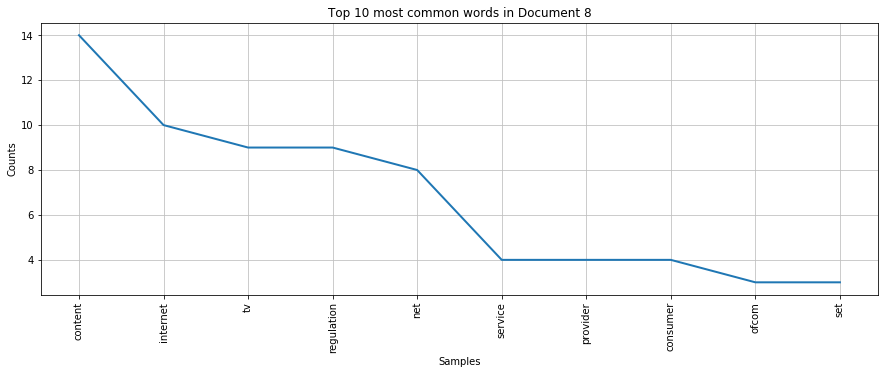

Top 10 most common words in Document 10:

('opera', 7), ('voice', 7), ('browser', 5), ('people', 5), ('feature', 4), ('version', 3), ('page', 3), ('appeal', 3), ('make', 3), ('company', 3)




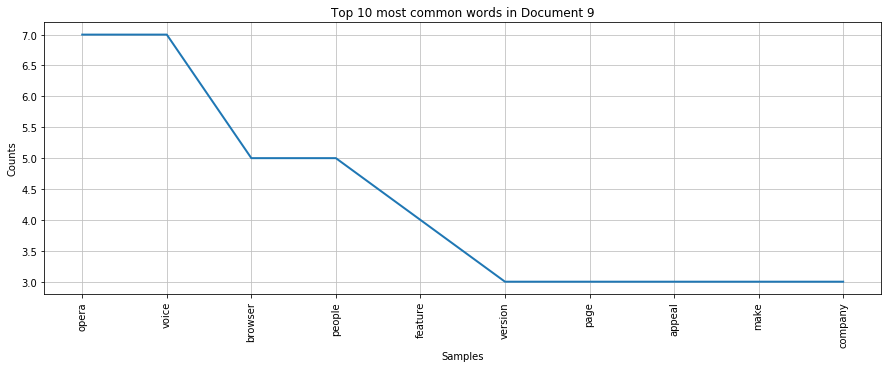

Top 10 most common words in Document 11:

('phone', 10), ('cabir', 10), ('virus', 6), ('range', 5), ('firm', 4), ('program', 4), ('bluetooth', 4), ('strain', 3), ('handset', 3), ('symbian', 3)




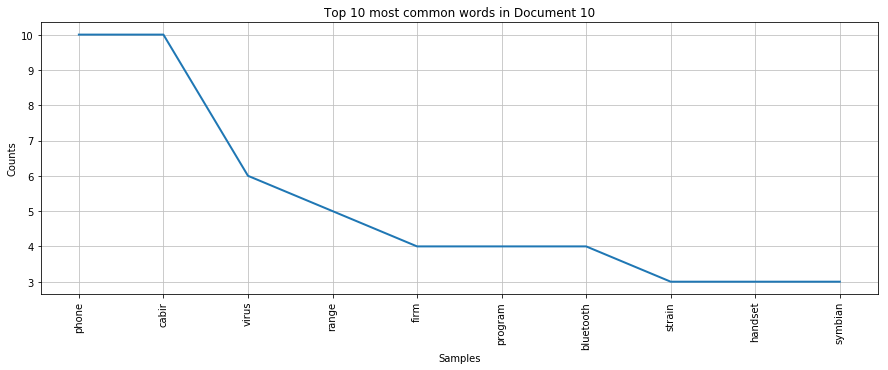

Top 10 most common words in Document 12:

('people', 6), ('arrest', 5), ('website', 5), ('criminal', 5), ('credit', 5), ('card', 5), ('fraud', 4), ('shadowcrew', 4), ('information', 4), ('identity', 3)




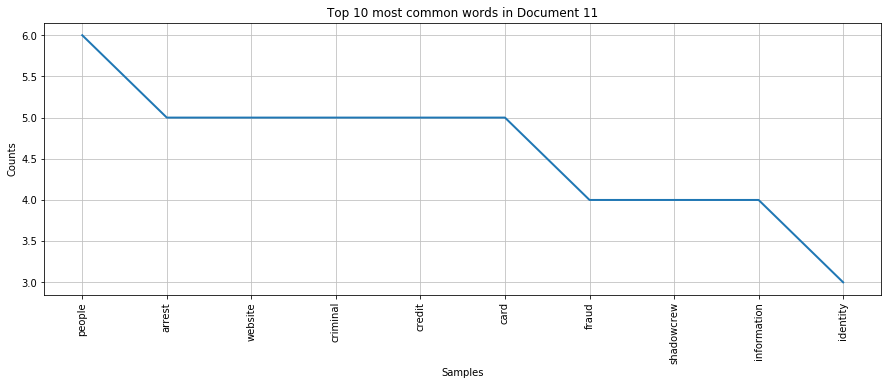

Top 10 most common words in Document 13:

('cash', 20), ('machine', 19), ('bank', 14), ('virus', 10), ('network', 9), ('year', 6), ('system', 5), ('risk', 5), ('computer', 4), ('window', 4)




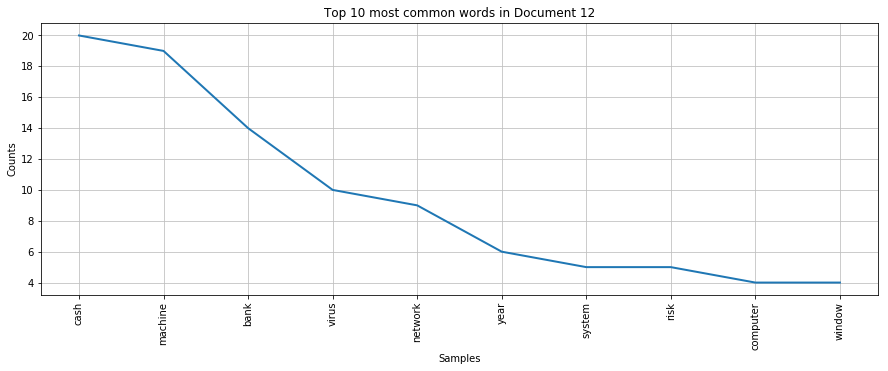

Top 10 most common words in Document 14:

('jaynes', 6), ('year', 5), ('sister', 4), ('mail', 4), ('state', 4), ('prosecutor', 4), ('send', 3), ('internet', 3), ('virginia', 3), ('law', 3)




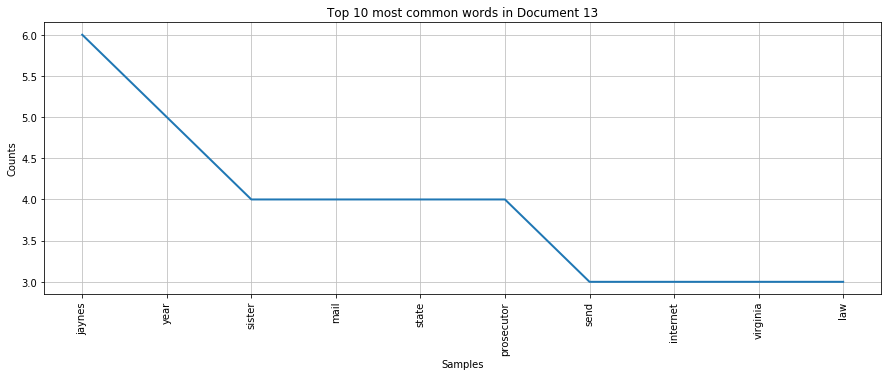

Top 10 most common words in Document 15:

('technology', 10), ('make', 7), ('game', 7), ('gate', 6), ('device', 6), ('work', 5), ('people', 5), ('consumer', 4), ('show', 4), ('gadget', 4)




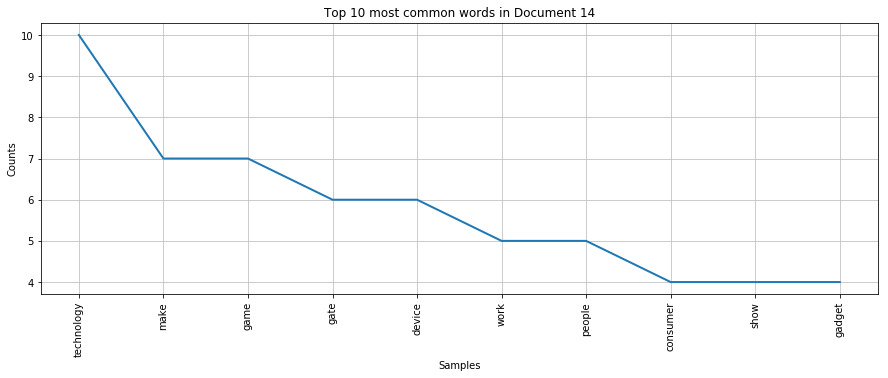

Top 10 most common words in Document 16:

('game', 12), ('san', 8), ('andreas', 6), ('set', 5), ('city', 5), ('cj', 4), ('vehicle', 4), ('gta', 3), ('gameplay', 3), ('control', 3)




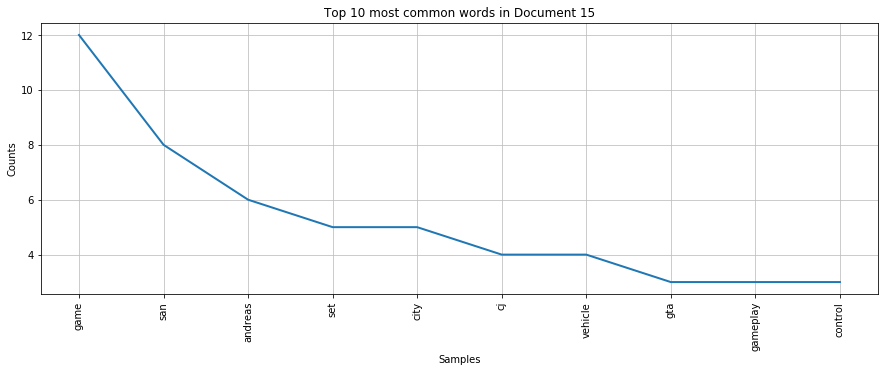

Top 10 most common words in Document 17:

('firefox', 12), ('browser', 8), ('microsoft', 6), ('internet', 6), ('explorer', 5), ('people', 5), ('program', 5), ('release', 4), ('software', 4), ('mozilla', 4)




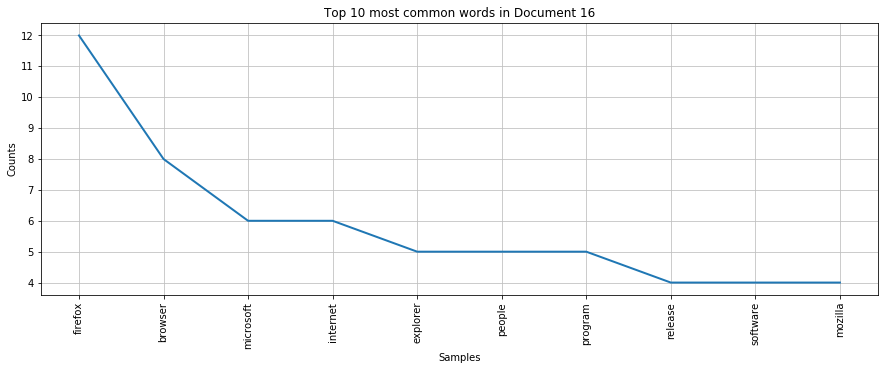

Top 10 most common words in Document 18:

('nintendo', 9), ('game', 8), ('screen', 8), ('device', 7), ('market', 5), ('handheld', 4), ('play', 4), ('d', 4), ('control', 4), ('machine', 4)




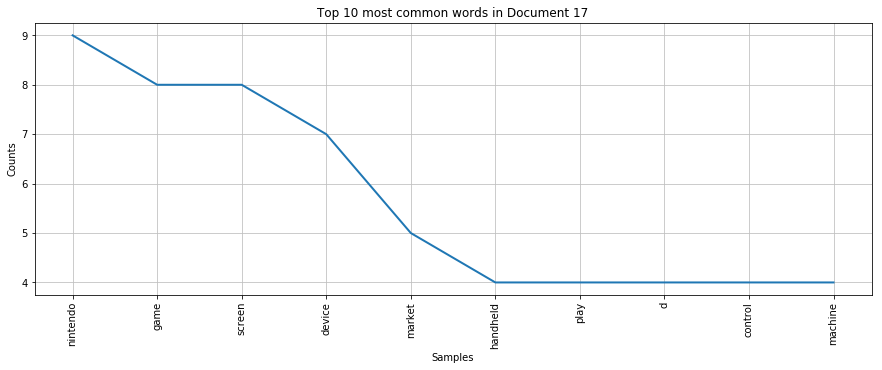

Top 10 most common words in Document 19:

('dvd', 16), ('game', 13), ('blu', 10), ('ray', 10), ('high', 10), ('technology', 10), ('generation', 7), ('format', 6), ('definition', 6), ('toshiba', 5)




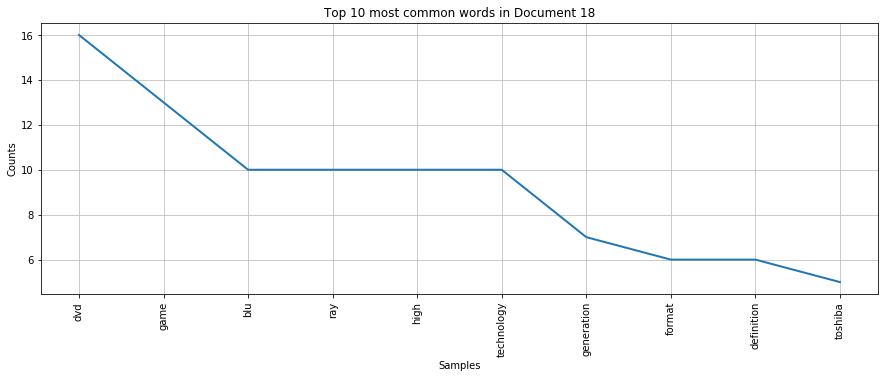

Top 10 most common words in Document 20:

('file', 17), ('system', 14), ('exeem', 10), ('bittorrent', 9), ('share', 9), ('swap', 7), ('version', 7), ('legal', 6), ('software', 6), ('tracker', 6)




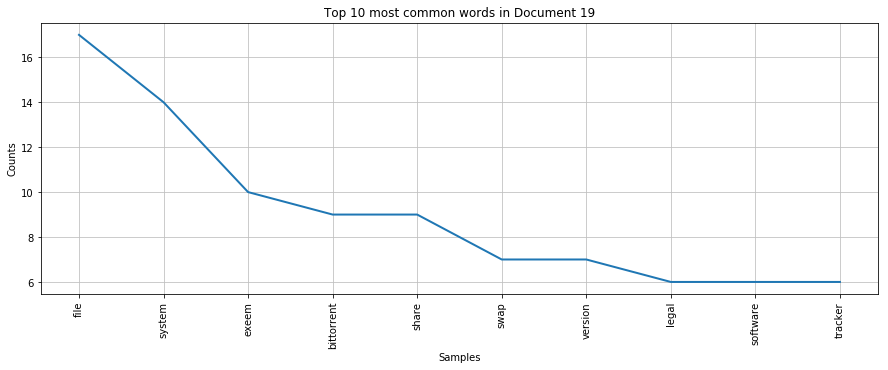

Top 10 most common words in Document 21:

('broadband', 7), ('tv', 7), ('year', 7), ('number', 6), ('analyst', 5), ('research', 4), ('million', 4), ('people', 4), ('net', 4), ('rise', 4)




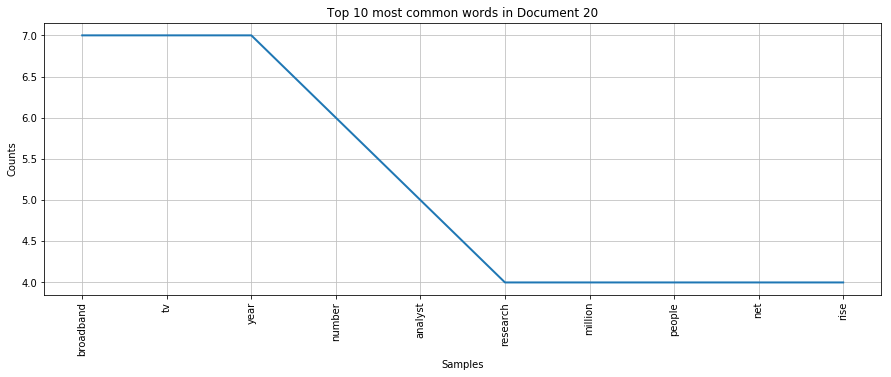

Top 10 most common words in Document 22:

('people', 5), ('blog', 5), ('service', 4), ('msn', 4), ('microsoft', 3), ('journal', 3), ('web', 3), ('blogging', 2), ('online', 2), ('call', 2)




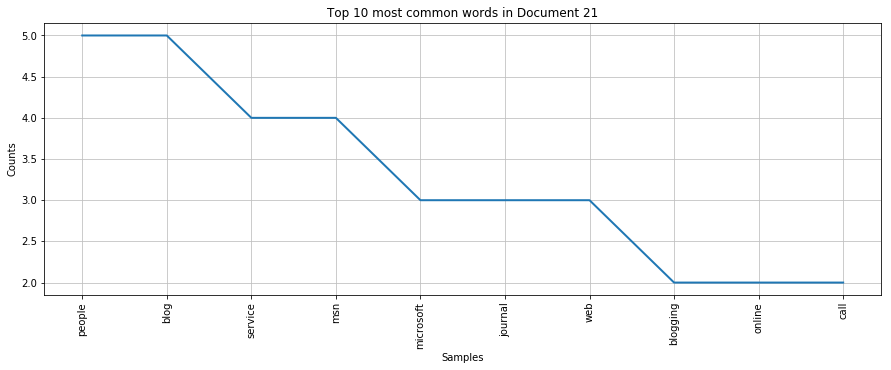

Top 10 most common words in Document 23:

('metal', 3), ('slug', 3), ('game', 3), ('offer', 3), ('2d', 2), ('side', 2), ('scrolling', 2), ('year', 2), ('level', 2), ('tough', 2)




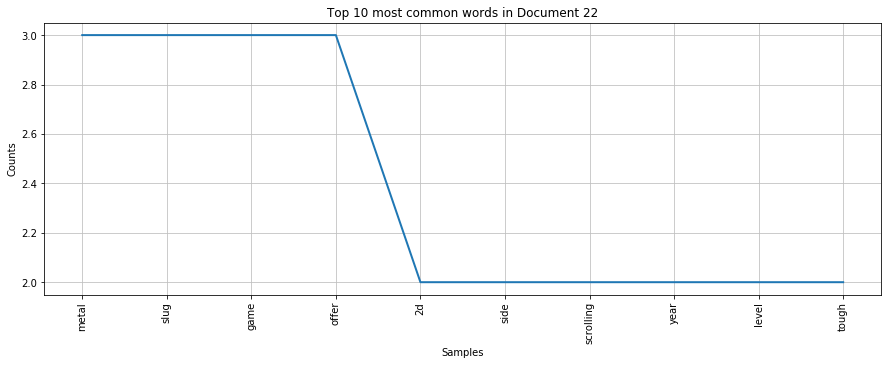

Top 10 most common words in Document 24:

('game', 11), ('release', 6), ('doom', 5), ('year', 5), ('award', 4), ('top', 3), ('sci', 2), ('fi', 2), ('shooter', 2), ('title', 2)




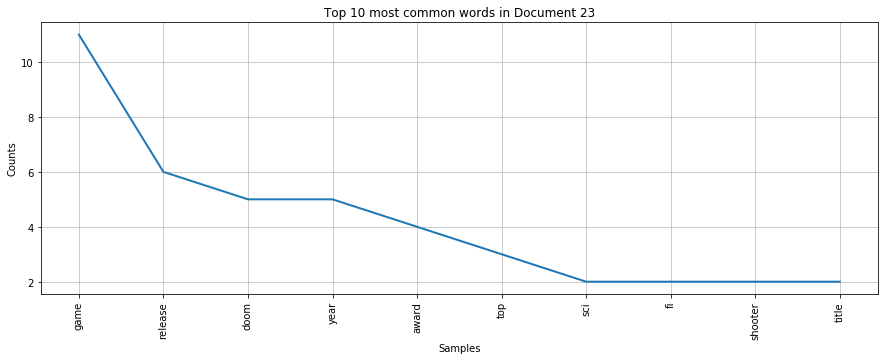

Top 10 most common words in Document 25:

('machine', 10), ('blue', 9), ('gene', 9), ('speed', 7), ('top', 6), ('supercomputer', 6), ('ibm', 5), ('teraflop', 5), ('test', 4), ('computer', 4)




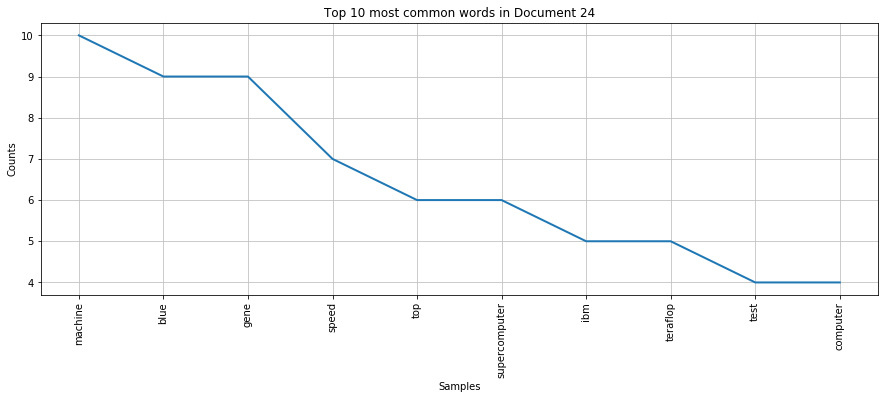

Top 10 most common words in Document 26:

('virus', 11), ('spyware', 9), ('anti', 8), ('software', 8), ('microsoft', 7), ('program', 7), ('user', 5), ('tool', 4), ('firm', 4), ('pc', 3)




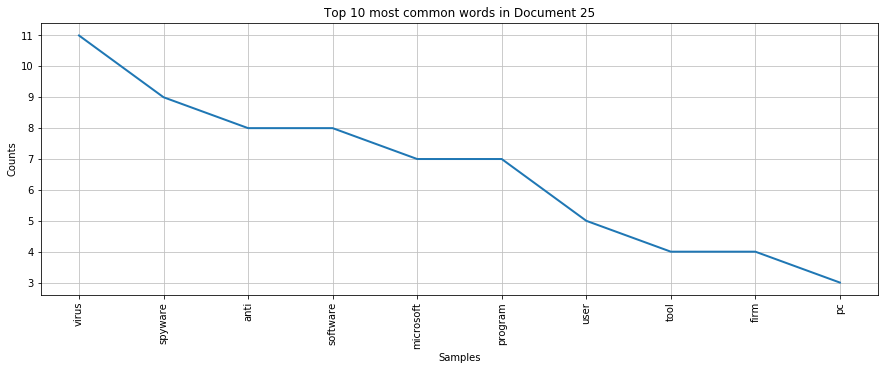

Top 10 most common words in Document 27:

('microsoft', 6), ('xp', 6), ('counterfeit', 5), ('software', 5), ('scheme', 4), ('version', 4), ('user', 4), ('window', 4), ('computer', 3), ('company', 3)




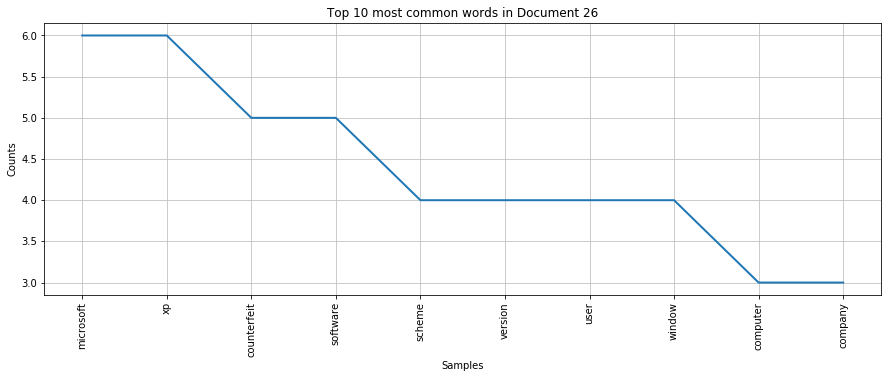

Top 10 most common words in Document 28:

('browser', 10), ('firefox', 10), ('microsoft', 6), ('mozilla', 6), ('release', 5), ('market', 5), ('user', 4), ('software', 4), ('internet', 3), ('explorer', 3)




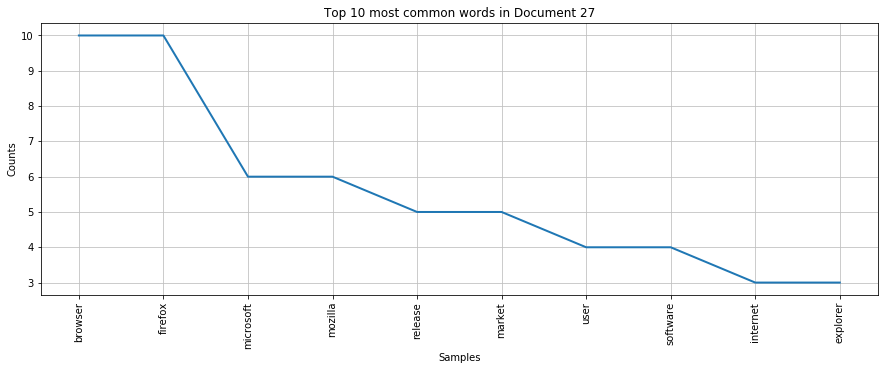

Top 10 most common words in Document 29:

('digital', 5), ('medium', 5), ('content', 5), ('work', 5), ('commission', 4), ('european', 3), ('nem', 3), ('scheme', 3), ('solution', 3), ('identify', 3)




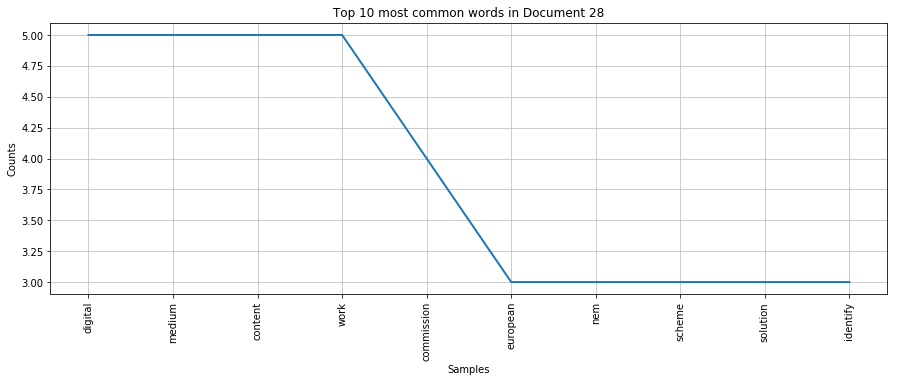

Top 10 most common words in Document 30:

('poster', 12), ('campaign', 6), ('phone', 5), ('number', 4), ('information', 3), ('red', 3), ('technology', 3), ('run', 3), ('londoner', 2), ('mobile', 2)




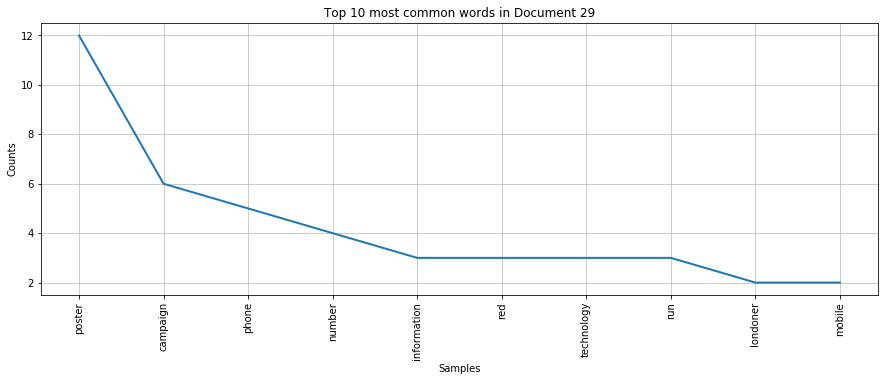

Top 10 most common words in Document 31:

('search', 4), ('engine', 3), ('people', 3), ('online', 2), ('strange', 2), ('enquiry', 2), ('include', 2), ('dog', 2), ('key', 2), ('type', 2)




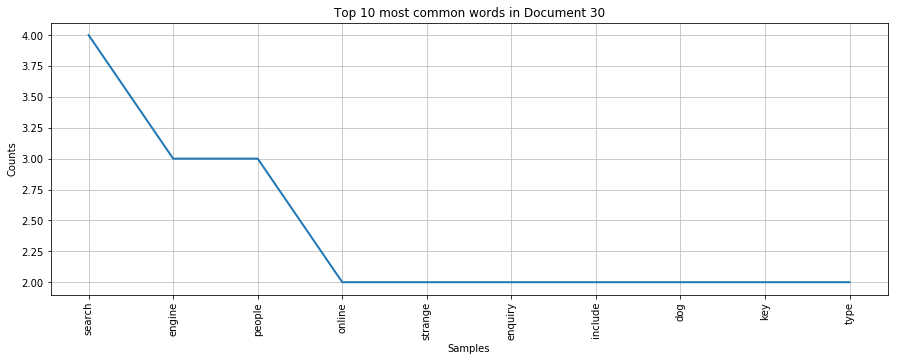

Top 10 most common words in Document 32:

('domain', 7), ('name', 4), ('job', 4), ('mobile', 3), ('address', 3), ('mobi', 3), ('internet', 2), ('aim', 2), ('service', 2), ('icann', 2)




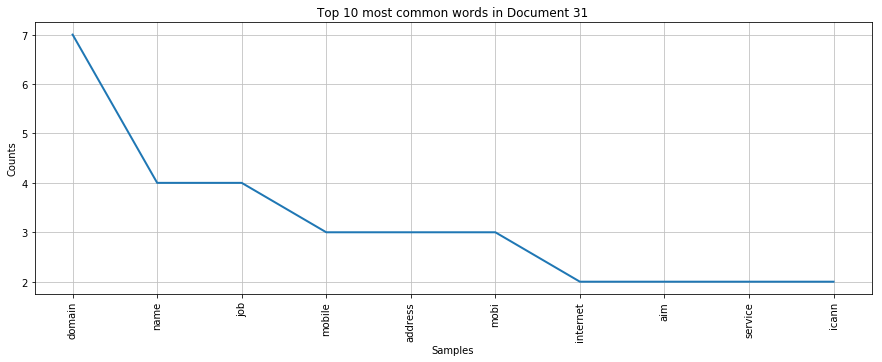

Top 10 most common words in Document 33:

('site', 9), ('bittorrent', 8), ('share', 5), ('peer', 4), ('legal', 4), ('server', 4), ('action', 3), ('think', 3), ('suprnova', 3), ('link', 3)




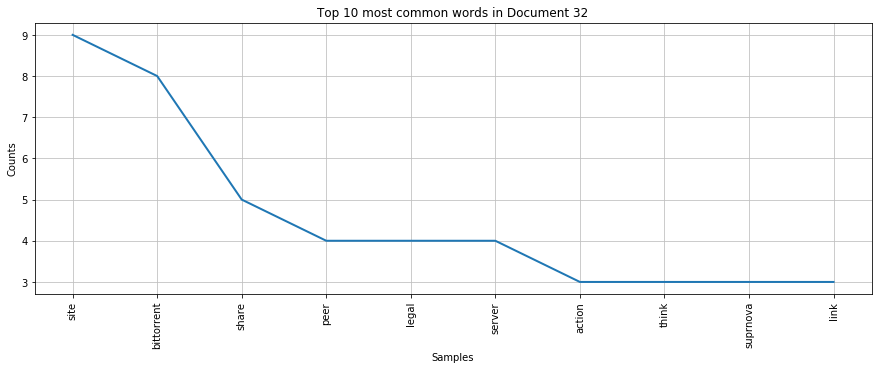

Top 10 most common words in Document 34:

('broadband', 6), ('million', 5), ('people', 4), ('line', 4), ('fcc', 3), ('june', 3), ('american', 2), ('figure', 2), ('number', 2), ('business', 2)




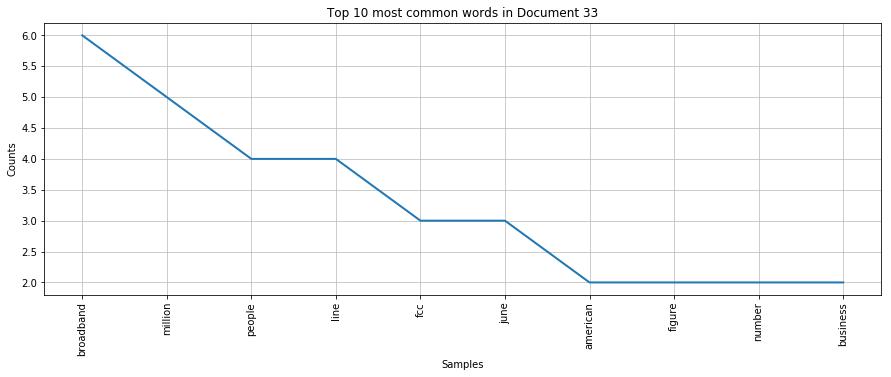

Top 10 most common words in Document 35:

('search', 15), ('desktop', 8), ('file', 6), ('firm', 5), ('web', 5), ('mail', 4), ('user', 4), ('internet', 3), ('yahoo', 3), ('technology', 3)




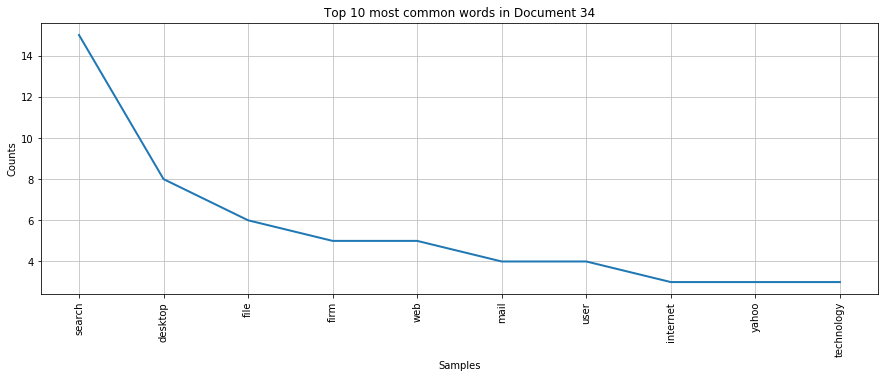

Top 10 most common words in Document 36:

('texas', 7), ('message', 6), ('act', 6), ('lawsuit', 5), ('spammer', 5), ('mail', 5), ('spam', 5), ('men', 4), ('company', 4), ('file', 3)




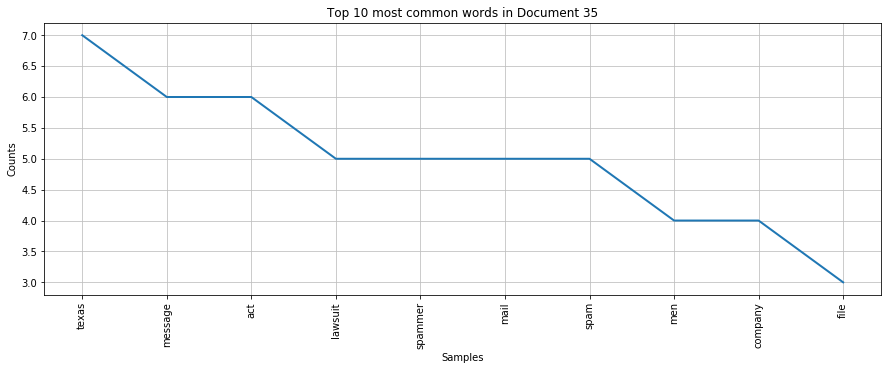

Top 10 most common words in Document 37:

('user', 6), ('itunes', 6), ('security', 3), ('file', 3), ('version', 3), ('problem', 3), ('apple', 2), ('music', 2), ('avoid', 2), ('playlist', 2)




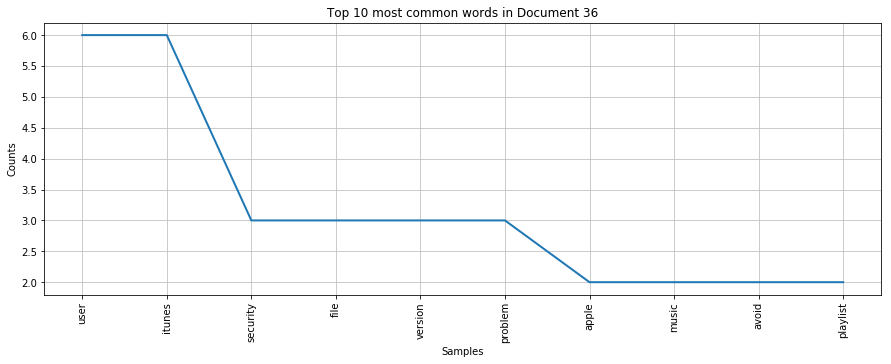

Top 10 most common words in Document 38:

('attack', 21), ('net', 11), ('data', 9), ('site', 8), ('traffic', 8), ('target', 5), ('firm', 5), ('seagrave', 5), ('criminal', 4), ('ddos', 4)




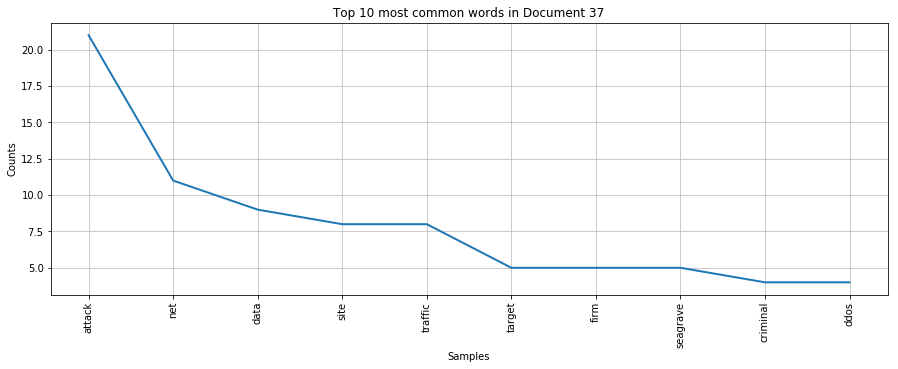

Top 10 most common words in Document 39:

('game', 16), ('hd', 13), ('tv', 6), ('high', 6), ('console', 6), ('screen', 5), ('set', 5), ('make', 5), ('quality', 4), ('hdtv', 4)




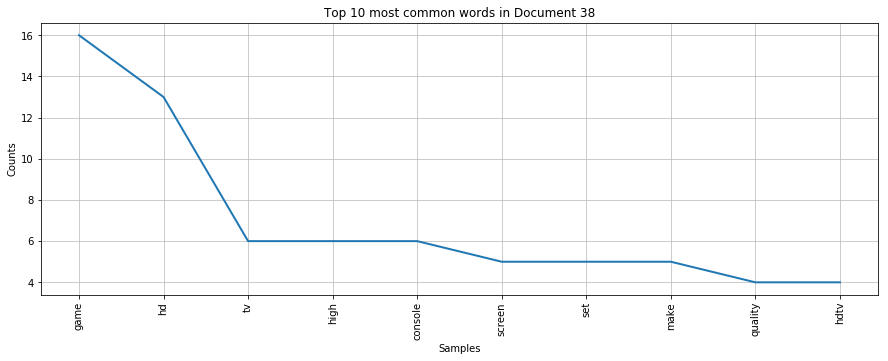

Top 10 most common words in Document 40:

('net', 12), ('security', 9), ('year', 7), ('program', 7), ('woman', 6), ('virus', 6), ('people', 5), ('home', 5), ('user', 5), ('broadband', 5)




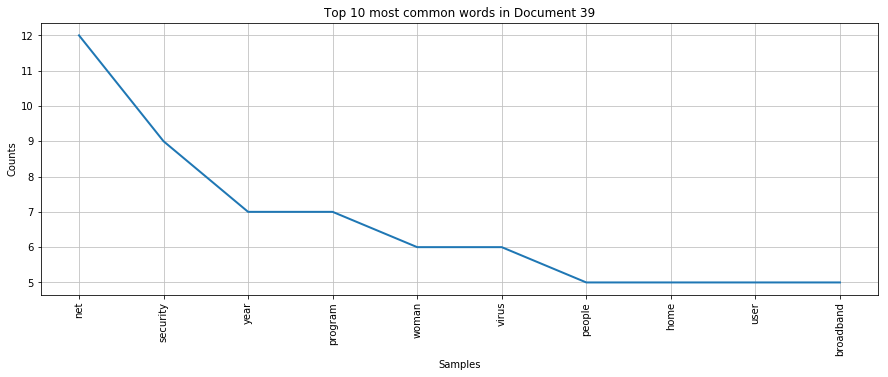

Top 10 most common words in Document 41:

('sony', 5), ('europe', 3), ('sell', 3), ('game', 3), ('launch', 3), ('gamers', 2), ('march', 2), ('handheld', 2), ('console', 2), ('million', 2)




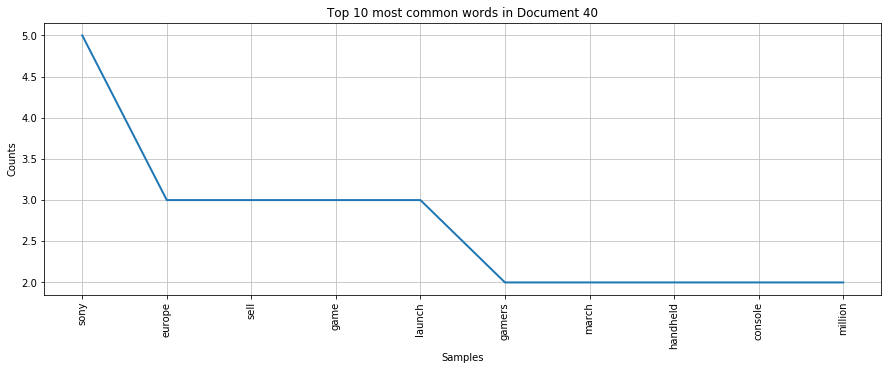

Top 10 most common words in Document 42:

('bening', 13), ('role', 10), ('film', 7), ('award', 6), ('actress', 5), ('oscar', 5), ('play', 5), ('win', 4), ('american', 4), ('hollywood', 3)




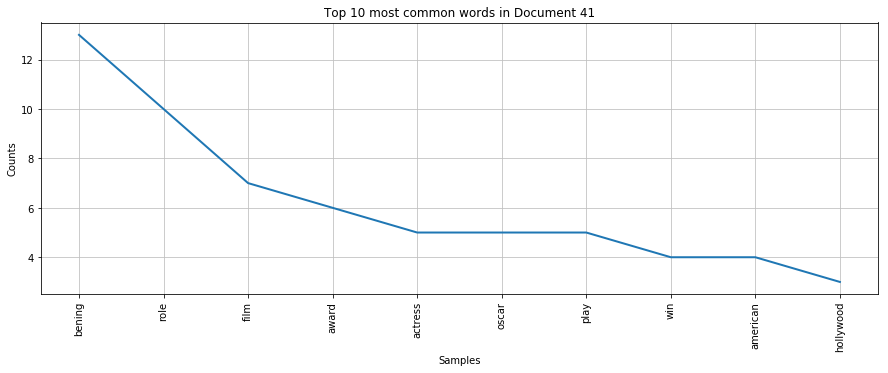

Top 10 most common words in Document 43:

('bill', 9), ('european', 6), ('software', 4), ('patent', 4), ('law', 4), ('parliament', 3), ('draft', 3), ('reject', 2), ('consultation', 2), ('back', 2)




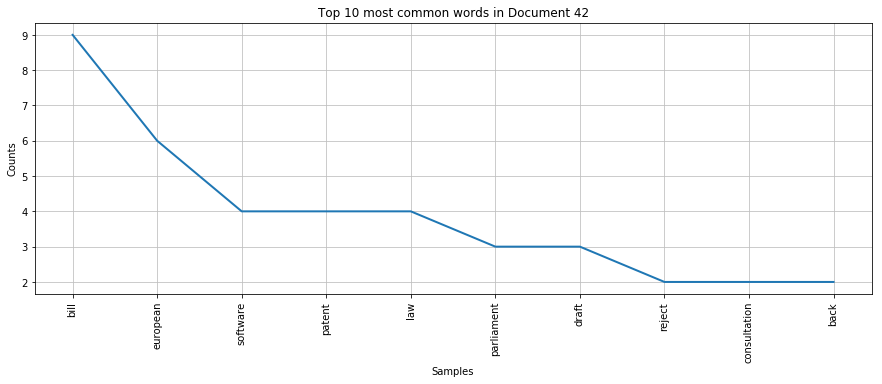

Top 10 most common words in Document 44:

('music', 13), ('mobile', 12), ('phone', 12), ('people', 8), ('sale', 6), ('market', 6), ('gartner', 5), ('year', 5), ('million', 4), ('design', 4)




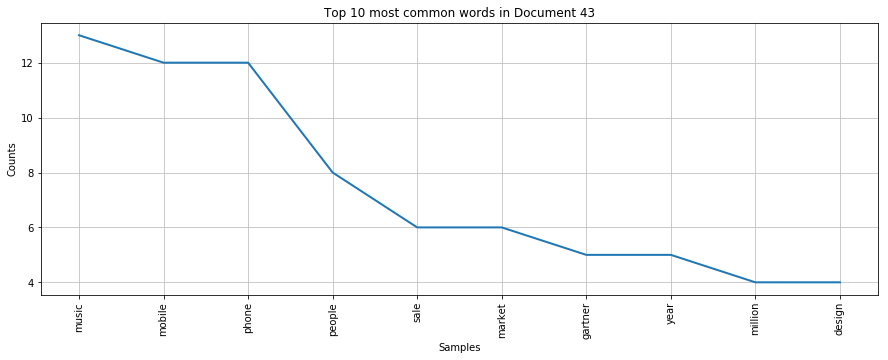

Top 10 most common words in Document 45:

('gadget', 9), ('list', 4), ('year', 4), ('stuff', 3), ('essential', 3), ('lover', 3), ('portable', 2), ('top', 2), ('uk', 2), ('set', 2)




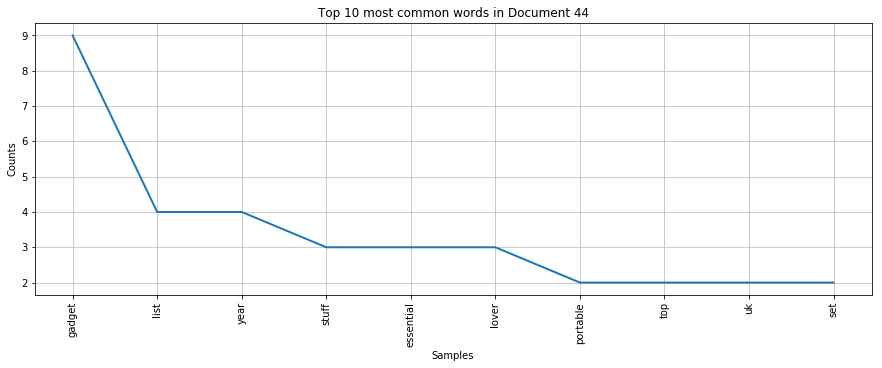

Top 10 most common words in Document 46:

('movie', 5), ('umd', 5), ('psp', 4), ('sony', 3), ('game', 3), ('film', 3), ('people', 3), ('lion', 2), ('gate', 2), ('announce', 2)




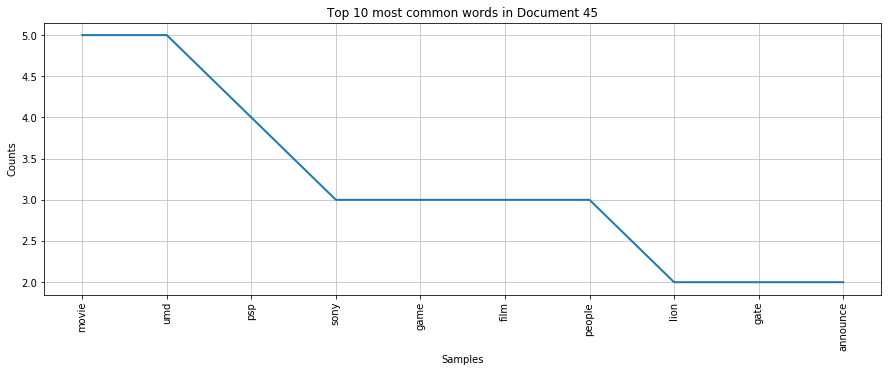

Top 10 most common words in Document 47:

('software', 12), ('internet', 8), ('dod', 8), ('network', 6), ('computer', 6), ('crack', 6), ('code', 5), ('warez', 4), ('custom', 4), ('people', 4)




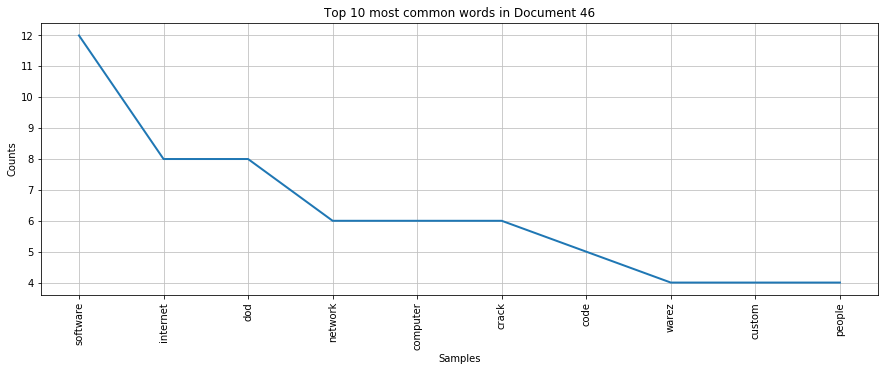

Top 10 most common words in Document 48:

('apple', 11), ('blogger', 6), ('product', 5), ('secret', 5), ('rule', 4), ('trade', 4), ('judge', 4), ('law', 4), ('public', 4), ('legal', 3)




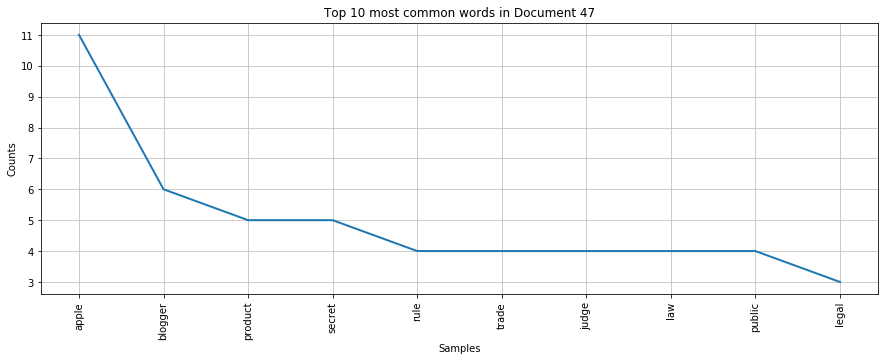

Top 10 most common words in Document 49:

('file', 13), ('court', 8), ('share', 7), ('firm', 6), ('peer', 6), ('supreme', 5), ('network', 5), ('industry', 5), ('innovation', 5), ('music', 5)




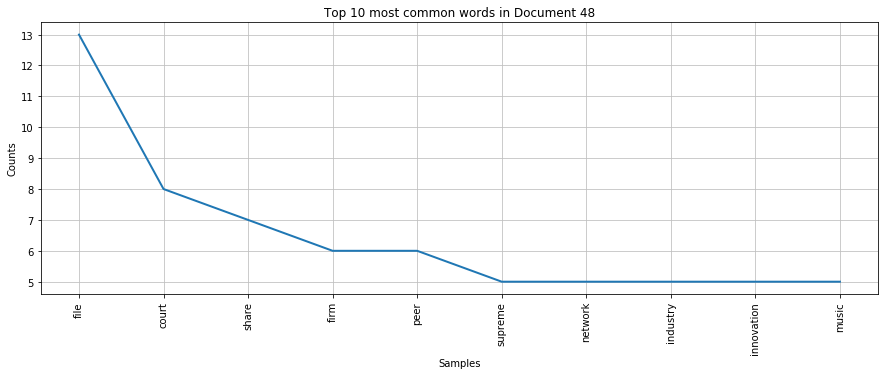

Top 10 most common words in Document 50:

('virus', 5), ('message', 5), ('beckham', 4), ('computer', 4), ('program', 4), ('open', 4), ('trojan', 4), ('interest', 3), ('malicious', 3), ('infect', 3)




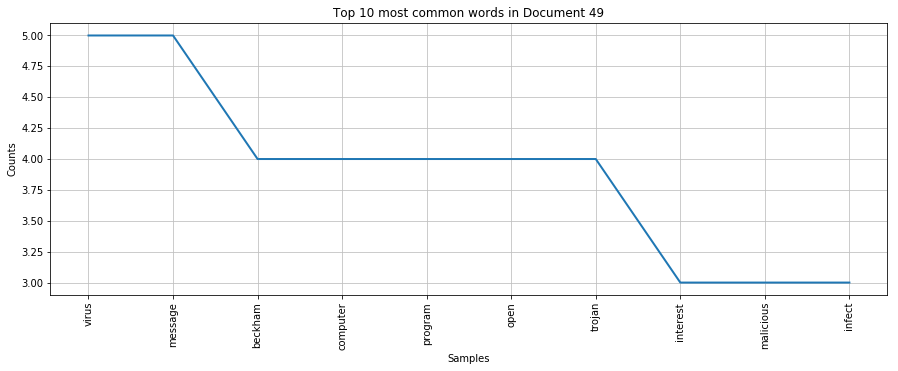

Top 10 most common words in Document 51:

('yoran', 8), ('security', 7), ('division', 7), ('network', 6), ('cyber', 6), ('attack', 6), ('department', 5), ('homeland', 4), ('virus', 4), ('organisation', 4)




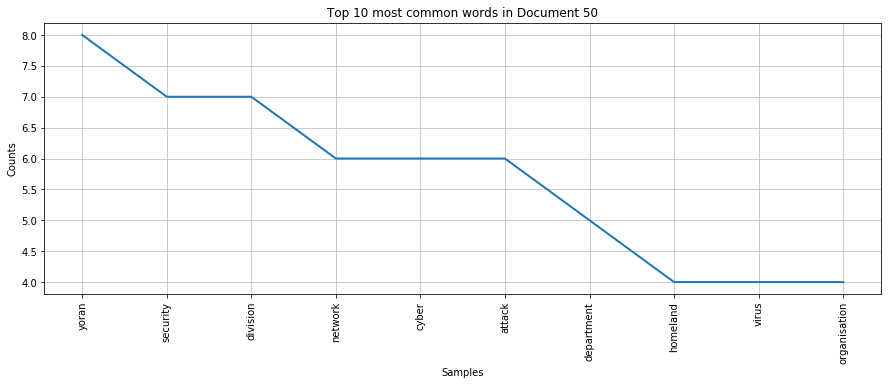

In [134]:
count = 0
for count in range(len(df_handle)):
    tokens = df_handle.iloc[count]['Tokens']
    word_frequency = nltk.FreqDist(tokens)
    #What are the top-10 most frequent words
    doc_num = count+1
    print("Top 10 most common words in Document "+str(doc_num)+":\n\n" + str(word_frequency.most_common(10)).strip('[]') + "\n\n")
    plt.figure(figsize=(15,5))
    word_frequency.plot(10, title='Top 10 most common words in Document '+str(count))

In [135]:
count = 0
top_10_df = pd.DataFrame(columns=['Document','Word','Frequency'])
for count in range(len(df_handle)):
    tokens = df_handle.iloc[count]['Tokens']
    word_frequency = nltk.FreqDist(tokens)
    for tupl in word_frequency.most_common(10):
        top_10_df = top_10_df.append({'Document':count,'Word':tupl[0],'Frequency':tupl[1]}, ignore_index=True)
top_10_df.head(5)

,Document,Word,Frequency
0,0,virus,12
1,0,mail,7
2,0,christmas,4
3,0,zafi,4
4,0,anti,4


## Opinion

There are some very fascinating trends in the plots of the most common words in the articles. Firstly, a trend that is seen in the majority of articles is that one or two words dominate the article. For example, in **Document 14**, the word **'game'** dominates the article and then there is a steep drop off to the second most common word. However, there are still documents that feature three or four words with similar frequency before a steep decline.

Secondly, it can be seen that in general, there is a plateau in the plots of the most common words at around the **5th and 6th** most common word mark. This is understandable as articles would usually feature a specific topic and repeat it multiple times, these would be the top 4 or 5 words. 

I would conclude from these plots that in order to decipher the main topic of a document, only the Top-5 most common words in the document would need to be plotted. There would be no need to see all top 10 most frequent. 

It was interesting to see the trends of the most common words however, this method would not be used to find the special document in the corpus in the future. The special document would have the same graph trend as the other documents. However, the words would obviously be related to a different topic.

# Q7
**Find 5-top most common bigram, and 5-top most common trigram for corpus. Does it contain any information? Give the opinion.**

In [136]:
from nltk.tokenize import RegexpTokenizer
from nltk import ngrams
# Bigrams
corpus_bigram = ngrams(list_Tokens,2)  ## Getting bigram of list_Tokens
bigram_frequencies = nltk.FreqDist(corpus_bigram) ## frequenb
## to dataframe
dict_items =list(dict(bigram_frequencies).items())
df_bigramFreq = pd.DataFrame(dict_items,columns=['bigram','freq']).sort_values(by='freq', ascending=False)
df_bigramFreq = df_bigramFreq.reset_index(drop=True)
print("***** Top 5 most common bigrams in corpus *****")
df_bigramFreq.head(5)

***** Top 5 most common bigrams in corpus *****


,bigram,freq
0,"(mobile, phone)",18
1,"(cash, machine)",18
2,"(anti, virus)",16
3,"(file, share)",16
4,"(bbc, news)",13


In [137]:
## Trigrams
corpus_trigram = ngrams(list_Tokens,3)  ## Getting trigram of list_Tokens
trigram_frequencies = nltk.FreqDist(corpus_trigram) ## frequencies
## to dataframe
dict_items =list(dict(trigram_frequencies).items())
df_trigramFreq = pd.DataFrame(dict_items,columns=['trigram','freq']).sort_values(by='freq', ascending=False)
df_trigramFreq = df_trigramFreq.reset_index(drop=True)
print("***** Top 5 most common trigrams in corpus *****")
df_trigramFreq.head(5)

***** Top 5 most common trigrams in corpus *****


,trigram,freq
0,"(tell, bbc, news)",12
1,"(bbc, news, website)",11
2,"(anti, virus, firm)",6
3,"(peer, peer, network)",5
4,"(internet, service, provider)",5


## Opinion
The top 5 most common bigrams in the corpus was very interesting. **'cash machine'** was the joint top most common bigram with **'mobile phone'** followed by **'file share'**. **'tell bbc news'** was the most common trigram closely followed by **'bbc news website'**. 
There was a steep frequency drop off from the second most common trigram to the third most common trigram - **'peer peer networks'**.

- First of all, it was obvious to see that the documents were taken from BBC NEWS as it appeared in both the bigram and trigram frequency tables.

- Secondly, there are a lot of technology related bigrams and trigram's which indicates my documents are of the topic: tech. 
    - **Tech related bigrams**: 'cash machine', 'anti virus', 'file share', 'mobile phone'
    - **Tech related trigrams**: 'internet service provider', 'peer peer networks', 'anti-virus firm'

# Q8
**Extract noun tokens for each document using POS. To the dataframe, add a column "noun_tokens" which contains those noun_tokens.**

**Save your dataframe as "H1_tokens_data.csv"**

**Repeat the question number 6 for noun_tokens. Discuss what you observe.**

In [138]:
def extract_noun(text):
    import nltk
    lines = text
    # function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN'
    # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    return nouns

In [139]:
[n,d] = df_handle.shape
df_handle['noun_Tokens'] = ['']*n

for index, row in df_handle.iterrows():
    df_handle['noun_Tokens'].iloc[index] = extract_noun(" ".join(row['Tokens']))

df_handle.head(10)

,Title,Content,Tokens,noun_Tokens
0,Virus poses as Christmas e-mail\n,\nSecurity firms are warning about a Windows v...,"[security, firm, warn, window, virus, disguise...","[security, firm, warn, disguise, christmas, ca..."
1,Sony PSP console hits US in March\n,\nUS gamers will be able to buy Sony's PlaySta...,"[gamers, buy, sony, playstation, portable, mar...","[gamers, playstation, march, news, europe, deb..."
2,Security warning over 'FBI virus'\n,\nThe US Federal Bureau of Investigation is wa...,"[federal, bureau, investigation, warn, compute...","[bureau, investigation, computer, virus, mail,..."
3,Apple attacked over sources row\n,\nCivil liberties group the Electronic Frontie...,"[civil, liberty, group, electronic, frontier, ...","[liberty, group, foundation, eff, join, fight,..."
4,'No re-draft' for EU patent law\n,\nA proposed European law on software patents ...,"[propose, european, law, software, patent, dra...","[law, software, patent, draft, commission, mep..."
5,Blind student 'hears in colour'\n,\nA blind student has developed software that ...,"[blind, student, develop, software, turn, colo...","[student, develop, software, turn, note, victo..."
6,Looks and music to drive mobiles\n,\nMobile phones are still enjoying a boom time...,"[mobile, phone, enjoy, boom, time, sale, resea...","[phone, enjoy, boom, time, sale, research, tec..."
7,'Friends fear' with lost mobiles\n,\nPeople are becoming so dependent on their mo...,"[people, dependent, mobile, phone, concern, lo...","[people, phone, concern, phone, lose, friend, ..."
8,Net regulation 'still possible'\n,\nThe blurring of boundaries between TV and th...,"[blur, boundary, tv, internet, raise, question...","[blur, tv, internet, question, regulation, wat..."
9,Latest Opera browser gets vocal\n,"\nNet browser Opera 8.0, due for official rele...","[net, browser, opera, due, official, release, ...","[browser, opera, official, month, browser, mar..."


Top 10 most common noun tokens in Document 1:

('virus', 10), ('mail', 6), ('christmas', 4), ('firm', 3), ('card', 3), ('zafi', 3), ('translate', 3), ('anti', 3), ('message', 3), ('line', 2)




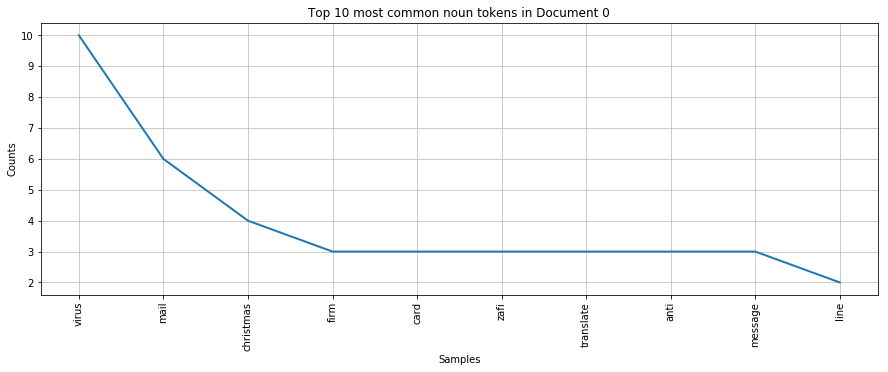

Top 10 most common noun tokens in Document 2:

('sony', 3), ('game', 3), ('launch', 3), ('gamers', 2), ('europe', 2), ('sell', 2), ('machine', 2), ('unit', 2), ('year', 2), ('ds', 2)




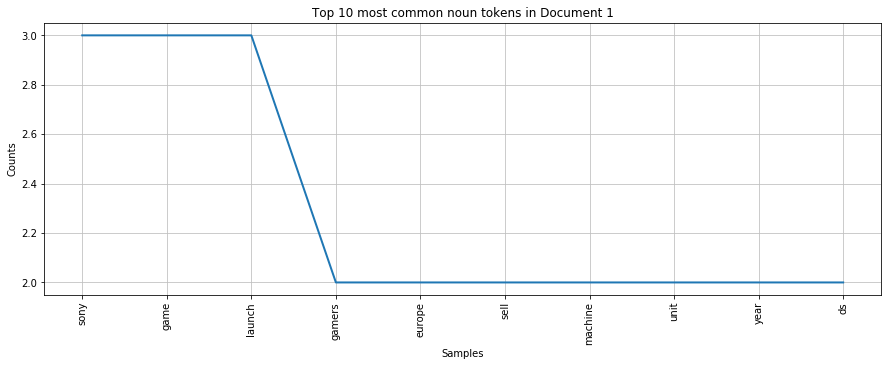

Top 10 most common noun tokens in Document 3:

('mail', 6), ('virus', 4), ('computer', 3), ('internet', 3), ('attachment', 3), ('bureau', 2), ('gov', 2), ('message', 2), ('agency', 2), ('investigation', 1)




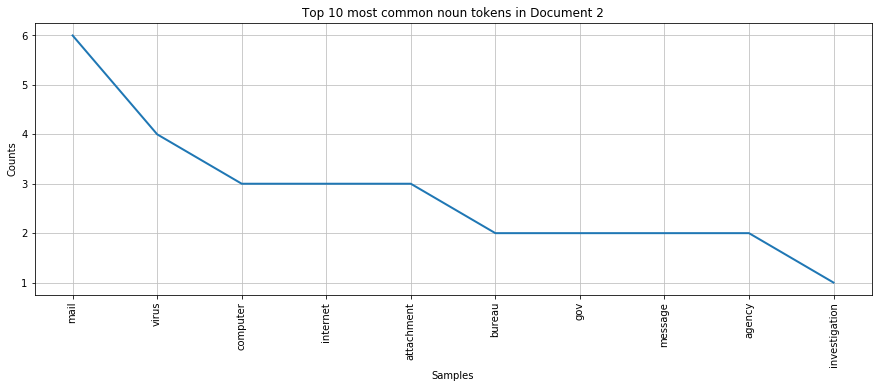

Top 10 most common noun tokens in Document 4:

('apple', 10), ('journalist', 7), ('reporter', 5), ('source', 5), ('information', 5), ('eff', 3), ('court', 3), ('case', 3), ('product', 2), ('california', 2)




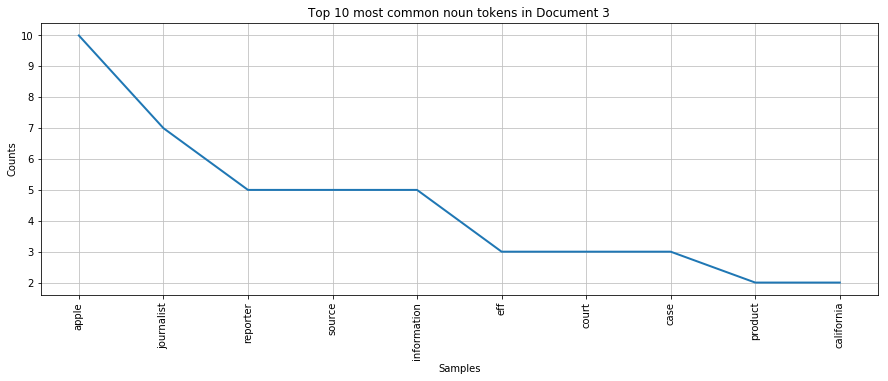

Top 10 most common noun tokens in Document 5:

('law', 6), ('council', 5), ('patent', 4), ('minister', 4), ('parliament', 4), ('software', 3), ('draft', 3), ('commission', 3), ('invention', 3), ('firm', 2)




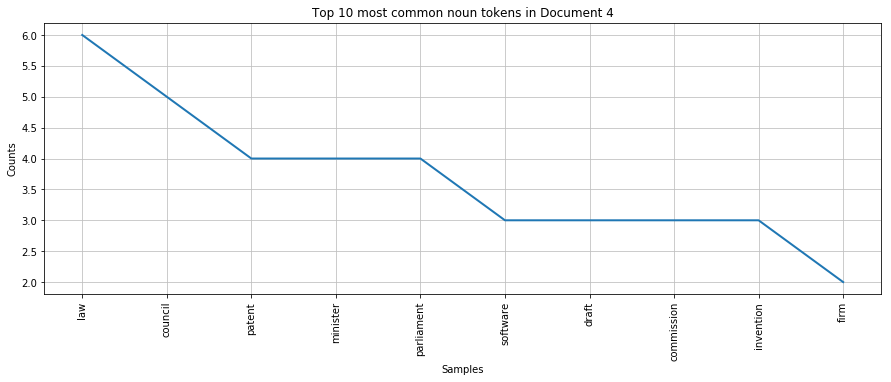

Top 10 most common noun tokens in Document 6:

('software', 7), ('image', 4), ('student', 3), ('note', 3), ('study', 3), ('develop', 2), ('order', 2), ('create', 2), ('colour', 2), ('music', 2)




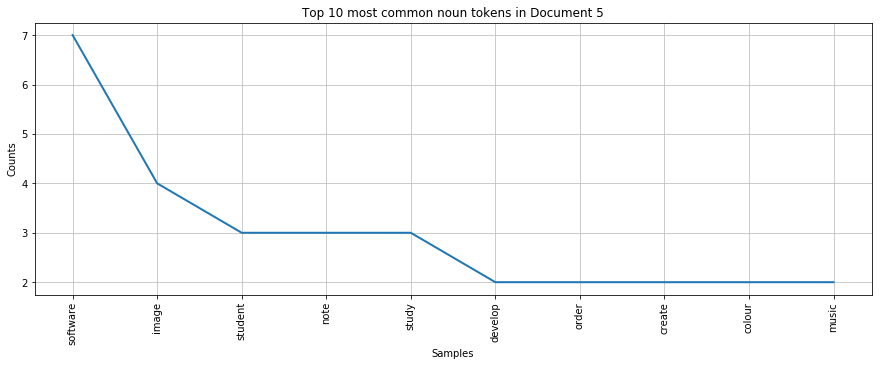

Top 10 most common noun tokens in Document 7:

('music', 13), ('phone', 12), ('people', 8), ('sale', 6), ('market', 6), ('gartner', 5), ('year', 5), ('design', 4), ('milanesi', 4), ('camera', 4)




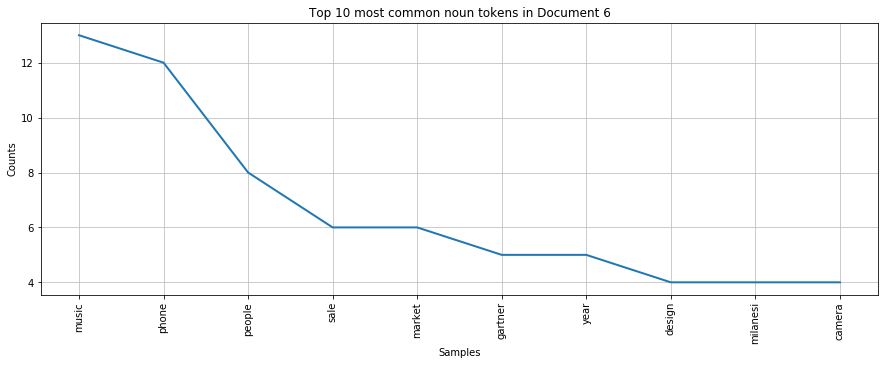

Top 10 most common noun tokens in Document 8:

('phone', 18), ('mobile', 7), ('year', 6), ('people', 5), ('book', 5), ('service', 5), ('owner', 4), ('address', 4), ('intervoice', 3), ('number', 3)




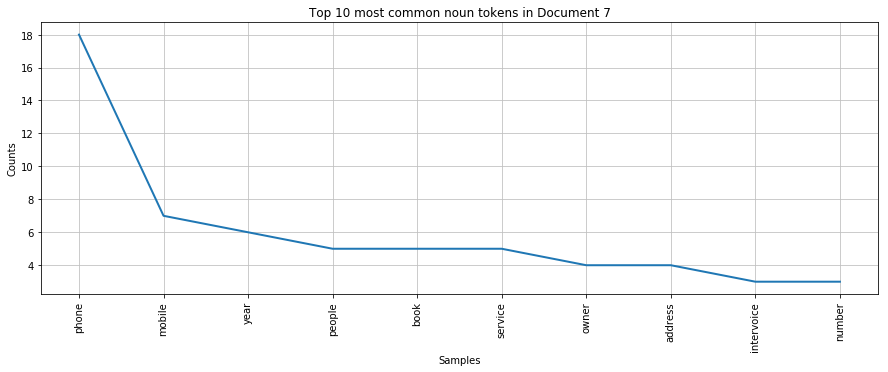

Top 10 most common noun tokens in Document 9:

('internet', 10), ('tv', 9), ('regulation', 9), ('content', 9), ('service', 4), ('provider', 4), ('consumer', 4), ('lord', 3), ('bbc', 3), ('blur', 2)




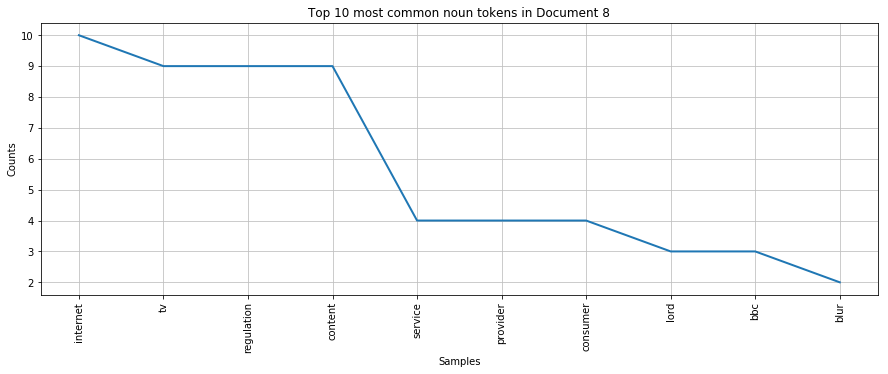

Top 10 most common noun tokens in Document 10:

('opera', 7), ('voice', 6), ('people', 5), ('browser', 4), ('version', 3), ('page', 3), ('feature', 3), ('appeal', 3), ('company', 3), ('command', 2)




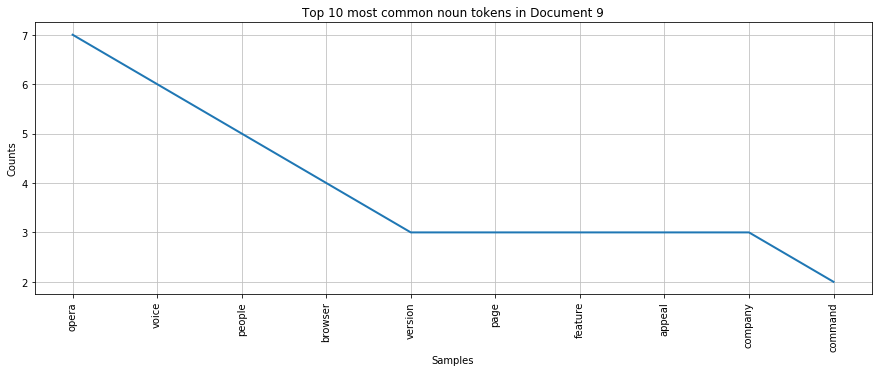

Top 10 most common noun tokens in Document 11:

('phone', 10), ('cabir', 9), ('virus', 6), ('range', 5), ('firm', 4), ('program', 4), ('security', 2), ('spread', 2), ('bug', 2), ('strain', 2)




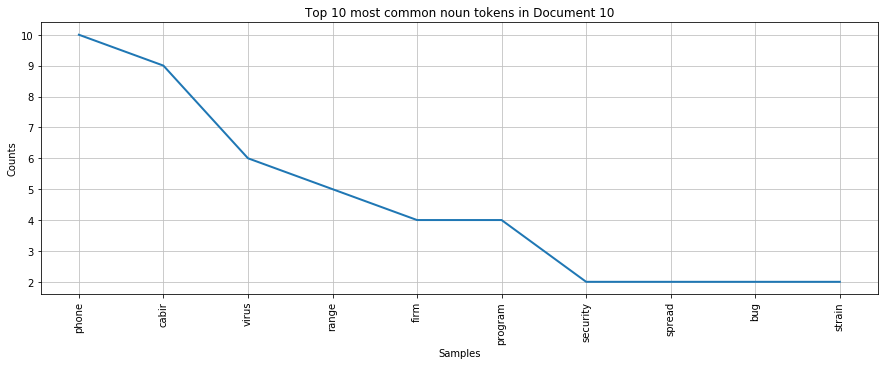

Top 10 most common noun tokens in Document 12:

('people', 6), ('credit', 5), ('card', 5), ('fraud', 4), ('information', 4), ('arrest', 3), ('investigator', 3), ('crime', 3), ('service', 3), ('internet', 3)




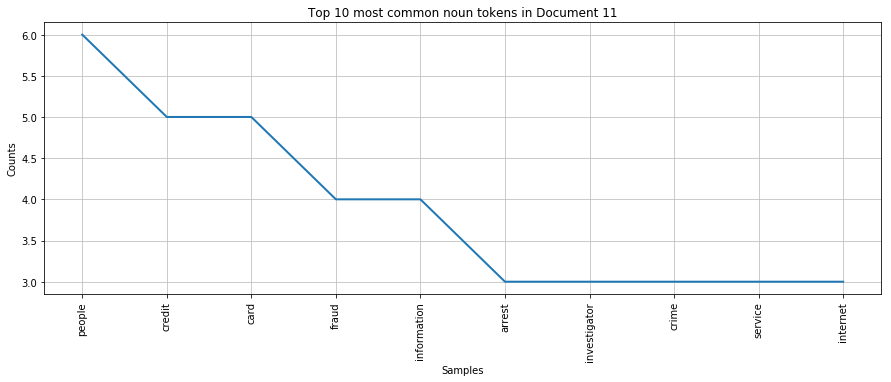

Top 10 most common noun tokens in Document 13:

('cash', 20), ('machine', 19), ('bank', 14), ('network', 9), ('virus', 8), ('year', 6), ('system', 5), ('risk', 5), ('computer', 4), ('security', 3)




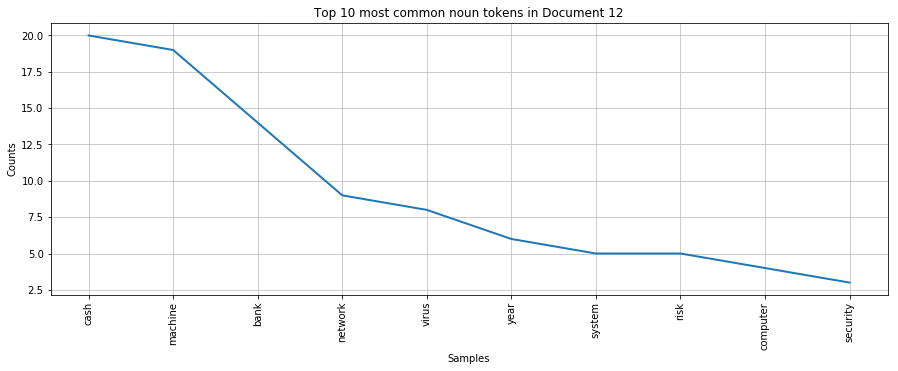

Top 10 most common noun tokens in Document 14:

('jaynes', 6), ('year', 5), ('sister', 4), ('mail', 4), ('state', 4), ('prosecutor', 4), ('internet', 3), ('law', 3), ('message', 2), ('spam', 2)




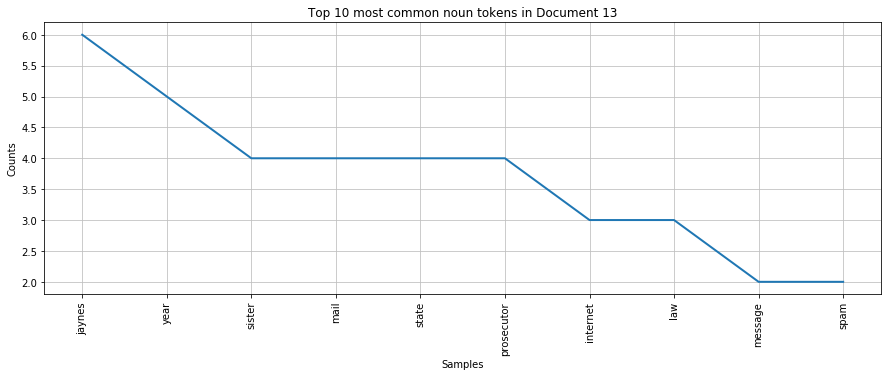

Top 10 most common noun tokens in Document 15:

('technology', 10), ('game', 7), ('work', 5), ('people', 5), ('device', 5), ('gate', 4), ('consumer', 4), ('trend', 4), ('content', 3), ('xbox', 3)




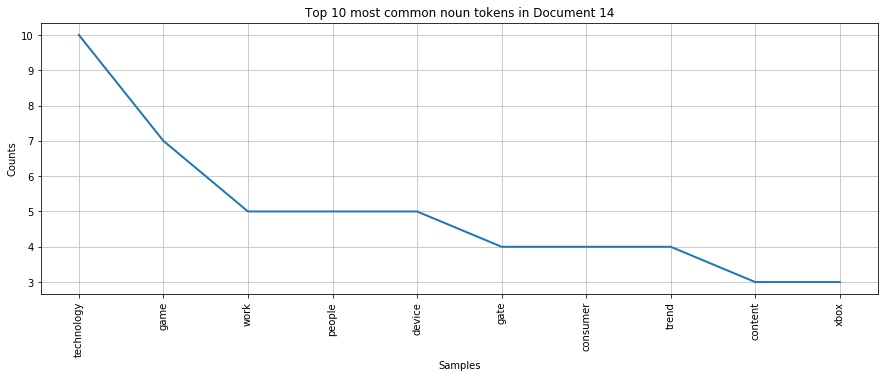

Top 10 most common noun tokens in Document 16:

('game', 12), ('city', 5), ('cj', 4), ('vehicle', 4), ('gta', 3), ('gameplay', 3), ('control', 3), ('character', 3), ('radio', 3), ('series', 2)




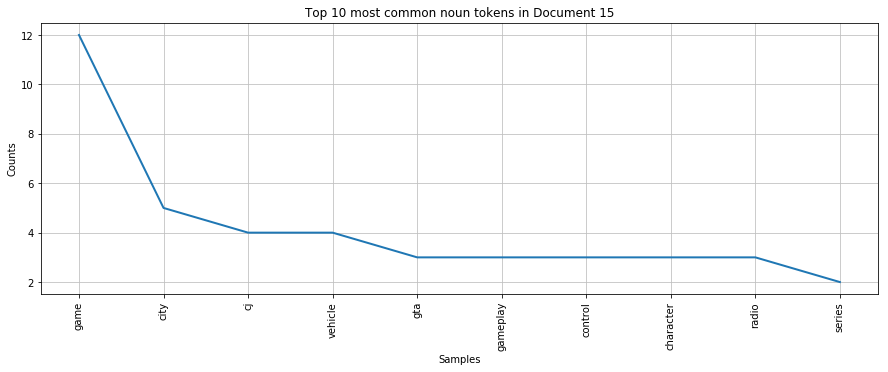

Top 10 most common noun tokens in Document 17:

('firefox', 8), ('internet', 6), ('browser', 6), ('explorer', 5), ('people', 5), ('program', 5), ('release', 4), ('software', 4), ('mozilla', 4), ('foundation', 4)




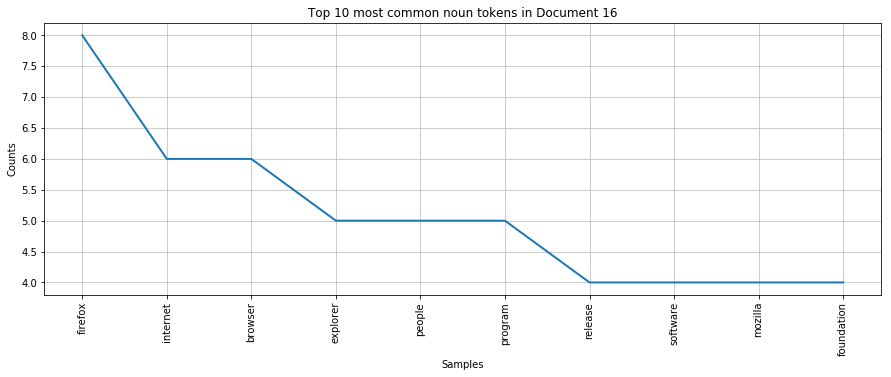

Top 10 most common noun tokens in Document 18:

('game', 8), ('device', 7), ('market', 5), ('screen', 5), ('play', 4), ('d', 4), ('control', 4), ('machine', 4), ('number', 3), ('nintendo', 3)




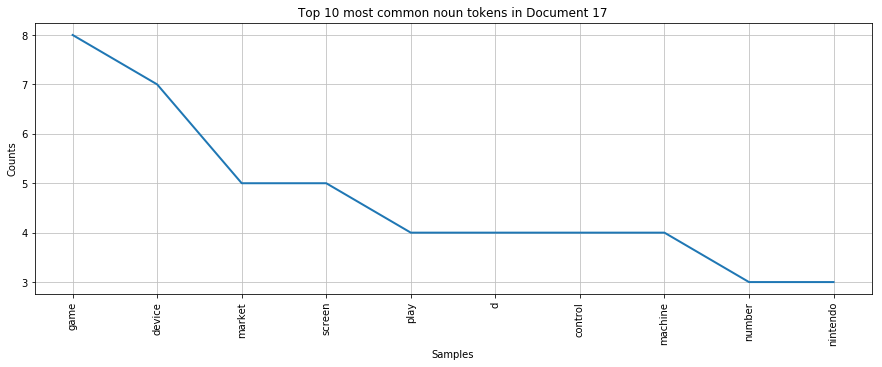

Top 10 most common noun tokens in Document 19:

('dvd', 14), ('game', 13), ('blu', 10), ('technology', 10), ('ray', 9), ('generation', 7), ('definition', 6), ('disc', 5), ('format', 4), ('quality', 4)




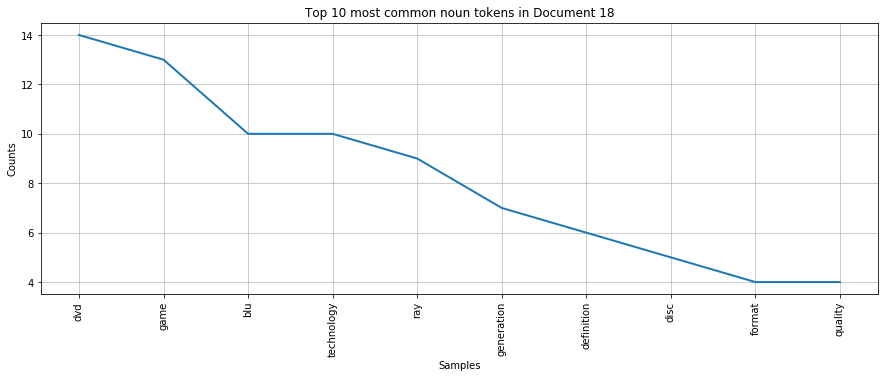

Top 10 most common noun tokens in Document 20:

('system', 14), ('file', 14), ('bittorrent', 9), ('share', 9), ('version', 7), ('software', 6), ('tracker', 6), ('people', 5), ('movie', 5), ('network', 5)




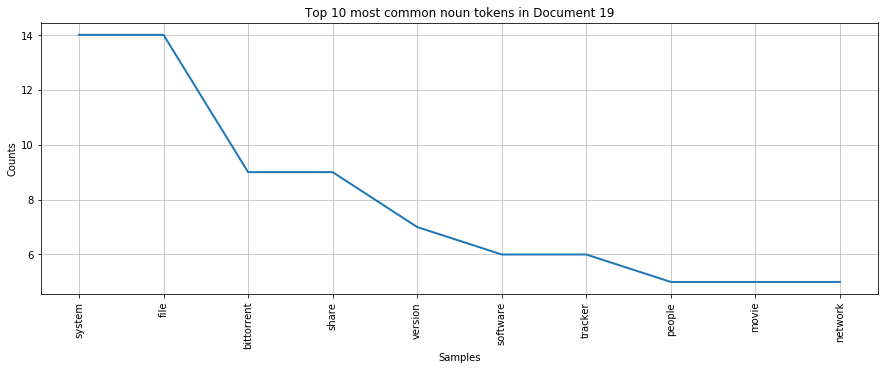

Top 10 most common noun tokens in Document 21:

('broadband', 7), ('tv', 7), ('year', 7), ('number', 6), ('analyst', 5), ('research', 4), ('people', 4), ('rise', 4), ('netratings', 3), ('jupiter', 3)




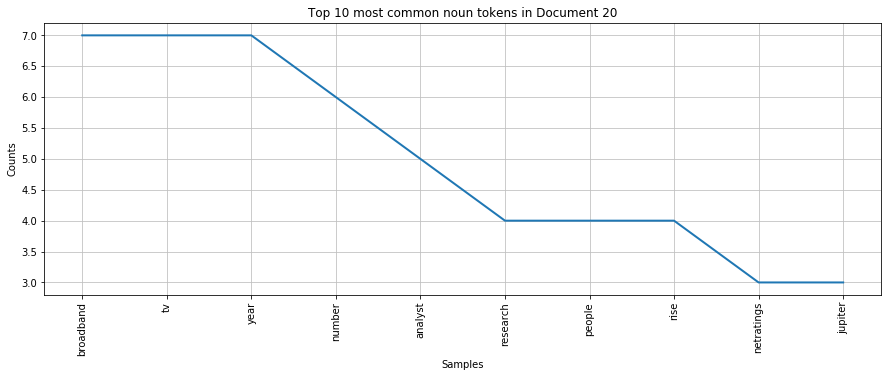

Top 10 most common noun tokens in Document 22:

('people', 5), ('service', 4), ('blog', 4), ('microsoft', 2), ('journal', 2), ('call', 2), ('space', 2), ('competitor', 2), ('google', 2), ('web', 2)




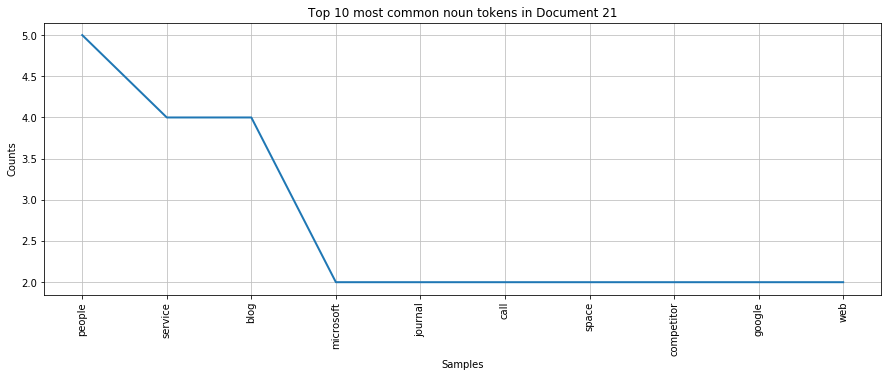

Top 10 most common noun tokens in Document 23:

('metal', 3), ('slug', 3), ('game', 3), ('offer', 3), ('side', 2), ('year', 2), ('level', 2), ('title', 2), ('drill', 1), ('wake', 1)




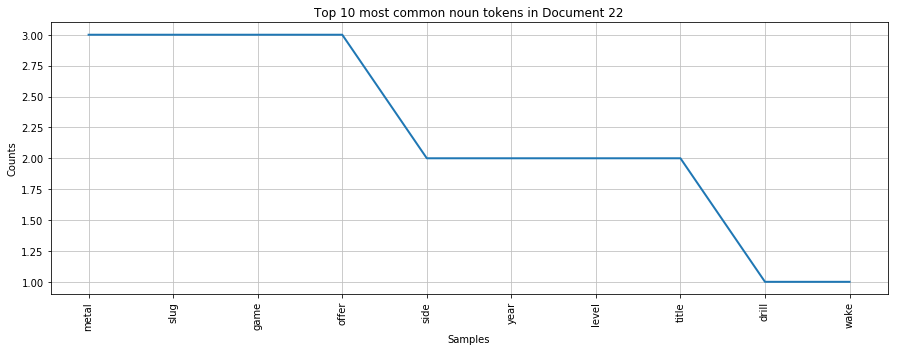

Top 10 most common noun tokens in Document 24:

('game', 11), ('release', 6), ('doom', 5), ('year', 5), ('sci', 2), ('shooter', 2), ('award', 2), ('title', 2), ('week', 2), ('computer', 2)




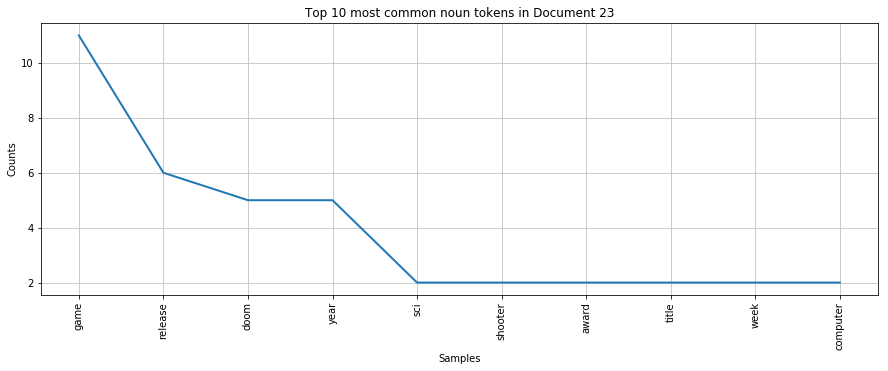

Top 10 most common noun tokens in Document 25:

('machine', 10), ('gene', 9), ('speed', 6), ('supercomputer', 6), ('test', 4), ('computer', 4), ('power', 4), ('time', 4), ('ibm', 3), ('earth', 3)




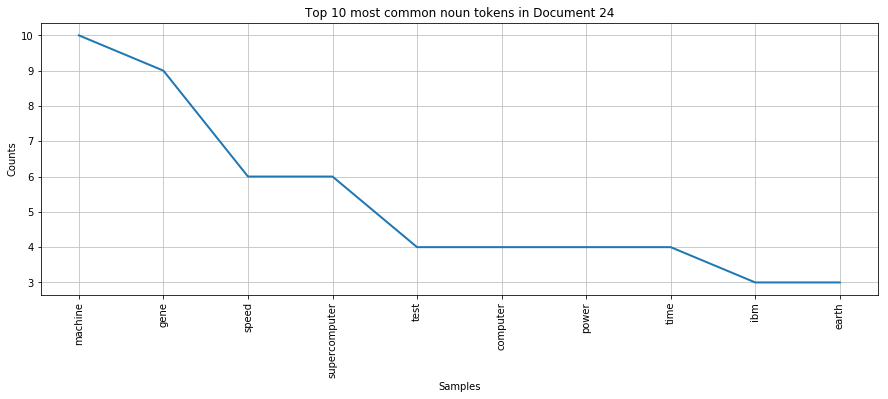

Top 10 most common noun tokens in Document 26:

('virus', 8), ('software', 8), ('program', 7), ('spyware', 6), ('anti', 5), ('firm', 4), ('pc', 3), ('user', 3), ('computer', 3), ('window', 3)




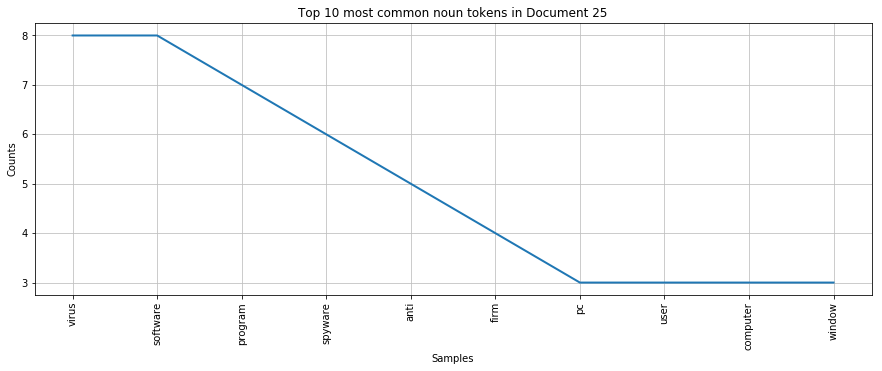

Top 10 most common noun tokens in Document 27:

('software', 5), ('xp', 5), ('version', 4), ('window', 4), ('computer', 3), ('company', 3), ('trader', 3), ('counterfeit', 3), ('scheme', 3), ('launch', 2)




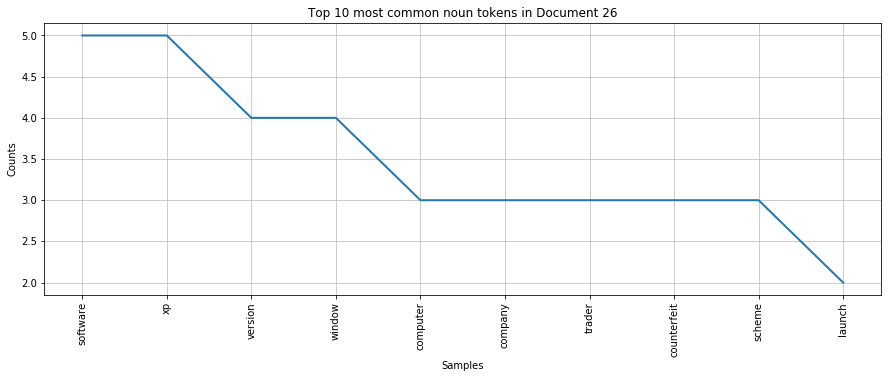

Top 10 most common noun tokens in Document 28:

('browser', 9), ('firefox', 7), ('mozilla', 6), ('market', 5), ('release', 4), ('software', 4), ('explorer', 3), ('source', 3), ('share', 3), ('version', 3)




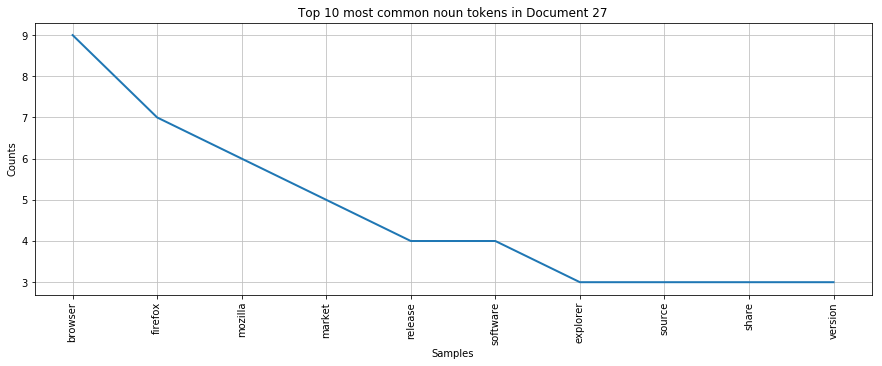

Top 10 most common noun tokens in Document 29:

('medium', 5), ('work', 5), ('commission', 4), ('content', 4), ('scheme', 3), ('solution', 3), ('people', 2), ('entertainment', 2), ('future', 2), ('project', 2)




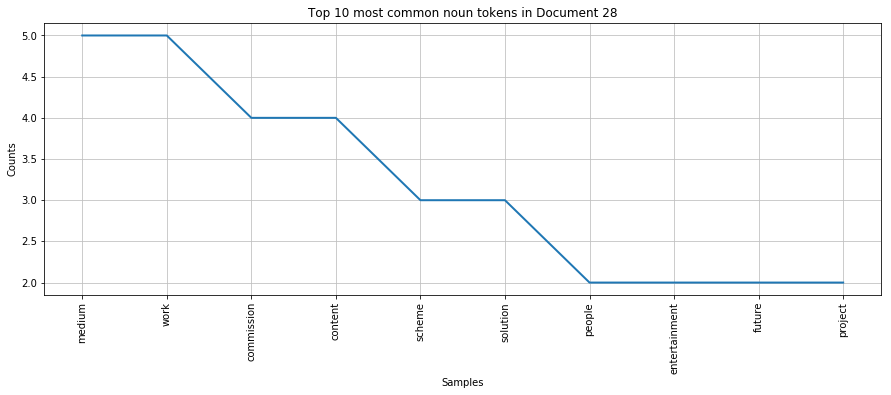

Top 10 most common noun tokens in Document 30:

('poster', 11), ('campaign', 6), ('phone', 5), ('number', 4), ('information', 3), ('technology', 3), ('people', 2), ('home', 2), ('station', 2), ('infra', 2)




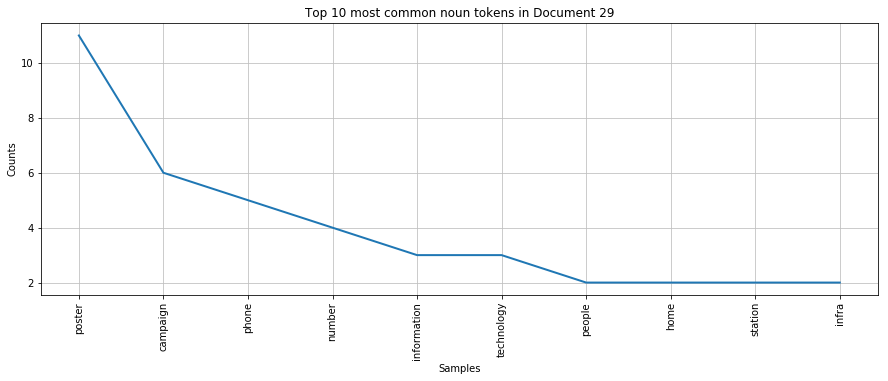

Top 10 most common noun tokens in Document 31:

('search', 4), ('engine', 3), ('people', 3), ('vacation', 2), ('year', 2), ('number', 2), ('bbc', 1), ('record', 1), ('amount', 1), ('help', 1)




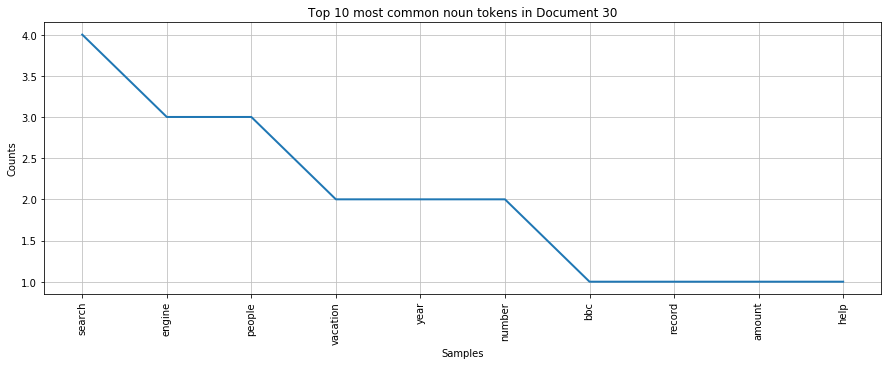

Top 10 most common noun tokens in Document 32:

('domain', 6), ('name', 4), ('job', 4), ('service', 2), ('approval', 2), ('address', 2), ('travel', 2), ('mobi', 2), ('internet', 1), ('market', 1)




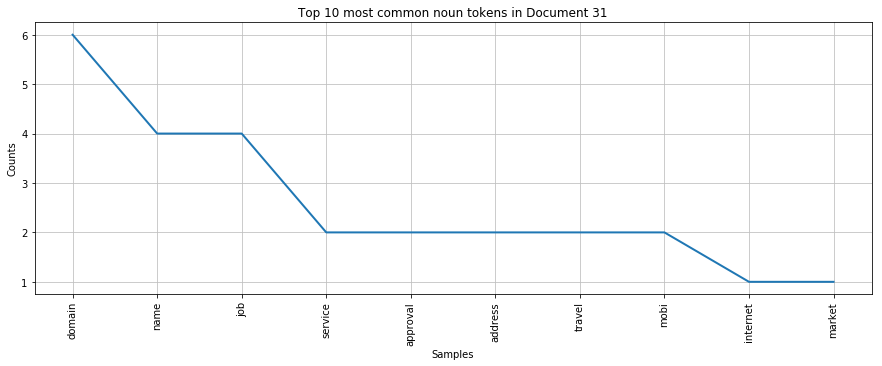

Top 10 most common noun tokens in Document 33:

('site', 9), ('bittorrent', 8), ('share', 5), ('action', 3), ('film', 2), ('peer', 2), ('network', 2), ('campaign', 2), ('closure', 2), ('people', 2)




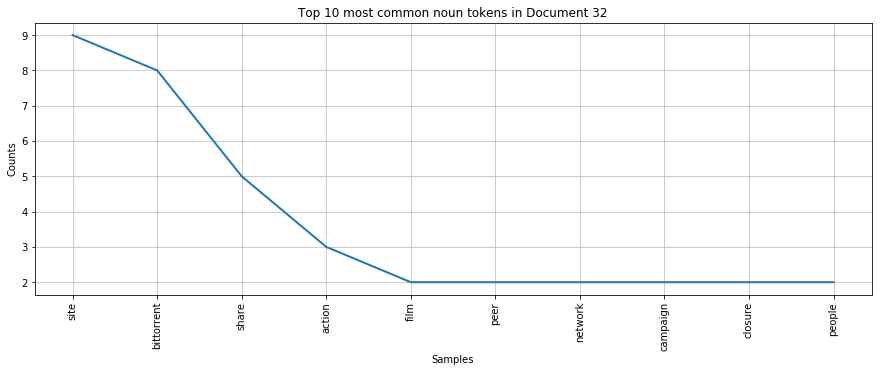

Top 10 most common noun tokens in Document 34:

('people', 4), ('broadband', 4), ('line', 4), ('figure', 2), ('number', 2), ('business', 2), ('year', 2), ('report', 2), ('connection', 2), ('end', 2)




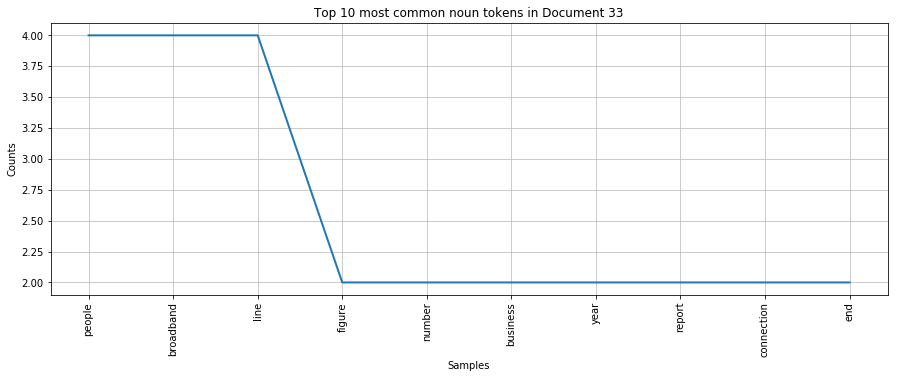

Top 10 most common noun tokens in Document 35:

('search', 13), ('desktop', 6), ('web', 5), ('mail', 4), ('file', 4), ('firm', 4), ('internet', 3), ('technology', 3), ('analyst', 3), ('yahoo', 2)




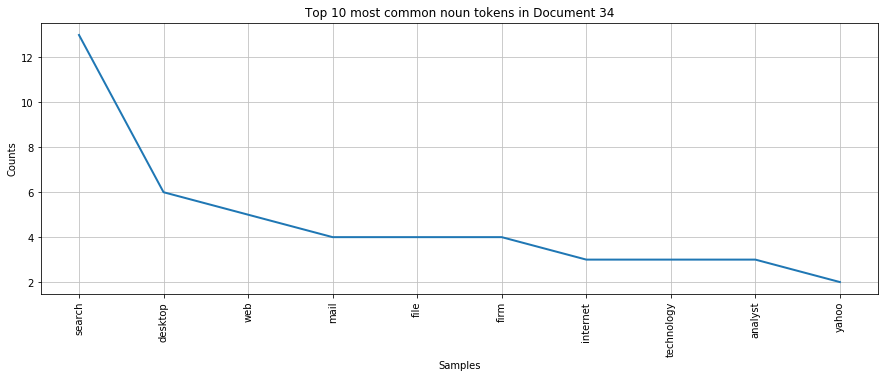

Top 10 most common noun tokens in Document 36:

('message', 6), ('act', 6), ('lawsuit', 5), ('mail', 5), ('men', 4), ('spammer', 4), ('company', 4), ('spam', 4), ('texas', 3), ('attorney', 3)




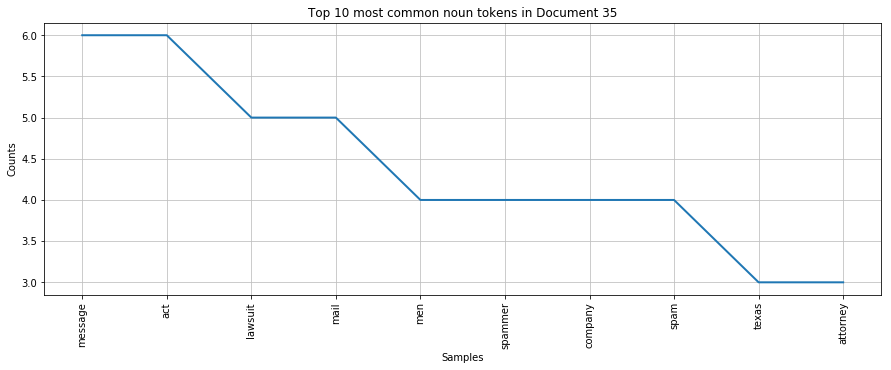

Top 10 most common noun tokens in Document 37:

('itunes', 6), ('user', 4), ('security', 3), ('file', 3), ('version', 3), ('problem', 3), ('apple', 2), ('music', 2), ('playlist', 2), ('program', 2)




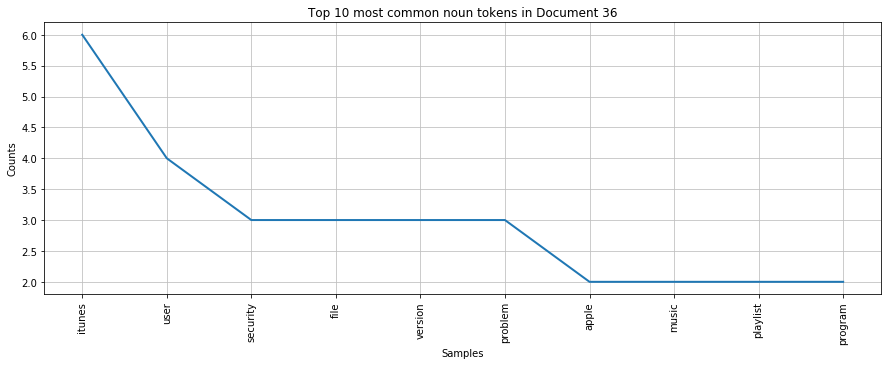

Top 10 most common noun tokens in Document 38:

('attack', 19), ('data', 9), ('site', 8), ('traffic', 8), ('firm', 4), ('base', 3), ('network', 3), ('target', 3), ('capella', 3), ('ddos', 3)




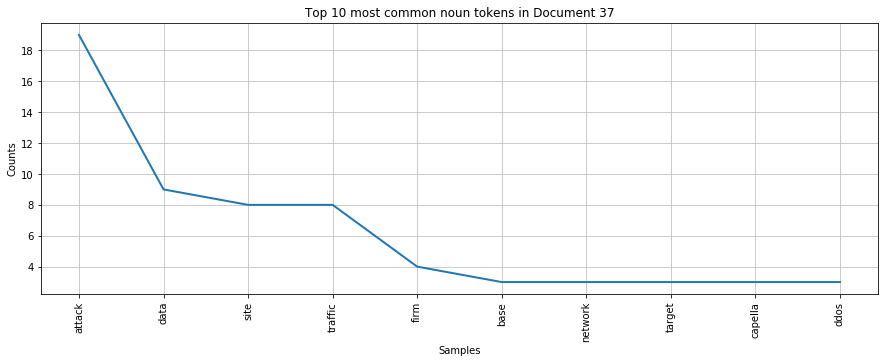

Top 10 most common noun tokens in Document 39:

('game', 16), ('hd', 10), ('tv', 6), ('quality', 4), ('console', 4), ('picture', 4), ('line', 4), ('film', 3), ('screen', 3), ('hdtv', 3)




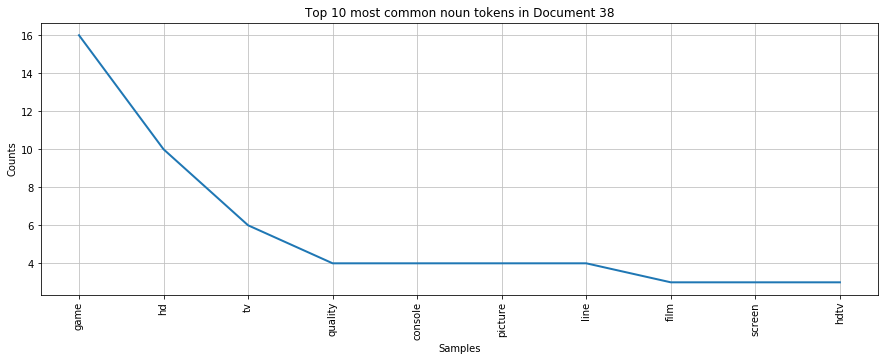

Top 10 most common noun tokens in Document 40:

('security', 9), ('year', 7), ('program', 7), ('woman', 6), ('virus', 6), ('people', 5), ('home', 5), ('computer', 4), ('study', 4), ('pc', 4)




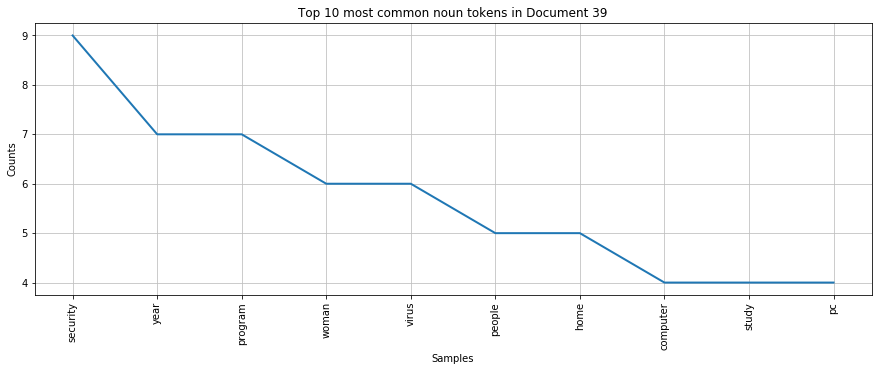

Top 10 most common noun tokens in Document 41:

('sony', 3), ('game', 3), ('launch', 3), ('gamers', 2), ('europe', 2), ('sell', 2), ('machine', 2), ('unit', 2), ('year', 2), ('ds', 2)




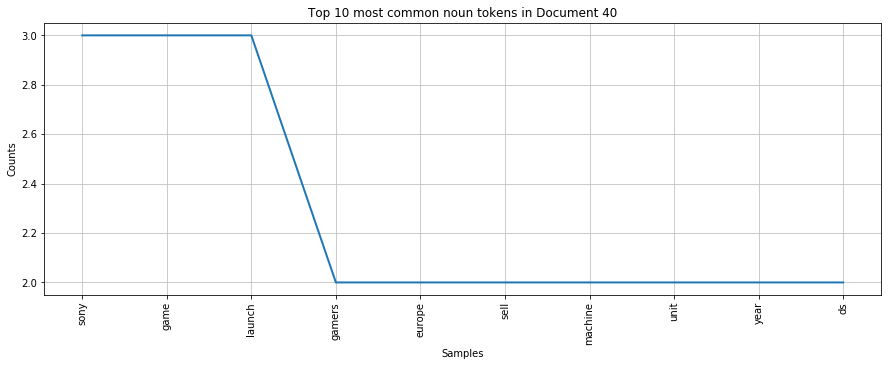

Top 10 most common noun tokens in Document 42:

('role', 10), ('film', 7), ('oscar', 5), ('award', 4), ('play', 4), ('actress', 3), ('hollywood', 3), ('nomination', 3), ('performance', 3), ('success', 3)




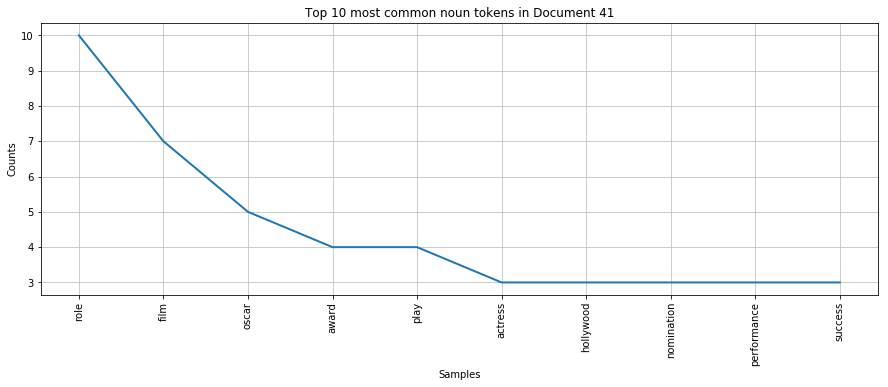

Top 10 most common noun tokens in Document 43:

('bill', 9), ('software', 4), ('patent', 4), ('law', 4), ('parliament', 3), ('consultation', 2), ('firm', 2), ('meps', 2), ('draft', 2), ('politician', 1)




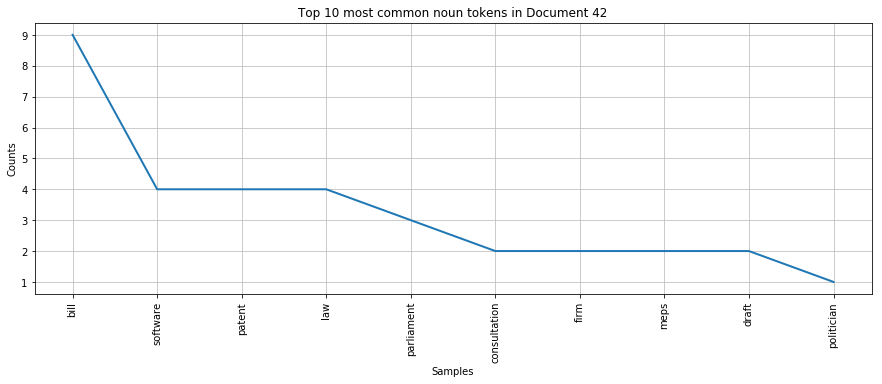

Top 10 most common noun tokens in Document 44:

('music', 13), ('phone', 12), ('people', 8), ('sale', 6), ('market', 6), ('gartner', 5), ('year', 5), ('design', 4), ('milanesi', 4), ('camera', 4)




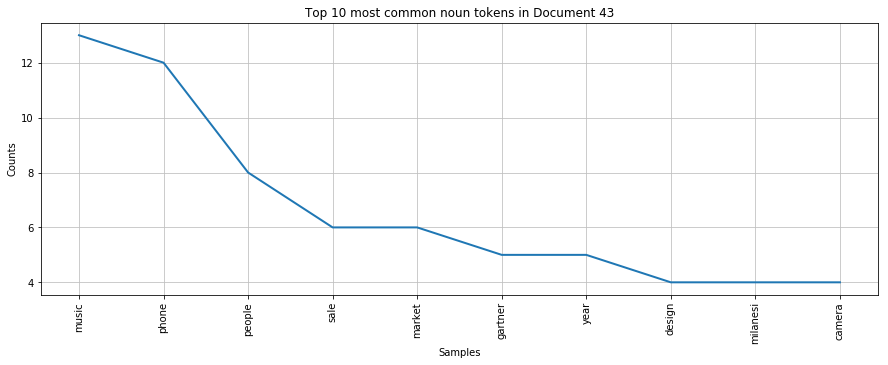

Top 10 most common noun tokens in Document 45:

('gadget', 9), ('list', 4), ('year', 4), ('stuff', 3), ('lover', 3), ('camera', 2), ('technology', 2), ('playstation', 1), ('uk', 1), ('round', 1)




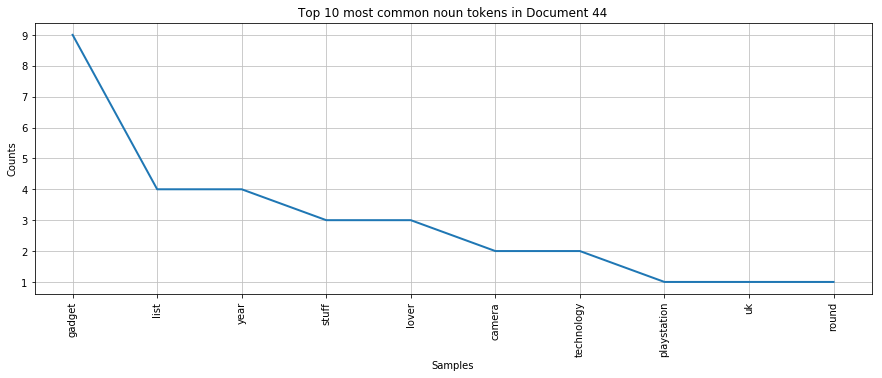

Top 10 most common noun tokens in Document 46:

('movie', 5), ('psp', 4), ('sony', 3), ('game', 3), ('film', 3), ('people', 3), ('lion', 2), ('gate', 2), ('announce', 2), ('machine', 2)




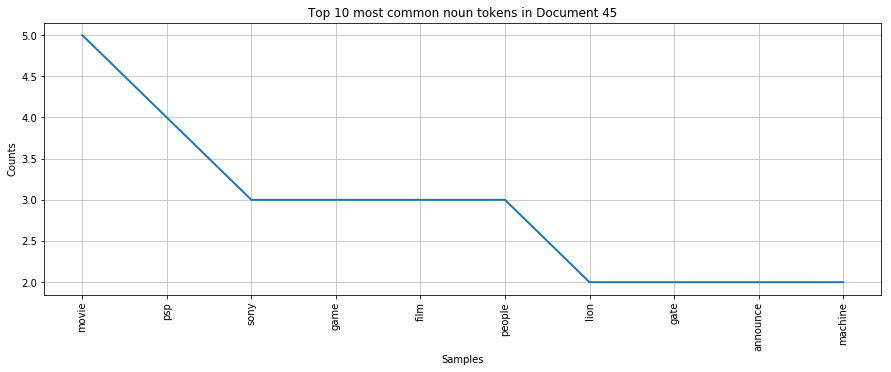

Top 10 most common noun tokens in Document 47:

('software', 12), ('internet', 7), ('network', 6), ('computer', 6), ('crack', 6), ('dod', 5), ('code', 5), ('custom', 4), ('people', 4), ('leader', 4)




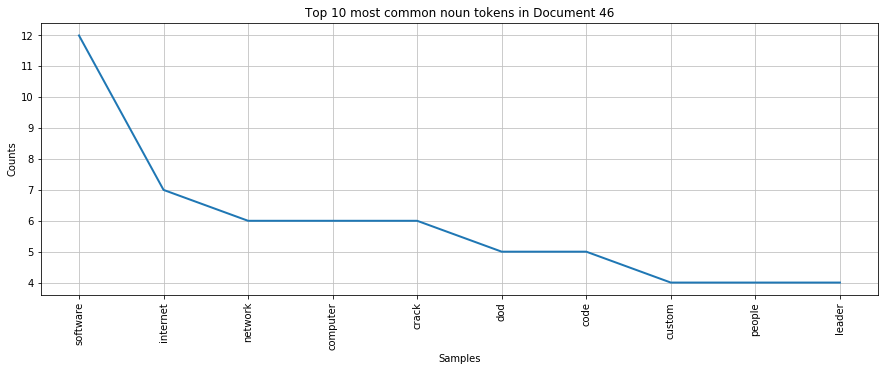

Top 10 most common noun tokens in Document 48:

('apple', 11), ('product', 5), ('blogger', 5), ('rule', 4), ('trade', 4), ('judge', 4), ('law', 4), ('information', 3), ('mail', 3), ('insider', 3)




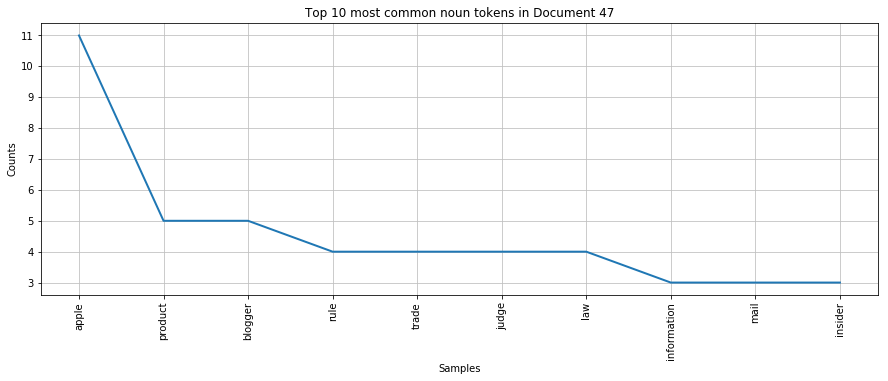

Top 10 most common noun tokens in Document 49:

('file', 13), ('court', 8), ('share', 7), ('firm', 6), ('peer', 6), ('network', 5), ('industry', 5), ('innovation', 5), ('music', 5), ('case', 5)




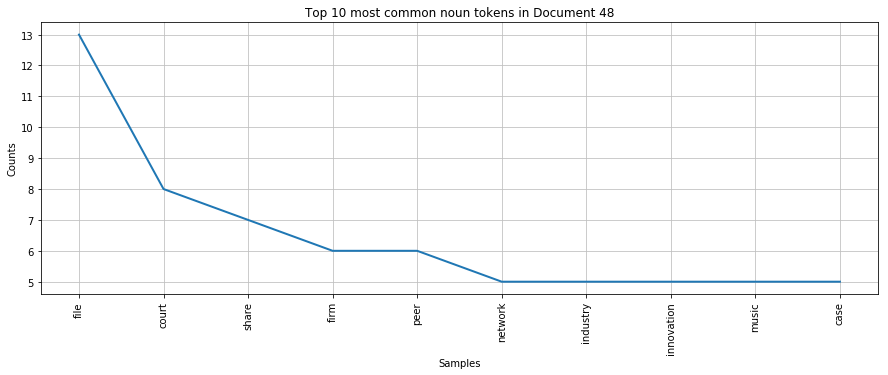

Top 10 most common noun tokens in Document 50:

('virus', 5), ('message', 5), ('computer', 4), ('program', 4), ('trojan', 4), ('interest', 3), ('trade', 2), ('distribute', 2), ('mention', 2), ('beckham', 2)




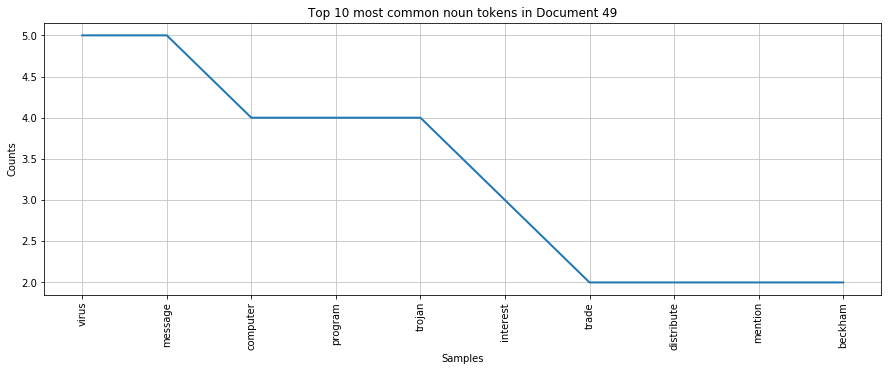

Top 10 most common noun tokens in Document 51:

('yoran', 7), ('security', 7), ('division', 7), ('network', 6), ('attack', 6), ('department', 5), ('homeland', 4), ('virus', 4), ('post', 3), ('cyber', 3)




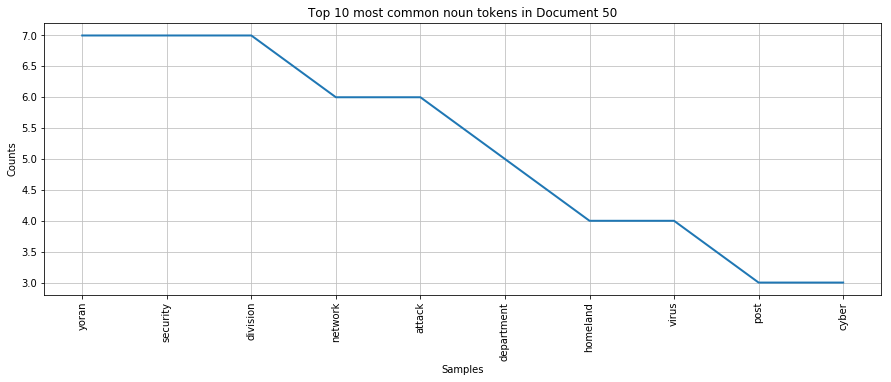

In [140]:
count = 0
for count in range(len(df_handle)):
    tokens = df_handle.iloc[count]['noun_Tokens']
    word_frequency = nltk.FreqDist(tokens)
    #What are the top-10 most frequent words
    doc_num = count+1
    print("Top 10 most common noun tokens in Document "+str(doc_num)+":\n\n" + str(word_frequency.most_common(10)).strip('[]') + "\n\n")
    plt.figure(figsize=(15,5))
    word_frequency.plot(10, title='Top 10 most common noun tokens in Document '+str(count))

In [141]:
## Save data into CSV RAW file
df_handle.to_csv("H1_tokens_data.csv",sep=',',index=None)

## Opinion
The same type of graph trends can be seen for the top 10 most common noun tokens in each document. However, there are some different nouns in the place of regular tokens that we looked at previously.


The benefit of using noun tokens is that it gives a clear description of what is going on in the document/article. At one glance, you are able to see the exact key words and would be able to summarise the document. By looking at nouns in the documents, we are able to see the key words in the documents and almost instantly decipher what the topic of the article is. This filters out the words that would not necessarily allow you to to this.

# Q9 
**Please assign a topic to each of the documents programatically and describe your strategy.**

My aim for this question was to implement a strategy that was shown in the first chapter of the 'Applied Text Analysis with Python' book written by Tony Ojeda. 

The first task that I had to complete in order to do this was to define the words I would associate with each of the topics BUSINESS, ENTERTAINMENT, POLITICS, SPORT and TECH. 

I decided that instead of using the words from the whole corpus, I would classify the top-10 words in each document in the corpus that appears over the mean frequency.

In [142]:
condition = top_10_df.Frequency > top_10_df.Frequency.mean() # boolean expression used when masking top_10_df
set(top_10_df[condition].Word) # only words that over mean frequency selected

{'act',
 'andreas',
 'anti',
 'apple',
 'attack',
 'award',
 'back',
 'bank',
 'bening',
 'bill',
 'bittorrent',
 'blogger',
 'blu',
 'blue',
 'broadband',
 'browser',
 'cabir',
 'campaign',
 'cash',
 'colour',
 'computer',
 'console',
 'content',
 'court',
 'crack',
 'cyber',
 'data',
 'definition',
 'desktop',
 'device',
 'directive',
 'division',
 'dod',
 'domain',
 'dvd',
 'european',
 'exeem',
 'fbi',
 'file',
 'film',
 'firefox',
 'firm',
 'format',
 'gadget',
 'game',
 'gate',
 'gene',
 'generation',
 'hd',
 'high',
 'internet',
 'itunes',
 'jaynes',
 'journalist',
 'law',
 'legal',
 'lose',
 'machine',
 'mail',
 'make',
 'market',
 'message',
 'microsoft',
 'mobile',
 'mozilla',
 'music',
 'net',
 'network',
 'nintendo',
 'number',
 'opera',
 'parliament',
 'peer',
 'people',
 'phone',
 'poster',
 'program',
 'ray',
 'regulation',
 'release',
 'role',
 'sale',
 'san',
 'screen',
 'search',
 'security',
 'share',
 'site',
 'software',
 'speed',
 'spyware',
 'supercomputer',
 'sw

**Next I classified these words above into specific topic sets...**

If I could not clearly decide what topic the word is associated to, I left it out to prevent any errors.

In [143]:
BUSINESS = 'business'
ENTERTAINMENT = 'entertainment'
POLITICS = 'politics'
SPORT = 'sport'
TECH = 'tech'
UNKNOWN = 'unknown'

BUSINESS_WORDS = set([
    'bank', 'cash', 'firm', 'market'
])
ENTERTAINMENT_WORDS = set([
    'award', 'dvd', 'film', 'movie'
])
POLITICS_WORDS = set([
    'campaign', 'court', 'parliament'
])
SPORT_WORDS = set([
    # none
])
TECH_WORDS = set([
    'apple', 'bittorrent', 'blogger', 'broadband',  'browser', 'computer',  'console', 'cyber',  'data', 'desktop',  'device', 'domain', 'file', 'firefox', 'gadget', 
    'hd', 'internet',  'itunes', 'machine', 'microsoft',  'mobile',  'mozilla', 'opera', 'peer', 'phone', 'program', 'screen',  'site',  'software',  'technology',  'spyware',  'supercomputer',
    'tv', 'user',  'version', 'virus', 'game'
])

**It is clear to see that the tech set of words is a lot larger than the other sets. This is no surprise as I previously identified that my corpus was largely about the topic tech.**

The **next step** was too return the topic that had the highest count of words related to tehe topic using the TOPIC_WORDS defined above...

In [144]:
def find_topic(word):

    num_business = len(BUSINESS_WORDS.intersection(word))
    num_entertainment = len(ENTERTAINMENT_WORDS.intersection(word))
    num_politics = len(POLITICS_WORDS.intersection(word))
    num_sport = len(SPORT_WORDS.intersection(word))
    num_tech = len(TECH_WORDS.intersection(word))
    
    # topic_list is created in order to simplify the 'if, else' statements
    # the index of the topic with the max value in topic_list is returned and saved in the 'index' variable
    topic_list = [num_business, num_entertainment, num_politics, num_sport, num_tech]
    index = topic_list.index(max(topic_list))

    # If the index is equal to the topics position in topic_list then it is returned
    if index == 0 :
        return BUSINESS
    elif index == 1 :
        return ENTERTAINMENT
    elif index == 2 :
        return POLITICS
    elif index == 3 :
        return SPORT
    elif index == 4 :
        return TECH
    else:
        return UNKNOWN # else unknown as safeguard

In [145]:
from collections import Counter
def count_topic(tokens):
    words = Counter()
    for token in tokens:
        topic = find_topic(token)
        return topic

I removed some of the unnecessary code from the example I am using to help implement this strategy. I am only interested in the topic of the article based on the number of words apppearing related to the topic

In [146]:
topic_list = []
for i in range(51):
    topic = count_topic([df_handle.iloc[i]['Tokens']])
    topic_list.append(topic)
    
df_handle['Topic'] = [''.join(topic) for topic in topic_list]
df_handle

,Title,Content,Tokens,noun_Tokens,Topic
0,Virus poses as Christmas e-mail\n,\nSecurity firms are warning about a Windows v...,"[security, firm, warn, window, virus, disguise...","[security, firm, warn, disguise, christmas, ca...",tech
1,Sony PSP console hits US in March\n,\nUS gamers will be able to buy Sony's PlaySta...,"[gamers, buy, sony, playstation, portable, mar...","[gamers, playstation, march, news, europe, deb...",tech
2,Security warning over 'FBI virus'\n,\nThe US Federal Bureau of Investigation is wa...,"[federal, bureau, investigation, warn, compute...","[bureau, investigation, computer, virus, mail,...",tech
3,Apple attacked over sources row\n,\nCivil liberties group the Electronic Frontie...,"[civil, liberty, group, electronic, frontier, ...","[liberty, group, foundation, eff, join, fight,...",tech
4,'No re-draft' for EU patent law\n,\nA proposed European law on software patents ...,"[propose, european, law, software, patent, dra...","[law, software, patent, draft, commission, mep...",tech
5,Blind student 'hears in colour'\n,\nA blind student has developed software that ...,"[blind, student, develop, software, turn, colo...","[student, develop, software, turn, note, victo...",tech
6,Looks and music to drive mobiles\n,\nMobile phones are still enjoying a boom time...,"[mobile, phone, enjoy, boom, time, sale, resea...","[phone, enjoy, boom, time, sale, research, tec...",tech
7,'Friends fear' with lost mobiles\n,\nPeople are becoming so dependent on their mo...,"[people, dependent, mobile, phone, concern, lo...","[people, phone, concern, phone, lose, friend, ...",tech
8,Net regulation 'still possible'\n,\nThe blurring of boundaries between TV and th...,"[blur, boundary, tv, internet, raise, question...","[blur, tv, internet, question, regulation, wat...",tech
9,Latest Opera browser gets vocal\n,"\nNet browser Opera 8.0, due for official rele...","[net, browser, opera, due, official, release, ...","[browser, opera, official, month, browser, mar...",tech


## Opinion
This strategy was very effective when choosing the topic that is related to the article the most. 50 of the 51 documents are shown to be tech related with one article (41) shown to be related to entertainment. This can be deemed correct based on the noun tokens about movies etc. 

I initially attempted this question by using WordNet and the path similarity for words related to each topic. This did not prove to be effective when choosing the topic related to the article.

Although I believe my strategy of choosing the topics for this question to be effective, it would not be scalable. For articles that have a larger quantity of words, it would not be realistic to map each word to each topic it is related to. However, in this case, it is a very efficient way of doing it.

# Q10
**Identify the special document. Please provide the code for your idea.**

My idea for identifying the special document is using the Cosine Similarity Matrix. The previous question also specified a document that was of a different topic to tech. However, I chose to use a different method in order to confirem that it was the same document that is not similar to the other documents.

- The first task in order to do this is to calculate the TF-IDF Matrix...

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(norm=None)  
list_contents =[]
for index, row in df_handle.iterrows():
    list_contents.append(' '.join(row.Tokens))
    
# list_contents = df_handle.Content.values

tfidf_matrix = tfidf_vectorizer.fit_transform(list_contents)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),columns=[tfidf_vectorizer.get_feature_names()])
df_tfidf.head(10)

,12cm,13th,152m,15m,15th,1930s,1980s,1990s,1bn,21st,...,yh,yoran,york,young,youth,zafi,zelda,zodiac,zombie,zoom
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,17.032386,0.0,0.0,0.0,0.000000
1,3.852631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.564949,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,3.341806,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,3.852631
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


**Next, using sklearn, we are able to calculate the cosine similarity matrix...**

In [148]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
cosine_matrix =  cosine_similarity(df_tfidf.values)
df_cosine = pd.DataFrame(cosine_matrix,index=range(51),columns=range(51))
df_cosine.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.000000,0.011008,0.263779,0.031737,0.023000,0.047906,0.004976,0.037650,0.015419,0.031415,...,0.004753,0.018223,0.004974,0.006962,0.009451,0.032208,0.047764,0.025053,0.310094,0.098302
1,0.011008,1.000000,0.005335,0.001908,0.033425,0.011962,0.126964,0.055859,0.013317,0.030465,...,0.024919,0.055089,0.126920,0.075194,0.310403,0.017047,0.009660,0.058651,0.017549,0.015773
2,0.263779,0.005335,1.000000,0.039928,0.020668,0.006603,0.005270,0.016744,0.039587,0.022497,...,0.000922,0.019566,0.005268,0.001635,0.004569,0.048005,0.060643,0.010674,0.133876,0.046395
3,0.031737,0.001908,0.039928,1.000000,0.022807,0.006847,0.033109,0.034209,0.048536,0.009159,...,0.015837,0.028364,0.033097,0.005942,0.004029,0.039201,0.427519,0.105484,0.009045,0.011531
4,0.023000,0.033425,0.020668,0.022807,1.000000,0.033776,0.035364,0.015144,0.048110,0.026200,...,0.012670,0.370368,0.035351,0.002012,0.010603,0.053143,0.052305,0.056750,0.020111,0.018989
5,0.047906,0.011962,0.006603,0.006847,0.033776,1.000000,0.054509,0.034516,0.021628,0.107261,...,0.006272,0.037476,0.054490,0.017202,0.013607,0.075132,0.012894,0.033609,0.031007,0.026591
6,0.004976,0.126964,0.005270,0.033109,0.035364,0.054509,1.000000,0.410647,0.043989,0.051524,...,0.018146,0.033291,0.998013,0.136940,0.046725,0.030650,0.049443,0.063418,0.030143,0.010585
7,0.037650,0.055859,0.016744,0.034209,0.015144,0.034516,0.410647,1.000000,0.041298,0.038488,...,0.022499,0.030565,0.410503,0.105409,0.034380,0.050655,0.029078,0.026680,0.022671,0.024655
8,0.015419,0.013317,0.039587,0.048536,0.048110,0.021628,0.043989,0.041298,1.000000,0.044752,...,0.028655,0.047172,0.043974,0.045832,0.009164,0.082380,0.064182,0.088402,0.031434,0.073074
9,0.031415,0.030465,0.022497,0.009159,0.026200,0.107261,0.051524,0.038488,0.044752,1.000000,...,0.009228,0.024921,0.051506,0.020153,0.033179,0.066301,0.040885,0.027924,0.032775,0.027682


**I decided to look at the mean of the cosine similarity values in the matrix and sort the values so the document with the least mean similarity was chosen..**

In [149]:
df_cosine.mean().sort_values().head(1)

41    0.039386
dtype: float64

## Opinion
It can be confirmed using the Cosine Similarity Matrix that document number 41 was my special document in my corpus. From Q9, the topic that was decided for this document was entertainment. I decided to use the mean() function in order to identify the least similar document in the corpus.

It was interesting to see a practical use for the Cosine Similarity Matrix and it helped my understanding of it hugely. This is a concise and way of identifying documents that are not similar to the rest of the corpus of documents.